In [1]:
%matplotlib inline

40

In [2]:
class Morph:
    def __init__(self, line):
        (self.surface, temp) = line.split("\t")
        temp = temp.split(",")
        self.base = temp[6]
        self.pos = temp[0]
        self.pos1 = temp[1]
        
    def __str__(self):
        return "surface: {},\tbase: {},\tpos: {},\tpos1: {}".format(
            self.surface,
            self.base,
            self.pos,
            self.pos1
        )

In [3]:
sentences = []
sentence = []
with open('./neko.txt.cabocha') as f:
    for line in f:
        line = line.replace("\n", "")
        if line == "EOS":
            sentences.append(sentence)
            sentence = []
        elif line[0] == '*':
            continue
        else:
            sentence.append(Morph(line))

for word in sentences[2]:
    print(word)

surface: 　,	base: 　,	pos: 記号,	pos1: 空白
surface: 吾輩,	base: 吾輩,	pos: 名詞,	pos1: 代名詞
surface: は,	base: は,	pos: 助詞,	pos1: 係助詞
surface: 猫,	base: 猫,	pos: 名詞,	pos1: 一般
surface: で,	base: だ,	pos: 助動詞,	pos1: *
surface: ある,	base: ある,	pos: 助動詞,	pos1: *
surface: 。,	base: 。,	pos: 記号,	pos1: 句点


41 

In [4]:
class Chunk:
    def __init__(self, line):
        self.morphs = []
        self.dst = int(line.split()[2].replace('D',''))
        self.srcs = []
        
    def __str__(self):
        return 'srcs: {},\tdst: {},\nmorphs: (\n{}\n)'.format(
            self.srcs,
            self.dst,
            "\n".join([str(_morhp) for _morhp in self.morphs])
        )

In [5]:
sentences = []
sentence = []
with open('./neko.txt.cabocha') as f:
    for line in f:
        line = line.replace("\n", "")
        if line == "EOS":
            for index, chunk in enumerate(sentence):
                if chunk.dst != -1:
                    sentence[chunk.dst].srcs.append(index)
            sentences.append(sentence)
            sentence = []
        elif line[0] == '*':
            chunk = Chunk(line)
            sentence.append(chunk)
        else:
            chunk.morphs.append(Morph(line))

for i, chunk in enumerate(sentences[7]):
    print('* ', i)
    print(chunk)

*  0
srcs: [],	dst: 5,
morphs: (
surface: 吾輩,	base: 吾輩,	pos: 名詞,	pos1: 代名詞
surface: は,	base: は,	pos: 助詞,	pos1: 係助詞
)
*  1
srcs: [],	dst: 2,
morphs: (
surface: ここ,	base: ここ,	pos: 名詞,	pos1: 代名詞
surface: で,	base: で,	pos: 助詞,	pos1: 格助詞
)
*  2
srcs: [1],	dst: 3,
morphs: (
surface: 始め,	base: 始める,	pos: 動詞,	pos1: 自立
surface: て,	base: て,	pos: 助詞,	pos1: 接続助詞
)
*  3
srcs: [2],	dst: 4,
morphs: (
surface: 人間,	base: 人間,	pos: 名詞,	pos1: 一般
surface: という,	base: という,	pos: 助詞,	pos1: 格助詞
)
*  4
srcs: [3],	dst: 5,
morphs: (
surface: もの,	base: もの,	pos: 名詞,	pos1: 非自立
surface: を,	base: を,	pos: 助詞,	pos1: 格助詞
)
*  5
srcs: [0, 4],	dst: -1,
morphs: (
surface: 見,	base: 見る,	pos: 動詞,	pos1: 自立
surface: た,	base: た,	pos: 助動詞,	pos1: *
surface: 。,	base: 。,	pos: 記号,	pos1: 句点
)


42

In [6]:
class Chunk:
    def __init__(self, line):
        self.morphs = []
        self.dst = int(line.split()[2].replace('D',''))
        self.srcs = []
        
    def __str__(self):
        return ''.join([_morph.surface for _morph in self.morphs if _morph.pos != '記号'])

In [7]:
sentences = []
sentence = []
with open('./neko.txt.cabocha') as f:
    for line in f:
        line = line.replace("\n", "")
        if line == "EOS":
            for index, chunk in enumerate(sentence):
                if chunk.dst != -1:
                    sentence[chunk.dst].srcs.append(index)
            sentences.append(sentence)
            sentence = []
        elif line[0] == '*':
            chunk = Chunk(line)
            sentence.append(chunk)
        else:
            chunk.morphs.append(Morph(line))

for sentence in sentences:
    for chunk in sentence:
        if chunk.dst != -1:
            print("{}\t{}".format(str(chunk), str(sentence[chunk.dst])))

	猫である
吾輩は	猫である
名前は	無い
まだ	無い
どこで	生れたか
生れたか	つかぬ
とんと	つかぬ
見当が	つかぬ
何でも	薄暗い
薄暗い	所で
じめじめした	所で
所で	泣いて
ニャーニャー	泣いて
泣いて	記憶している
いた事だけは	記憶している
吾輩は	見た
ここで	始めて
始めて	人間という
人間という	ものを
ものを	見た
しかも	種族であったそうだ
あとで	聞くと
聞くと	種族であったそうだ
それは	種族であったそうだ
書生という	人間中で
人間中で	種族であったそうだ
一番	獰悪な
獰悪な	種族であったそうだ
この	書生というのは
書生というのは	話である
時々	捕えて
我々を	捕えて
捕えて	煮て
煮て	食うという
食うという	話である
しかし	思わなかった
その	当時は
当時は	なかったから
何という	考も
考も	なかったから
なかったから	思わなかった
別段	恐し
恐し	思わなかった
いとも	思わなかった
ただ	載せられて
彼の	掌に
掌に	載せられて
載せられて	持ち上げられた
スーと	持ち上げられた
持ち上げられた	時
時	フワフワした
何だか	フワフワした
フワフワした	感じが
感じが	あったばかりである
掌の	上で
上で	落ちついて
少し	落ちついて
落ちついて	見たのが
書生の	顔を
顔を	見たのが
見たのが	人間という
いわゆる	人間という
人間という	ものの
ものの	見始であろう
この	時
時	ものだと
妙な	ものだと
ものだと	思った
思った	感じが
感じが	残っている
今でも	残っている
第一毛をもって	装飾されべきはずの
装飾されべきはずの	顔が
顔が	つるつるして
つるつるして	薬缶だ
まるで	薬缶だ
その後	逢ったが
猫にも	逢ったが
だいぶ	逢ったが
逢ったが	ない
こんな	片輪には
片輪には	ない
一度も	出会わした
出会わした	事が
事が	ない
のみならず	突起している
顔の	真中が
真中が	突起している
あまりに	突起している
そうして	吹く
その穴の	中から
中から	吹く
時々	吹く
ぷうぷうと煙を	吹く
どうも	咽せぽくて
咽せぽくて	弱った
実に	弱った
これが	ものである
人間の	飲む
飲む	煙草という
煙草という	ものである
ものである	事は
事は	知った
ようやく	知った
この	頃
頃	知った


退屈で	折などは
腹加減の	よくない
よくない	折などは
折などは	例である
吾輩は	例である
いつでも	出て
ここへ	出て
出て	養うのが
浩然の	気を
気を	養うのが
養うのが	例である
ある	小春の
小春の	穏かな日の
穏かな日の	二時頃であったが
二時頃であったが	運ばした
吾輩は	運ばした
昼飯後快よく	一睡した
一睡した	後
後	運ばした
運動かたがた	茶園へと
この	茶園へと
茶園へと	運ばした
歩を	運ばした
茶の	木の根を
木の根を	嗅ぎながら
一本	一本
一本	嗅ぎながら
嗅ぎながら	くると
西側の	杉垣の
杉垣の	そばまで
そばまで	くると
くると	寝ている
枯菊を	押し倒して
押し倒して	寝ている
その上に	寝ている
大きな	猫が
猫が	寝ている
前後	寝ている
不覚に	寝ている
彼は	眠っている
吾輩の	近づくのも
近づくのも	心付かざるごとくまた
一向	心付かざるごとくまた
心付かざるごとくまた	心付くも
心付くも	無頓着なるごとく
無頓着なるごとく	眠っている
大きな	鼾を
鼾を	して
して	眠っている
長々と	眠っている
体を	眠っている
横えて	眠っている
他の	庭内に
庭内に	睡られる
忍び入りたる	ものが
ものが	睡られる
かくまで	睡られる
平気に	睡られる
睡られる	ものかと
ものかと	驚かざるを得なかった
吾輩は	驚かざるを得なかった
窃かに	驚かざるを得なかった
その	度胸に
大胆なる	度胸に
度胸に	驚かざるを得なかった
彼は	黒猫である
純粋の	黒猫である
わずかに	過ぎたる
午を	過ぎたる
過ぎたる	太陽は
太陽は	思われた
透明なる	光線を
光線を	かけて
彼の	皮膚の
皮膚の	上に
上に	かけて
抛げ	かけて
かけて	する
きらきら	する
する	柔毛の
柔毛の	間より
間より	見えぬ
眼に	見えぬ
見えぬ	炎でも
炎でも	思われた
燃え出ずるように	思われた
彼は	有している
猫中の	大王とも
大王とも	云うべき
云うべき	ほどの
ほどの	体格を
偉大なる	体格を
体格を	有している
吾輩の	倍は
倍は	ある
たしかに	ある
吾輩は	落ちた
嘆賞の	念と
念と	佇立して
好奇の	心に
心に	忘れて
前後を	忘れて
忘れて	佇立して
彼の	前に
前に	佇立して
佇立して	眺めていると
余念も	なく
なく	眺めてい

信じようとは	思わなかった
思わなかった	ハハハハと
ハハハハと	体である
大喜悦の	体である
吾輩は	想像せざるを得なかった
椽側で	聞いて
この	対話を
対話を	聞いて
聞いて	想像せざるを得なかった
彼の	今日の
今日の	日記には
日記には	記さるるであろうかと
いかなる	事が
事が	記さるるであろうかと
記さるるであろうかと	想像せざるを得なかった
予め	想像せざるを得なかった
この	美学者は
美学者は	男である
こんな	事を
好加減な	事を
事を	吹き散らして
吹き散らして	担ぐのを
人を	担ぐのを
担ぐのを	楽にしている
唯一の	楽にしている
楽にしている	男である
彼は	饒舌った
アンドレア・デル・サルト事件が	伝えたかを
主人の	情線に
情線に	伝えたかを
いかなる	響を
響を	伝えたかを
伝えたかを	顧慮せざるもののごとく
毫も	顧慮せざるもののごとく
顧慮せざるもののごとく	なって
得意に	なって
なって	饒舌った
下のような	事を
事を	饒舌った
いや	受けるので
時々	言うと
冗談を	言うと
言うと	受けるので
人が	受けるので
真に	受けるので
受けるので	挑撥するのは
大に	挑撥するのは
滑稽的美感を	挑撥するのは
挑撥するのは	面白い
せんだって	ある
ある	学生に
学生に	忠告して
ニコラス・ニックルベーが	忠告して
ギボンに	忠告して
忠告して	大著述なる
彼の	一世の
一世の	大著述なる
大著述なる	仏国革命史を
仏国革命史を	書くのを
仏語で	書くのを
書くのを	やめにして
やめにして	出版させたと
英文で	出版させたと
出版させたと	言ったら
言ったら	滑稽であった
その	学生が
学生が	繰り返したのは
また	繰り返したのは
馬鹿に	繰り返したのは
記憶の	善い
善い	男で
男で	繰り返したのは
日本文学会の	演説会で
演説会で	繰り返したのは
真面目に	話した
僕の	話した
話した	通りを
通りを	繰り返したのは
繰り返したのは	滑稽であった
ところが	おった
その	時の
時の	傍聴者は
傍聴者は	約百名ばかりであったが
約百名ばかりであったが	おった
皆	傾聴して
熱心に	傾聴して
それを	傾聴して
傾聴して	おった
それから	ある
まだ	面白い
面白い	話が
話が	ある
せんだって	いる
或る	文学者の
文学者の	いる


無さそうな	面白そうな
世の中が	面白そうな
面白そうな	並べては
つまらなそうな	艶っぽいような
凄いような	艶っぽいような
艶っぽいような	文句ばかり
文句ばかり	並べては
並べては	帰る
主人のような	人間を
しなびかけた	人間を
人間を	求めて
求めて	行かぬが
わざわざ	来るのから
こんな	話しを
話しを	しに
しに	来るのから
来るのから	して
して	行かぬが
合点が	行かぬが
行かぬが	面白い
あの	牡蠣的主人が
牡蠣的主人が	聞いて
そんな	談話を
談話を	聞いて
聞いて	打つのは
時々	打つのは
相槌を	打つのは
打つのは	面白い
なお	面白い
しばらく	しました
御無沙汰を	しました
実は	向かないのでと
去年の	暮から
暮から	活動している
大に	活動している
活動している	ものですから
ものですから	向かないのでと
出よう出ようと	思っても
思っても	向かないのでと
つい	向かないのでと
この	方角へ
方角へ	向かないのでと
足が	向かないのでと
向かないのでと	見たような
羽織の	紐を
紐を	ひねくりながら
ひねくりながら	見たような
謎	見たような
見たような	事を
事を	いう
どっちの	方角へ
方角へ	向く
足が	向く
向く	かねと
かねと	引張る
主人は	引張る
真面目な	顔を
顔を	して
して	引張る
黒木綿の	紋付羽織の
紋付羽織の	袖口を
袖口を	引張る
この	羽織は
羽織は	はみ出している
木綿で	短かい
ゆきが	短かい
短かい	はみ出している
下から	はみ出している
べん	はみ出している
べら者が	はみ出している
左右へ	はみ出している
五分くらいずつ	はみ出している
エヘヘヘ少し	違った
違った	方角でと
方角でと	笑う
寒月君が	笑う
見ると	欠けている
今日は	欠けている
前歯が	欠けている
一枚	欠けている
君歯を	どうかしたかねと
どうかしたかねと	転じた
主人は	転じた
問題を	転じた
ええ実は	食いましてね
ある	所で
所で	食いましてね
椎茸を	食いましてね
食いましてね	食ったって
何を	食ったって
	食ったんで
その	食ったんで
少し	食ったんで
椎茸を	食ったんで
椎茸の	傘を
傘を	噛み切ろうとしたら
前歯で	噛み切ろうとしたら
噛み切ろうとしたら	欠けましたよ
ぼろりと	欠けましたよ
歯が	欠けまし

晩餐を	食う
久し振りで	飲んだら
正宗を	飲んだら
二三杯	飲んだら
飲んだら	いい
今朝は	いい
胃の	具合が
具合が	いい
大変	いい
胃弱には	一番だと
晩酌が	一番だと
一番だと	思う
タカジヤスターゼは	いかん
無論	いかん
誰が	云っても
何と	云っても
云っても	駄目だ
どうしたって	利かない
利かない	ものは
ものは	利かないのだ
無暗に	攻撃する
タカジヤスターゼを	攻撃する
独りで	しているようだ
喧嘩を	しているようだ
今朝の	肝癪が
肝癪が	出す
ちょっと	出す
ここへ	出す
尾を	出す
人間の	日記の
日記の	本色は
本色は	存するのかも知れない
こう	存するのかも知れない
云う辺に	存するのかも知れない
せんだっては	廃すると
朝飯を	廃すると
廃すると	なると
胃が	なると
よく	なると
なると	云うたから
云うたから	見たが
二三日	やめて
朝飯を	やめて
やめて	見たが
見たが	ない
腹が	ぐうぐう鳴るばかりで
ぐうぐう鳴るばかりで	ない
功能は	ない
は	忠告した
是非香の物を	断てと
断てと	忠告した
彼の	説に
説に	よると
よると	ある
すべて	ある
胃病の	源因は
源因は	ある
漬物に	ある
漬物さえ	断てば
断てば	涸らす訳だから
胃病の	源を
源を	涸らす訳だから
涸らす訳だから	疑なしという
本復は	疑なしという
疑なしという	論法であった
それから	触れなかったが
一週間ばかり	触れなかったが
香の物に	触れなかったが
箸を	触れなかったが
触れなかったが	食い出した
別段の	験も
験も	見えなかったから
見えなかったから	食い出した
近頃は	食い出した
また	食い出した
に	聞くと
聞くと	限る
それは	限る
按腹揉療治に	限る
ただし	ゆかぬ
普通のでは	ゆかぬ
皆川流という	揉み方で
古流な	揉み方で
揉み方で	やらせれば
一二度	やらせれば
やらせれば	根治出来る
大抵の	胃病は
胃病は	根治出来る
安井息軒も	愛していた
大変	愛していた
この	按摩術を
按摩術を	愛していた
坂本竜馬のような	豪傑でも
豪傑でも	うけたと
時々は	うけたと
治療を	うけたと
うけたと	云うから
云うから	見た
早速	出掛けて
上根岸まで	出掛けて
出掛けて	揉まして
揉まして	見た
ところが	やる
骨を	揉まなければ


享けたる	吾輩が
吾輩が	戦っていると
一生懸命餅の	魔と
魔と	戦っていると
戦っていると	気合である
何だか	して
足音が	して
して	来るような
奥より	来るような
人が	来るような
来るような	気合である
ここで	来られては
人に	来られては
来られては	大変だと
大変だと	思って
思って	かけ廻る
いよいよ	なって
躍起と	なって
なって	かけ廻る
台所を	かけ廻る
足音は	近付いてくる
だんだん	近付いてくる
ああ	残念だが
残念だが	足りない
天祐が	足りない
少し	足りない
とうとう	見付けられた
小供に	見付けられた
あら猫が	食べて
御雑煮を	食べて
食べて	踊っていると
踊を	踊っていると
踊っていると	する
大きな	声を
声を	する
この	声を
声を	聞きつけたのが
第一に	聞きつけたのが
聞きつけたのが	御三である
羽根も	羽子板も
羽子板も	打ち遣って
打ち遣って	飛込んで来る
勝手から	飛込んで来る
あらまあと	飛込んで来る
細君は	仰せられる
縮緬の	紋付で
紋付で	仰せられる
いやな	猫ねえと
猫ねえと	仰せられる
主人さえ	出て来て
書斎から	出て来て
出て来て	いった
この	馬鹿野郎と
馬鹿野郎と	いった
面白い	面白いと
面白いと	云うのは
云うのは	小供ばかりである
そうして	笑っている
みんな	申し合せたように
申し合せたように	笑っている
げらげら	笑っている
腹は	立つ
立つ	苦しくはある
苦しくはある	弱った
踊は	弱った
やめる	訳に
訳に	ゆかぬ
ゆかぬ	弱った
ようやく	やみそうになったら
笑いが	やみそうになったら
やみそうになったら	なる
五つに	なる
なる	女の子が
女の子が	いったので
御かあ	様
様	随分ねと
猫も	随分ねと
随分ねと	いったので
いったので	笑われた
狂瀾を	するという
既倒に	するという
何とか	するという
するという	勢でまた
勢でまた	笑われた
大変	笑われた
人間の	同情に
同情に	乏しい
乏しい	実行も
実行も	大分見聞したが
大分見聞したが	なかった
この	時
時	感じた
ほど	恨めしく
恨めしく	感じた
感じた	事は
事は	なかった
ついに	消え失せて
天祐も	消え失せて
どっかへ	消え失せて
消え失せて	なって
在来の	通り四つ這に
通り四つ這に	なって
なって	白黒

陽気に	聞える
はてなと	明け放した
明け放した	椽側から
椽側から	上って
上って	見ると
主人の	傍へ
傍へ	寄って
寄って	見ると
見ると	見馴れぬ
見馴れぬ	客が
客が	来ている
頭を	分けて
奇麗に	分けて
分けて	男である
木綿の	紋付の
紋付の	羽織に
羽織に	着けて
小倉の	袴を
袴を	着けて
着けて	男である
至極	真面目そうな
真面目そうな	書生体の
書生体の	男である
主人の	手あぶりの
手あぶりの	角を
角を	見ると
見ると	あるので
春慶塗りの	巻煙草入れと
巻煙草入れと	並んで
並んで	紹介致候水島寒月という
越智東風君を	紹介致候水島寒月という
紹介致候水島寒月という	名刺が
名刺が	あるので
あるので	知れた
この	客の
客の	名前も
名前も	事も
寒月君の	友人であるという
友人であるという	事も
事も	知れた
主客の	対話は
対話は	途中からであるから
途中からであるから	分らんが
前後が	分らんが
よく	分らんが
分らんが	関しているらしい
何でも	紹介した
吾輩が	紹介した
前回に	紹介した
紹介した	美学者迷亭君の
美学者迷亭君の	事に
事に	関しているらしい
それで	あるから
面白い	趣向が
趣向が	あるから
あるから	来いと
是非いっしょに	来いと
来いと	おっしゃるのでと
おっしゃるのでと	云う
客は	云う
落ちついて	云う
何ですか	食うのについて
その	西洋料理へ
西洋料理へ	行って
行って	食うのについて
午飯を	食うのについて
食うのについて	あるというのですかと
趣向が	あるというのですかと
あるというのですかと	押しやる
主人は	押しやる
茶を	足して
続ぎ	足して
足して	押しやる
客の	前へ
前へ	押しやる
さあ	趣向というのが
その	趣向というのが
趣向というのが	分らなかったんですが
その	時は
時は	分らなかったんですが
私にも	分らなかったんですが
分らなかったんですが	あるのだろうと
いずれ	事ですから
あの	方の
方の	事ですから
事ですから	あるのだろうと
何か	あるのだろうと
面白い	種が
種が	あるのだろうと
あるのだろうと	思いまして
思いまして	驚いたのです
いっしょに	行きましたか
行きましたか	なるほど
なるほど	驚いたのです
ところが	驚いたのです
驚いたのです	主人は
主人

日には	出来るだろうと
頓珍漢な	ものが
ものが	出来るだろうと
出来るだろうと	見上げた
吾輩は	見上げた
主人の	顔を
顔を	見上げた
ちょっと	見上げた
主人は	真面目である
存外	真面目である
それで	加わったんですか
朗読家は	加わったんですか
君の	ほかに
ほかに	加わったんですか
どんな	人が
人が	加わったんですか
加わったんですか	おりました
いろいろ	おりました
花魁が	君でしたが
法学士の	君でしたが
君でしたが	妙でした
口髯を	生やして
生やして	かうのですから
女の	甘ったるい
甘ったるい	せりふを
せりふを	かうのですから
使	かうのですから
かうのですから	妙でした
ちょっと	妙でした
それに	あるので
その	花魁が
花魁が	起す
癪を	起す
起す	ところが
ところが	あるので
あるので	いけないんですかと
朗読でも	起さなくっちゃ
癪を	起さなくっちゃ
起さなくっちゃ	いけないんですかと
いけないんですかと	尋ねる
主人は	尋ねる
心配そうに	尋ねる
ええとにかく	大事ですからと
表情が	大事ですからと
大事ですからと	いる
東風子は	いる
どこまでも	いる
文芸家の	気で
気で	いる
うまく	起りましたかと
癪が	起りましたかと
起りましたかと	吐く
主人は	吐く
警句を	吐く
癪だけは	無理でしたと
第一回には	無理でしたと
ちと	無理でしたと
無理でしたと	吐く
東風子も	吐く
警句を	吐く
ところで	役割でしたと
君は	役割でしたと
何の	役割でしたと
役割でしたと	聞く
主人が	聞く
私しは	船頭
船頭	ものなら
へー	務まる
君が	して
船頭君に	して
して	務まる
船頭が	務まる
務まる	ものなら
ものなら	やれると
僕にも	やれると
見番くらいは	やれると
やれると	云ったような
云ったような	語気を
語気を	洩らす
やがて	打ち明ける
船頭は	無理でしたかと
無理でしたかと	打ち明ける
御世辞の	ない
ない	ところを
ところを	打ち明ける
東風子は	ない
別段	障った
癪に	障った
障った	様子も
様子も	ない
やはり	終りました
沈着な	口調で
口調で	終りました
その	船頭で
船頭で	終りました
せっかくの	催しも
催しも	終りました
竜頭蛇尾に	終りました
実は	見えます
会場の	隣りに
隣りに	下宿していま

何だ	担がれたのか
とうとう	担がれたのか
担がれたのか	真面目だ
あまり	真面目だ
書き方が	真面目だ
真面目だ	ものだから
ものだから	読んでいた
つい	仕舞まで
仕舞まで	本気にして
本気にして	読んでいた
新年匆々	やる
こんな	悪戯を
悪戯を	やる
やる	迷亭は
迷亭は	ひま人だなあと
よっぽど	ひま人だなあと
ひま人だなあと	云った
主人は	云った
笑いながら	云った
それから	四五日は
四五日は	過ぎ去った
別段の	事も
事も	なく
なく	過ぎ去った
白磁の	水仙が
水仙が	凋んで
だんだん	凋んで
凋んで	開きかかるのを
青軸の	梅が
梅が	開きかかるのを
瓶ながら	開きかかるのを
だんだん	開きかかるのを
開きかかるのを	眺め
眺め	暮らしてばかりいても
暮らしてばかりいても	つまらんと
つまらんと	思って
思って	見たが
一両度	三毛子を
三毛子を	訪問して
訪問して	見たが
見たが	逢われない
最初は	思ったが
留守だと	思ったが
思ったが	知れた
二返目には	寝ているという
病気で	寝ているという
寝ているという	事が
事が	知れた
障子の	中で
中で	しているのを
例の	御師匠さんと
御師匠さんと	しているのを
下女が	しているのを
話しを	しているのを
しているのを	隠れて
手水鉢の	葉蘭の
葉蘭の	影に
影に	隠れて
隠れて	聞いていると
聞いていると	こうであった
三毛は	たべるかい
御飯を	たべるかい
たべるかい	寝かしておきました
いいえ	あったかに
今朝から	食べません
まだ	食べません
何にも	食べません
食べません	あったかに
あったかに	して
して	寝かしておきました
御火燵に	寝かしておきました
寝かしておきました	猫らしくない
何だか	猫らしくない
まるで	受けている
人間の	取扱を
取扱を	受けている
	羨ましくもあるが
一方では	羨ましくもあるが
自分の	境遇と
境遇と	比べて
比べて	羨ましくもあるが
見て	羨ましくもあるが
羨ましくもあるが	嬉しくもある
一方では	嬉しくもある
己が	愛している
愛している	猫が
猫が	受けていると
かくまで	受けていると
厚遇を	受けていると
受けていると	思えば
思えば	嬉しくもある
どうも	困るね
困るね	たべないと
御飯を	たべないと
たべないと	疲れるばかりだからね


灰を	掻き馴らして
丁寧に	掻き馴らして
掻き馴らして	笑っていたが
俯向いて	笑っていたが
にやにや	笑っていたが
笑っていたが	開く
やがて	開く
口を	開く
極めて	静かな
静かな	調子である
なるほど	思われませんが
伺って	見ると
見ると	思われませんが
不思議な	事で
事で	思われませんが
ちょっと	有りそうにも
有りそうにも	思われませんが
思われませんが	なりません
私などは	ものですから
自分で	似たような
やはり	似たような
似たような	経験を
経験を	近頃した
つい	近頃した
近頃した	ものですから
ものですから	なりません
少しも	疑が
疑が	なりません
う	気に
気に	なりません
おや君も	かい
首を	縊りたくなったの
縊りたくなったの	かい
いえ	首じゃないんで
私のは	首じゃないんで
これも	思われます
ちょうど	明ければ
明ければ	出来事ですから
昨年の	暮の
暮の	事で
事で	出来事ですから
しかも	出来事ですから
先生と	出来事ですから
同日	起った
同刻くらいに	起った
起った	出来事ですから
出来事ですから	思われます
なおさら	不思議に
不思議に	思われます
こりゃ	面白いと
面白いと	頬張る
迷亭も	頬張る
空也餅を	頬張る
その日は	ありまして
向島の	知人の
知人の	家で
家で	ありまして
忘年会兼合奏会が	ありまして
ありまして	携えて行きました
私も	携えて行きました
それへ	携えて行きました
ヴァイオリンを	携えて行きました
十五六人令嬢やら	令夫人が
令夫人が	集って
集って	盛会で
なかなか	盛会で
盛会で	整っていました
近来の	快事と
快事と	思う
思う	くらいに
くらいに	整っていました
万事が	整っていました
晩餐も	すみ
すみ	すんで
合奏も	すんで
すんで	出て
四方の	話しが
話しが	出て
出て	大分遅くなったから
時刻も	大分遅くなったから
大分遅くなったから	帰ろうかと
もう	して
暇乞いを	して
して	帰ろうかと
帰ろうかと	思っていますと
思っていますと	見受けませんでしたから
某博士の	夫人が
夫人が	来て
私の	そばへ
そばへ	来て
来て	聞きますので
あなたは	聞きますので
○子さんの	御病気を
御病気を	御承知ですかと
御承知ですかと	聞きますので
小声で	聞きますので
聞きます

して	やると
甘木医学士を	やると
迎いに	やると
やると	帰らない
生憎	帰らない
昨夜が	帰らない
当番で	帰らない
まだ	帰らない
大学から	帰らない
二時頃には	なりますから
御帰りに	なりますから
なりますから	返事である
帰り次第	上げますと
すぐ	上げますと
上げますと	云う
云う	返事である
困ったなあ	いるんだが
今杏仁水でも	飲めば
飲めば	いるんだが
四時前には	いるんだが
きっと	いるんだが
癒るに	いるんだが
極って	いるんだが
いるんだが	もので
運の	悪い
悪い	時には
時には	もので
何事も	思うように
思うように	行かん
行かん	もので
もので	外れそうになって来る
たまさか	喜ぶ
妻君の	喜ぶ
喜ぶ	笑顔を
笑顔を	見て
見て	云う
楽も	うと
うと	云う
云う	予算も
予算も	外れそうになって来る
がらりと	外れそうになって来る
細君は	いらっしゃれませんかと
恨めしい	顔付を
顔付を	して
して	いらっしゃれませんかと
到底	いらっしゃれませんかと
いらっしゃれませんかと	聞く
行くよ	行くよ
必ず	行くよ
四時までには	見せるから
きっと	直って
直って	見せるから
見せるから	安心しているが
安心しているが	いい
早く	洗って
顔でも	洗って
洗って	着換えて
着物でも	着換えて
着換えて	待っているがいいと
待っているがいいと	感慨である
口では	感慨である
云ったような	ものの
ものの	胸中は
胸中は	感慨である
無限の	感慨である
悪寒は	劇しくなる
ますます	劇しくなる
劇しくなる	ぐらぐらする
眼は	ぐらぐらする
いよいよ	ぐらぐらする
もしや	全快して
四時までに	全快して
全快して	履行する
約束を	履行する
履行する	事が
事が	出来なかったら
出来なかったら	するかも知れない
気の	狭い
狭い	女の
女の	事だから
事だから	するかも知れない
何を	するかも知れない
情けない	仕儀に
仕儀に	なって来た
どう	したら
したら	善かろう
万一の	事を
事を	考えると
考えると	させるのも
今の	内に
内に	説き聞かして
有為転変の	理
理	道を
生者必滅の	道を
道を	説き聞かして
説き聞かして	起った
もしもの	変が
変が	起った
起った	時
時	取り乱さない
取り乱さない	くらいの
くらいの	覚悟を
覚

茶の間へ	這入る
経済問題は	断念したらしい
主人はまた	取り懸る
天然居士に	取り懸る
鼻毛で	追払った
妻君を	追払った
追払った	主人は
主人は	体であるが
まず	安心と
これで	安心と
安心と	云わぬばかりに
云わぬばかりに	抜いては
鼻毛を	抜いては
抜いては	かこうと
原稿を	かこうと
かこうと	焦る
焦る	体であるが
体であるが	動かない
なかなか	動かない
筆は	動かない
焼芋を	食うも
食うも	蛇足だ
蛇足だ	割愛しようと
割愛しようと	抹殺する
ついに	抹殺する
この	句も
句も	抹殺する
香一も	唐突だから
あまり	唐突だから
唐突だから	已めろと
已めろと	筆誅する
惜気も	なく
なく	筆誅する
余す	所は
所は	なってしまった
天然居士は	人であると
空間を	研究し
研究し	読む
論語を	読む
読む	人であると
人であると	云う
云う	一句に
一句に	なってしまった
主人は	簡単過ぎるようだなと
これでは	簡単過ぎるようだなと
何だか	簡単過ぎるようだなと
簡単過ぎるようだなと	考えていたが
考えていたが	よくかく
ええ	面倒臭い
面倒臭い	御廃しにして
文章は	御廃しにして
御廃しにして	しろと
銘だけに	しろと
しろと	よくかく
筆を	揮って
十文字に	揮って
揮って	よくかく
原稿紙の	上へ
上へ	よくかく
下手な	文人画の
文人画の	蘭を
蘭を	よくかく
勢	よくかく
せっかくの	苦心も
苦心も	残らず
一字	残らず
残らず	なった
落第と	なった
それから	死す
裏を	返して
返して	死す
空間に	生れ
生れ	究め
空間を	究め
究め	死す
空間に	死す
空たり間たり	天然居士噫と
天然居士噫と	連ねている
意味不明な	語を
語を	連ねている
連ねている	ところへ
ところへ	這入って来る
例のごとく	這入って来る
迷亭が	這入って来る
迷亭は	男である
人の	家も
家も	家も
自分の	家も
家も	ものと
同じ	ものと
ものと	心得ているのか
心得ているのか	乞わず
案内も	乞わず
乞わず	上ってくる
ずかずか	上ってくる
上ってくる	苦労を
のみならず	舞い込む
時には	舞い込む
勝手口から	舞い込む
飄然と	舞い込む
舞い込む	事も
事も	ある
ある	苦労を
心配	遠慮
遠慮	気兼
気兼	苦労を
苦労を	生れる
生れる	時
時	

また	する
迷亭が	すると
咎め立を	すると
すると	する
主人は	する
どっちでも	事だと
同じ	事だと
事だと	する
気の	ない
ない	返事を
返事を	する
さて	弁じます
いよいよ	入りまして
本題に	入りまして
入りまして	弁じます
弁じます	云い草だ
弁じますなんか	云い草だ
講釈師の	云い草だ
演舌家は	貰いたいねと
もっと	上品な
上品な	詞を
詞を	使って
使って	貰いたいねと
貰いたいねと	交ぜ返す
迷亭先生また	交ぜ返す
弁じますが	云ったらいいでしょうと
下品なら	云ったらいいでしょうと
何と	云ったらいいでしょうと
云ったらいいでしょうと	問いかける
寒月君は	問いかける
少々	むっとした
むっとした	調子で
調子で	問いかける
迷亭のは	聴いているのか
聴いているのか	交ぜ返しているのか
交ぜ返しているのか	判然しない
寒月君そんな	弥次馬に
弥次馬に	構わず
構わず	やるが
さっさと	やるが
やるが	好いと
好いと	切り抜けようとする
主人は	切り抜けようとする
なるべく	早く
早く	切り抜けようとする
難関を	切り抜けようとする
むっとして	弁じましたる
弁じましたる	柳かな
柳かな	かねと
かねと	云う
迷亭は	云う
あいかわらず	云う
飄然たる事を	云う
寒月は	吹き出す
思わず	吹き出す
真に	用いましたのは
処刑として	用いましたのは
絞殺を	用いましたのは
用いましたのは	出ております
私の	調べました
調べました	結果により
結果により	ますると
ますると	出ております
オディセーの	二十二巻目に
二十二巻目に	出ております
即ち	条りでございます
彼の	テレマカスが
テレマカスが	絞殺するという
ペネロピーの	十二人の
十二人の	侍女を
侍女を	絞殺するという
絞殺するという	条りでございます
希臘語で	朗読しても
本文を	朗読しても
朗読しても	宜しゅうございますが
宜しゅうございますが	致します
ちと	衒うような
衒うような	気味にも
気味にも	なりますから
なりますから	致します
やめに	致します
四百六十五行から	なると
四百七十三行を	なると
御覧に	なると
なると	分ります
分ります	好いと
希臘語云々は	苦沙弥君
よした	方が
方が	いい
いい	出来ますと
さも	出来ますと
希臘語が	出来ますと
出来ますと	

訳でしょうと	利かす
迷亭が	利かす
気転を	利かす
それが	伺えれば
伺えれば	宜しいのでございますが
大変	宜しいのでございますが
都合が	宜しいのでございますが
宜しいのでございますが	えんじゃ無いんですと
それじゃ	なりたいと
御令嬢を	なりたいと
寒月に	なりたいと
おやりに	なりたいと
なりたいと	おっしゃるんで
おっしゃるんで	えんじゃ無いんですと
やりたいなんて	えんじゃ無いんですと
えんじゃ無いんですと	参らせる
鼻子は	参らせる
急に	参らせる
主人を	参らせる
ほかにも	有るんですから
だんだん	有るんですから
口が	有るんですから
有るんですから	困りゃしません
無理に	貰っていただかないだって
貰っていただかないだって	困りゃしません
困りゃしません	聞かんでも好いでしょうと
それじゃ	聞かんでも好いでしょうと
寒月の	事なんか
事なんか	聞かんでも好いでしょうと
聞かんでも好いでしょうと	なる
主人も	なる
躍起と	なる
しかし御	隠しなさる
隠しなさる	訳も
訳も	ないでしょうと
ないでしょうと	なる
鼻子も	なる
少々	なる
喧嘩腰に	なる
迷亭は	怒鳴っている
双方の	間に
間に	坐って
坐って	怒鳴っている
銀煙管を	持って
軍配団扇のように	持って
持って	怒鳴っている
心の	裡で
裡で	よいやと
八卦よいや	よいやと
よいやと	怒鳴っている
じゃあ	云ったのですかと
寒月の	方で
方で	貰いたいとでも
是非	貰いたいとでも
貰いたいとでも	云ったのですかと
云ったのですかと	喰わせる
主人が	喰わせる
正面から	喰わせる
鉄砲を	喰わせる
貰いたいと	云ったんじゃないんですけれども
云ったんじゃないんですけれども	思っていらっしゃるんですかと
貰いたいだろうと	思っていらっしゃるんですかと
思っていらっしゃるんですかと	限ると
主人は	限ると
この	婦人鉄砲に
婦人鉄砲に	限ると
限ると	覚ったらしい
話しは	運んでるんじゃありませんが——
そんなに	運んでるんじゃありませんが——
運んでるんじゃありませんが——	ないでしょうと
寒月さんだって	嬉しくない
満更	嬉しくない
嬉しくない	事も
事も	ないでしょうと
ないでしょうと	持ち直す
土俵際で	持ち直す
寒月が	恋着したというような
何か	恋着したというような
その	御令

二三枚だけ	やろうと
どれどれ	好いのを
僕が	好いのを
好いのを	やろうと
撰って	やろうと
やろうと	出す
迷亭先生は	出す
これな	ざあ面白いでしょうと
ざあ面白いでしょうと	出す
一枚の	絵葉書を
絵葉書を	出す
おや	かくんでございますか
絵も	かくんでございますか
かくんでございますか	器用ですね
なかなか	器用ですね
器用ですね	拝見しましょうと
どれ	拝見しましょうと
拝見しましょうと	眺めていたが
眺めていたが	狸だよ
あら	いやだ
いやだ	狸だよ
何だって	かくんでしょうね——
撰りに	かくんでしょうね——
撰って	かくんでしょうね——
狸なんぞ	かくんでしょうね——
かくんでしょうね——	不思議だよと
それでも	見えるから
狸と	見えるから
見えるから	不思議だよと
不思議だよと	感心する
少し	感心する
その	文句を
文句を	読んで
読んで	御覧なさいと
御覧なさいと	笑いながら
主人が	笑いながら
笑いながら	云う
鼻子は	読み出す
下女が	読むように
新聞を	読むように
読むように	読み出す
旧暦の	歳の
歳の	夜
夜	舞踏します
山の	狸が
狸が	やって
園遊会を	やって
やって	舞踏します
盛に	舞踏します
その	歌に
歌に	来いさと
曰く	来いさと
来いさと	しの
しの	夜で
夜で	来まいぞ
御山婦美も	来まいぞ
スッポコポンノポン	馬鹿にしているじゃございませんかと
何です	こりゃ
こりゃ	馬鹿にしているじゃございませんかと
人を	馬鹿にしているじゃございませんかと
馬鹿にしているじゃございませんかと	体である
鼻子は	体である
不平の	体である
この	天女は
天女は	御気に入りませんかと
御気に入りませんかと	出す
迷亭がまた	出す
一枚	出す
見ると	弾いている
天女が	着て
羽衣を	着て
着て	弾いている
琵琶を	弾いている
この	天女の
天女の	鼻が
鼻が	小さ過ぎるようですが
少し	小さ過ぎるようですが
小さ過ぎるようですが	ある
何	人並ですよ
それが	人並ですよ
人並ですよ	なさい
鼻より	読んで
文句を	読んで
読んで	なさい
御覧	なさい
なさい	ある
文句には	ある
こう	ある
昔し	ありました
ある	所に
所に	ありました
一人の	天文学者が
天文学者が	ありました
ある	夜
夜	いつものように
いつものよう

知る	男児の
男児の	本懐であろう
無駄骨を	折り
折り	汚すくらいは
無駄足を	汚すくらいは
汚すくらいは	ところである
猫として	ところである
適当の	ところである
猫と	生れた
生れた	因果で
因果で	交換する
寒月	迷亭
迷亭	苦沙弥諸先生と
苦沙弥諸先生と	三寸の
三寸の	舌頭に
舌頭に	交換する
相互の	思想を
思想を	交換する
交換する	技倆は
技倆は	ないが
ないが	達者である
猫だけに	達者である
忍びの	術は
術は	達者である
諸先生より	達者である
他人の	出来ぬ
出来ぬ	事を
事を	成就するのは
成就するのは	愉快である
それ自身において	愉快である
吾	一箇でも
一箇でも	知るのは
金田の	内幕を
内幕を	知るのは
知るのは	愉快である
誰も	知らぬより
知らぬより	愉快である
人に	告げられんでも
告げられんでも	知られているなと
人に	知られているなと
知られているなと	云う
云う	自覚を
自覚を	与うるだけが
彼等に	与うるだけが
与うるだけが	愉快である
こんなに	出て来ては
愉快が	出て来ては
続々	出て来ては
出て来ては	行かずにはいられない
やはり	行く
行く	事に
事に	致そう
向う横町へ	来て
来て	見ると
見ると	占領している
聞いた	通りの
通りの	西洋館が
西洋館が	占領している
角地面を	占領している
吾物顔に	占領している
この	主人も
主人も	構えているんだろうと
この	西洋館のごとく
西洋館のごとく	構えているんだろうと
傲慢に	構えているんだろうと
構えているんだろうと	構造であった
門を	這入って
這入って	見たが
その	建築を
建築を	眺めて
眺めて	見たが
見たが	威圧しようと
ただ人を	威圧しようと
威圧しようと	構造であった
二階作りが	立っている
無意味に	立っている
突っ	立っている
立っている	ほかに
ほかに	構造であった
何等の	能も
能も	ない
ない	構造であった
迷亭の	月並とは
いわゆる	月並とは
月並とは	これであろうか
玄関を	見て
右に	見て
見て	廻る
植込の	中を
中を	通り抜けて
通り抜けて	廻る
勝手口へ	廻る
さすがに	広い
勝手は	広い
広い	ある
苦沙弥先生の	台所の
台所の	十倍は
十倍は	ある
たしかに	ある
せんだって	書いてあった
日本新聞に	書いてあった

なります	出来ますまいと
それは	出来ますまいと
少し——そう	自由に
自由に	出来ますまいと
肉が	出来ますまいと
骨に	出来ますまいと
一足	出来ますまいと
飛に	出来ますまいと
変化は	出来ますまいと
出来ますまいと	あって
理学士だけ	あって
あって	申し込む
寒月君が	申し込む
抗議を	申し込む
迷亭は	陳べ続ける
何	喰わぬ
喰わぬ	顔で
顔で	陳べ続ける
いや	ごもっともですが
御不審は	ごもっともですが
ごもっともですが	ありません
論より	ありません
証拠	通り
この	通り
通り	ありません
骨が	あるから
あるから	ありません
仕方が	ありません
すでに	出来る
骨が	出来る
骨は	出来ても
出来ても	出ますな
鼻汁は	出ますな
出れば	かまずに
かまずに	はいられません
この	作用で
作用で	削り取られて
骨の	左右が
左右が	削り取られて
削り取られて	変化して参ります——
細い	高い
高い	変化して参ります——
隆起と	変化して参ります——
変化して参ります——	作用です
実に	恐ろしい
恐ろしい	作用です
点滴の	石を
石を	穿つがごとく
穿つがごとく	放つがごとく
賓頭顱の	頭が
頭が	放つがごとく
自から	放つがごとく
光明を	放つがごとく
放つがごとく	堅くなります
不思議薫不思議臭の	喩のごとく
喩のごとく	堅くなります
斯様に	通って
鼻筋が	通って
通って	堅くなります
堅くなります	ぶくぶくだぜ
それでも	ぶくぶくだぜ
君のなんぞ	ぶくぶくだぜ
ぶくぶくだぜ	論じません
演者自身の	局部は
局部は	ありますから
回護の	恐れが
恐れが	ありますから
ありますから	論じません
わざと	論じません
かの	金田の
金田の	御母堂の
御母堂の	持たせら
持たせら	紹介しておきたいと
るる	紹介しておきたいと
鼻のごときは	紹介しておきたいと
もっとも	発達せる
発達せる	天下の
もっとも	偉大なる
偉大なる	天下の
天下の	珍品として
珍品として	紹介しておきたいと
御両君に	紹介しておきたいと
紹介しておきたいと	思います
思います	云う
寒月君は	云う
思わず	云う
ヒヤヤヤと	云う
しかし	ものであります
物も	達しますと
極度に	達しますと
達しますと	相違ございませんが
偉観には	相違ございませんが
相違ございませんが	も

ために	費やしているかと
彼等人類は	費やしているかと
どの	くらいの
くらいの	労力を
労力を	費やしているかと
費やしているかと	云うと
云うと	しておらぬではないか
尺寸の	手伝も
手伝も	しておらぬではないか
自分が	製造しておらぬ
製造しておらぬ	ものを
ものを	極める
自分の	所有と
所有と	極める
極める	法は
法は	なかろう
自分の	所有と
所有と	差し支えないが
極めても	差し支えないが
差し支えないが	あるまい
他の	出入を
出入を	禁ずる
禁ずる	理由は
理由は	あるまい
この	大地を
茫々たる	大地を
大地を	劃し限るのは
小賢しくも	立てて
垣を	立てて
囲らし	棒杭を
棒杭を	立てて
立てて	劃し限るのは
某々所有地などと	劃し限るのは
劃し限るのは	縄張して
あたかも	縄張して
かの	蒼天に
蒼天に	縄張して
縄張して	者だ
この	部分は
部分は	者だ
我の	天
天	部分は
あの	部分は
部分は	者だ
彼の	天と
天と	届け出るような
届け出るような	者だ
もし	切り刻んで
土地を	切り刻んで
切り刻んで	売買するなら
一坪いくらの	所有権を
所有権を	売買するなら
売買するなら	呼吸する
我等が	呼吸する
呼吸する	空気を
空気を	割って
一尺立方に	割って
割って	しても善い
切売を	しても善い
しても善い	訳である
空気の	切売が
切売が	出来ず
出来ず	不当なら
空の	縄張が
縄張が	不当なら
不当なら	不合理ではないか
地面の	私有も
私有も	不合理ではないか
如是観によりて	這入って行く
如是法を	信じている
信じている	吾輩は
吾輩は	それだから
それだから	這入って行く
どこへでも	這入って行く
もっとも	行きたくない
行きたくない	処へは
処へは	行かぬが
行かぬが	参る
志す	方角へは
方角へは	参る
東西南北の	差別は
差別は	入らぬ
入らぬ	顔を
平気な	顔を
顔を	して
して	参る
のそのそと	参る
金田ごとき	ものに
ものに	する
遠慮を	する
する	訳が
訳が	ない
——	叶わない
しかし	叶わない
猫の	悲しさは
悲しさは	叶わない
力ずくでは	叶わない
到底	叶わない
人間には	叶わない
強勢は	通らない
権利なりとの	格言さえ
格言さえ	ある
ある	浮世に
この	浮世に
浮世に	存在する
存在する	以

宜	いので
いので	来たのであるが
来る	気も
気も	来たのであるが
なしに	来たのであるが
来たのであるが	掛けなんだ
こう	云う
云う	好材料を
好材料を	得ようとは
得ようとは	思い
全く	思い
思い	掛けなんだ
御彼岸に	して
お寺詣りを	して
して	なるような
偶然方丈で	なるような
牡丹餅の	御馳走に
御馳走に	なるような
なるような	者だ
金田君は	聞いている
どんな	事を
事を	依頼するかなと
客人に	依頼するかなと
依頼するかなと	聞いている
椽の	下から
下から	聞いている
耳を	澄して
澄して	聞いている
あの	苦沙弥と
苦沙弥と	云う
云う	変物が
変物が	するので
どう	云う
云う	訳か
訳か	入れ
水島に	入れ
入れ	するので
智慧を	するので
するので	行かんなどと
あの	金田の
金田の	娘を
娘を	貰っては
貰っては	行かんなどと
行かんなどと	ほのめかすそうだ——
ほのめかすそうだ——	なあ鼻子そうだな
あんな	奴の
奴の	娘を
娘を	貰う
貰う	馬鹿が
馬鹿が	ある
どこの	国に
国に	ある
ある	ものか
ものか	いかんよって
寒月君	貰っちゃ
決して	貰っちゃ
貰っちゃ	いかんよって
いかんよって	云うんです
あんな	奴とは
奴とは	失敬な
何だ	失敬な
失敬な	事を
そんな	事を
乱暴な	事を
事を	云ったのか
云った	どころじゃありません
どころじゃありません	来てくれたんです
ちゃんと	来てくれたんです
車屋の	神さんが
神さんが	来てくれたんです
知らせに	来てくれたんです
鈴木君	厄介だろうが
どう	厄介だろうが
だい	御聞の
御聞の	通りの
通りの	厄介だろうが
次第さ	厄介だろうが
随分	厄介だろうが
困りますね	者ではありませんからな
ほかの	事と
事と	違って
違って	者ではありませんからな
こう	云う
云う	事には
事には	者ではありませんからな
他人が	容喙するべきはずの
妄りに	容喙するべきはずの
容喙するべきはずの	者ではありませんからな
その	事は
くらいな	事は
事は	心得ているはずですが
いかな	苦沙弥でも
苦沙弥でも	心得ているはずですが
一体	どうした
どうした	訳なんでしょう
それでの	御依頼するのだが
君は	していて
学生時代から	していて
苦沙弥と	していて
同宿を	していて
していて	

胸に	ピカつかせている
金鎖りさえ	ピカつかせている
ピカつかせている	体裁
体裁	旧友とは
どうしても	苦
苦	旧友とは
沙弥君の	旧友とは
旧友とは	思えない
うん	ぶら下げなくちゃ
こんな	物まで
物まで	ぶら下げなくちゃ
ぶら下げなくちゃ	ならんようになってねと
ならんようになってねと	見せる
鈴木君は	見せる
しきりに	して
金鎖りを	して
気に	して
して	見せる
そりゃ	かいと
本もの	かいと
かいと	かける
主人は	かける
無作法な	質問を
質問を	かける
十八金だよと	答えたが
鈴木君は	答えたが
笑いながら	答えたが
答えたが	取ったね
君も	取ったね
大分年を	取ったね
たしか	あるはずだったが
小供が	あるはずだったが
あるはずだったが	一人かい
まだ	あるのか
あるのか	三人か
じゃ	三人か
うん	ある
三人	ある
この	先
先	幾人
幾人	出来るか
出来るか	分らん
相変らず	云ってるぜ
気楽な	事を
事を	云ってるぜ
一番	大きいのは
大きいのは	なるかね
いくつに	なるかね
なるかね	よっぽどだろう
もう	よっぽどだろう
うん	能く知らんが
いくつか	能く知らんが
能く知らんが	七つかだろう
大方	六つか
六つか	七つかだろう
ハハハ教師は	いいな
呑気で	いいな
僕も	善かった
教員にでも	なれば
なれば	善かった
なって	見ろ
見ろ	嫌になるから
三日で	嫌になるから
そうかな	上品で
何だか	上品で
上品で	気楽で
気楽で	あって
閑暇が	あって
あって	出来て
すきな	勉強が
勉強が	出来て
出来て	よさそうじゃないか
実業家も	悪くもないが
悪くもないが	駄目だ
我々の	うちは
うちは	駄目だ
実業家に	なるなら
なるなら	ならなくっちゃ
ずっと	ならなくっちゃ
上に	ならなくっちゃ
ならなくっちゃ	いかん
下の	方に
方に	なると
なると	つまらん
やはり	つまらん
つまらん	御世辞を
御世辞を	振り撒いたり
振り撒いたり	出たり
好かん猪口を	出たり
いただきに	出たり
出たり	もんだよ
随分	愚な
愚な	もんだよ
僕は	大嫌だ
実業家は	大嫌だ
学校時代から	大嫌だ
金さえ	取れれば
取れれば	何でもする
何でもする	素町人だからなと
昔で	云えば
云えば	素町人だからなと
素町人だからなと	並べる
実業家を	控えて


田舎者だって——	持ってるよ
これでも	持ってるよ
街鉄を	持ってるよ
六十株	持ってるよ
そりゃ	出来ないな
馬鹿に	出来ないな
僕は	持っていたが
八百八十八株半	持っていたが
持っていたが	ない
惜しい	事に
事に	喰ってしまって
大方虫が	喰ってしまって
喰ってしまって	ない
今じゃ	ない
半株ばかりしか	ない
もう少し	早く
早く	出てくれば
君が	出てくれば
東京へ	出てくれば
出てくれば	した
虫の	喰わない
喰わない	ところを
ところを	やる
十株ばかり	やる
やる	ところだったが
ところだったが	した
惜しい	事を
事を	した
相変らず	悪るい
口が	悪るい
しかし	高くなるばかりだから
冗談は	高くなるばかりだから
冗談として	高くなるばかりだから
ああ	云う
云う	株は
株は	持ってて
持ってて	ないよ
損は	ないよ
ないよ	高くなるばかりだから
年々	高くなるばかりだから
そうだ	うち
仮令	持ってる
半株だって	持ってる
千年も	持ってる
持ってる	うち
うち	建つからな
にゃ倉が	建つからな
三つくらい	建つからな
君も	才子だが
僕も	才子だが
その辺に	ない
ぬかりは	ない
ない	当世の
当世の	才子だが
才子だが	ものだ
そこへ	行くと
行くと	ものだ
苦沙弥などは	ものだ
憐れな	ものだ
株と	云えば
云えば	考えているんだからと
大根の	兄弟分くらいに
兄弟分くらいに	考えているんだからと
考えているんだからと	出る
また	出る
羊羹を	つまんで
つまんで	見ると
主人の	方を
方を	見ると
見ると	出る
主人も	伝染して
迷亭の	食い気が
食い気が	伝染して
伝染して	出る
自ずから	出る
菓子皿の	方へ
方へ	出る
手が	出る
世の中では	有している
万事積極的の	ものが
ものが	有している
人から	有している
真似ら	有している
るる	有している
権利を	有している
株などは	構わんが
どうでも	構わんが
構わんが	乗らしてやりたかったと
僕は	いいから
曾呂崎に	一度で
一度で	いいから
いいから	乗らしてやりたかったと
電車へ	乗らしてやりたかったと
乗らしてやりたかったと	眺める
主人は	眺める
喰い欠けた	羊羹の
羊羹の	歯痕を
歯痕を	眺める
撫然として	眺める
曾呂崎が	乗ったら
電車へ	乗ったら
乗ったら	行

叩かんで	謹聴していなくちゃ
謹聴していなくちゃ	いかん
——	ものである
彼等希臘人が	おいて得る
競技に	おいて得る
おいて得る	ところの
ところの	賞与は
賞与は	ものである
彼等が	演ずる
演ずる	技芸
技芸	貴重な
その	物より
物より	貴重な
貴重な	ものである
それ	故に
故に	なり
褒美にも	なり
なり	なる
奨励の	具とも
具とも	なる
しかし	どうである
智識	至っては
その	物に
物に	至っては
至っては	どうである
もし	するならば
智識に対する	報酬として
報酬として	与えんと
何物をか	与えんと
与えんと	するならば
するならば	与えざるべからず
智識以上の	ものを
価値	ある
ある	ものを
ものを	与えざるべからず
しかし	あろうか
智識以上の	珍宝が
珍宝が	あろうか
世の中に	あろうか
無論	ある
ある	はずが
はずが	ない
下手な	ものを
ものを	やれば
やれば	損する
智識の	威厳を
威厳を	損する
損する	訳に
訳に	なるばかりだ
彼等は	したのであるが
智識に対して	積み
千両箱を	積み
オリムパスの	山ほど
山ほど	積み
積み	傾け尽しても
クリーサスの	富を
富を	傾け尽しても
傾け尽しても	与えんと
相当の	報酬を
報酬を	与えんと
与えんと	したのであるが
したのであるが	してしまった
いかに	考えても
考えても	釣り合う
到底	釣り合う
釣り合う	はずが
はずが	ないと
ないと	云う
云う	事を
事を	観破して
観破して	云う
それより	以来と
以来と	云う
云う	ものは
ものは	してしまった
奇麗さっぱり	やらない
何にも	やらない
やらない	事に
事に	してしまった
黄白青銭が	匹敵でない
智識の	匹敵でない
匹敵でない	事は
事は	理解出来るだろう
これで	理解出来るだろう
十分	理解出来るだろう
さて	見るが
この	原理を
原理を	服膺した
服膺した	上で
上で	見るが
時事問題に	臨んで
臨んで	見るが
見るが	いい
金田某は	過ぎんのである
何だい紙幣に	つけただけの
眼鼻を	つけただけの
つけただけの	人間じゃないか
人間じゃないか	形容するならば
奇警なる	語を
語を	もって
もって	形容するならば
形容するならば	過ぎんのである
彼は	過ぎんのである
一個の	活動紙幣に
活動紙幣に	過ぎんのである

耳の	上へ
上へ	のせている
妹の	すん
すん	子は
子は	反り返っている
その	復讐に
復讐に	反り返っている
姉の	腹の
腹の	上に
上に	あげて
片足を	あげて
あげて	反り返っている
踏	反り返っている
双方共	寝た
寝た	時の
時の	姿勢より
姿勢より	廻転している
九十度は	廻転している
たしかに	廻転している
しかも	熟睡している
この	姿勢を
不自然なる	姿勢を
姿勢を	維持しつつ
維持しつつ	云わず
両人とも	云わず
不平も	云わず
云わず	熟睡している
おとなしく	熟睡している
さすがに	格別である
春の	灯火は
灯火は	格別である
天真爛漫ながら	極まる
無風流	極まる
極まる	光景の
この	光景の
光景の	裏に
裏に	惜しめとばかり
良夜を	惜しめとばかり
惜しめとばかり	やいて
床しげに	やいて
輝	やいて
やいて	見える
もう	何時だろうと
何時だろうと	見廻すと
室の	中を
中を	見廻すと
見廻すと	音のみである
四隣は	音のみである
しんとして	聞える
ただ	聞える
聞える	ものは
ものは	音のみである
柱時計と	細君の
細君の	遠方で
いびきと	遠方で
遠方で	する
下女の	歯軋りを
歯軋りを	する
する	音のみである
この	下女は
下女は	女である
人から	すると
歯軋りを	すると
すると	云われると
云われると	女である
いつでも	否定する
これを	否定する
否定する	女である
私は	主張する
生れてから	至るまで
今日に	至るまで
至るまで	した
歯軋りを	した
した	覚は
覚は	主張する
ございませんと	張って
強情を	張って
張って	云わず
決して	云わず
直しましょうとも	御気の毒でございますとも
御気の毒でございますとも	云わず
云わず	主張する
ただ	主張する
そんな	覚は
覚は	主張する
ございませんと	主張する
なるほど	違ない
寝ていて	する
する	芸だから
芸だから	違ない
覚は	違ない
ないに	違ない
しかし	困る
事実は	困る
覚が	なくても
なくても	存在する
存在する	事が
事が	あるから
あるから	困る
世の中には	しておりながら
悪い	事を
事を	しておりながら
しておりながら	ある
自分は	ある
どこまでも	考えている
善人だと	考えている
考えている	ものが
ものが	ある
これは	自信している

出れば	見なければならん
今	考え直して
一応	考え直して
考え直して	見なければならん
——ええと	こうである
その	訳は
訳は	こうである
	見ると
吾輩の	眼前に
眼前に	あらわれた
悠然と	あらわれた
あらわれた	陰士の
陰士の	顔を
顔を	見ると
見ると	疑っていたのに
その	顔が
顔が	疑っていたのに
——平常神の	製作について
製作について	疑っていたのに
その	出来栄を
出来栄を	疑っていたのに
あるいは	結果ではあるまいかと
無能の	結果ではあるまいかと
結果ではあるまいかと	疑っていたのに
疑っていたのに	有していたからである
それを	打ち消すに
一時に	打ち消すに
打ち消すに	足る
足る	特徴を
ほどな	特徴を
特徴を	有していたからである
特徴とは	ほかではない
彼の	眉目が
眉目が	云う
わが	好男子水島寒月君に
親愛なる	好男子水島寒月君に
好男子水島寒月君に	云う
瓜二つであると	云う
云う	事実である
吾輩は	持たぬが
無論	持たぬが
泥棒に	持たぬが
多くの	知己は
知己は	持たぬが
持たぬが	ないでもない
その	行為の
行為の	ところから
乱暴な	ところから
ところから	想像して
平常	想像して
想像して	描いていた
私かに	描いていた
胸中に	描いていた
描いていた	顔は
顔は	ないでもない
小鼻の	左右に
左右に	展開した
展開した	眼を
一銭銅貨くらいの	眼を
眼を	つけた
つけた	極めたのであるが
毬栗頭に	きまっていると
きまっていると	極めたのであるが
自分で	極めたのであるが
勝手に	極めたのであるが
極めたのであるが	ものではない
見ると	考えるとは
考えるとは	相違
天地の	相違
相違	ものではない
想像は	ものではない
決して	ものではない
逞	くする
くする	ものではない
この	陰士は
陰士は	泥棒である
背の	すらりと
すらりと	した
した	字眉の
色の	浅黒い
浅黒い	一の
一の	字眉の
字眉の	泥棒である
意気で	立派な
立派な	泥棒である
年は	写生である
二十六七歳でも	あろう
あろう	写生である
それすら	写生である
寒月君の	写生である
神も	製造し得る
こんな	顔を
似た	顔を
顔を	製造し得る
二個	製造し得る
製造し得る	手際が
手際が	あると
あると	すれば
すれば	行かぬ
決して	行か

もう	書いて
盗難告訴を	書いて
書いて	やらんから
私も	教えて上げません
品数を	教えて上げません
告訴は	なさるんですから
あなたが	なさるんですから
御自分で	なさるんですから
なさるんですから	困りません
私は	困りません
書いていただかないでも	困りません
それじゃ	廃そうと
廃そうと	ふいと
主人は	ふいと
例のごとく	ふいと
ふいと	立って
立って	這入る
書斎へ	這入る
細君は	坐る
茶の間へ	引き下がって
引き下がって	坐る
針箱の	前へ
前へ	坐る
両人共	十分間ばかりは
十分間ばかりは	睨め付けている
何にも	せずに
せずに	黙って
黙って	睨め付けている
障子を	睨め付けている
ところへ	あけて
威勢	よく
よく	あけて
玄関を	あけて
あけて	上ってくる
山の芋の	寄贈者多々良三平君が
寄贈者多々良三平君が	上ってくる
多々良三平君は	書生であったが
もと	書生であったが
この	家の
家の	書生であったが
書生であったが	雇われている
今では	卒業してある
法科大学を	卒業してある
卒業してある	会社の
会社の	鉱山部に
鉱山部に	雇われている
これも	後進生である
実業家の	芽生で
芽生で	後進生である
鈴木藤十郎君の	後進生である
三平君は	間柄である
以前の	関係から
関係から	訪問して
時々	訪問して
旧先生の	草廬を
草廬を	訪問して
訪問して	帰るくらい
日曜などには	遊んで
一日	遊んで
遊んで	帰るくらい
帰るくらい	間柄である
この	家族とは
家族とは	間柄である
遠慮の	ない
ない	間柄である
よか	ござりますと
天気で	ござりますと
ござりますと	立て
唐津訛りか	何かで
何かで	立て
細君の	前に
前に	立て
ズボンの	まま
まま	立て
立て	つく
膝を	つく
おや	多々良さん
先生は	出なすったか
どこぞ	出なすったか
いいえ書斎に	います
奥さん	先生の
先生の	ごと
ごと	勉強しなさると
勉強しなさると	ばい
毒です	ばい
たまの	日曜だ
日曜だ	もの
もの	あなた
わたしに	言っても
言っても	駄目だから
駄目だから	おっしゃい
あなたが	おっしゃい
先生に	おっしゃい
そう	おっしゃい
そればってんがと	言い掛けた
言い掛けた	三平君は
三平君は	馳け出して来る
座敷中を	見廻
見廻	わして
わして	聞い

金が	欲しいのかも知れない
多々良君は	ものだから
充分	吹聴して
実業家の	利益を
利益を	吹聴して
吹聴して	云う
もう	云う
云う	事が
事が	無くなった
無くなった	ものだから
奥さん	先生の
先生の	ところへ
ところへ	云う
水島寒月と	云う
云う	人が
人が	来ますか
ええ	いらっしゃいます
善く	いらっしゃいます
どげんな	人物ですか
大変学問の	出来る方だそうです
ホホホホ多々良さんくらいな	ものでしょう
そうですか	ものですかと
私くらいな	ものですかと
ものですかと	真面目である
多々良君	真面目である
どうして	知っているのかいと
寒月の	名を
名を	知っているのかいと
知っているのかいと	聞く
主人が	聞く
せんだって	或る
或る	人から
人から	頼まれました
そんな	事を
事を	聞くだけの
聞くだけの	価値の
価値の	ある
ある	人物でしょうか
人物でしょうか	構えている
多々良君は	構えている
聞かぬ	先から
先から	構えている
すでに	構えている
寒月以上に	構えている
君より	男だ
よほど	えらい
えらい	男だ
そうでございますか	えらいですかと
私より	えらいですかと
えらいですかと	せず
笑いも	せず
せず	せぬ
怒りも	せぬ
これが	特色である
多々良君の	特色である
近々	なりますか
博士に	なりますか
今論文を	書いてるそうだ
やっぱり	馬鹿ですな
博士論文を	かくなんて
かくなんて	人物かと
もう少し	話せる
話せる	人物かと
人物かと	思ったら
相変らず	見識ですねと
えらい	見識ですねと
見識ですねと	笑いながら
細君が	笑いながら
笑いながら	云う
博士に	なったら
なったら	云うていましたから
だれとかの	娘を
娘を	やるとか
やるとか	やらんとか
やらんとか	云うていましたから
云うていましたから	云ってやりました
そんな	馬鹿が
馬鹿が	あろうか
あろうか	なるなんて
娘を	貰う
貰う	ために
ために	なるなんて
博士に	なるなんて
なるなんて	くれるより
そんな	人物に
人物に	くれるより
くれるより	くれる
僕に	くれる
くれる	方が
方が	ましだと
よほど	ましだと
ましだと	云ってやりました
私に	聞いてくれと
水島の	事を
事を	聞いてくれと
聞いてくれと	頼んだ
頼んだ	男です
いいえ	云い切りませ

自信が	ある
しかし	ない
三口と	なると
なると	ない
いかに	捕るべく
本能的に	捕るべく
鼠を	捕るべく
捕るべく	せらるる
予期	せらるる
せらるる	ない
吾輩も	ない
手の	付けようが
付けようが	ない
さればと	云って
云って	頼んでくるのも
車屋の	黒ごとき
黒ごとき	ものを
ものを	頼んでくるのも
助勢に	頼んでくるのも
頼んでくるのも	威厳に関する
吾輩の	威厳に関する
どう	したら
したら	好かろう
どう	したら
したら	好かろうと
好かろうと	考えて
考えて	出ない
好い	智慧が
智慧が	出ない
出ない	時は
時は	近道である
そんな	事は
事は	ないと
起る	気遣は
気遣は	ないと
ないと	決めるのが
決めるのが	得る
一番	得る
安心を	得る
得る	近道である
また	ものである
法の	つかない
つかない	者は
者は	起らないと
起らないと	考えたくなる
考えたくなる	ものである
まず	見渡して
世間を	見渡して
見渡して	見給え
きのう	貰った
貰った	花嫁も
花嫁も	死なんとも
今日	死なんとも
死なんとも	限らんではないか
限らんではないか	せんではないか
しかし	せんではないか
聟殿は	せんではないか
玉椿千代も	八千代もなど
八千代もなど	せんではないか
おめでたい	事を
事を	並べて
並べて	せんではないか
心配らしい顔も	せんではないか
心配せんのは	ないからではない
心配する	価値が
価値が	ないからではない
いくら	心配したって
心配したって	付かんからである
法が	付かんからである
吾輩の	場合でも
場合でも	起らぬと
三面攻撃は	起らぬと
必ず	起らぬと
起らぬと	断言すべき
断言すべき	論拠は
相当の	論拠は
論拠は	ないのであるが
ないのであるが	便利である
起らぬと	する
する	方が
方が	得るに
安心を	得るに
得るに	便利である
安心は	必要である
万物に	必要である
吾輩も	欲する
安心を	欲する
よって	極める
三面攻撃は	起らぬと
起らぬと	極める
それでも	取れぬから
まだ	取れぬから
心配が	取れぬから
取れぬから	分った
どう	云う
云う	ものかと
ものかと	考えて
だんだん	考えて
考えて	見ると
見ると	分った
ようやく	分った
三個の	計略の
計略の	うち
うち	選んだのが
いずれを	選んだの

贅沢は	結果だと
無能の	結果だと
結果だと	断言しても
断言しても	好いくらいだ
衣食は	行かぬ
まず	見て
大目に	見て
見て	勘弁すると
勘弁すると	した
した	ところで
ところで	押して行くのは
生存上	ない
直接の	利害も
利害も	ない
ない	ところまで
ところまで	押して行くのは
この	調子で
調子で	押して行くのは
押して行くのは	行かぬ
毫も	行かぬ
合点が	行かぬ
第一頭の	毛などと
毛などと	云う
云う	ものは
ものは	ものだから
自然に	生える
生える	ものだから
ものだから	得意である
放っておく	方が
方が	なるだろうと
もっとも	なるだろうと
簡便で	なるだろうと
当人の	ために
ために	なるだろうと
なるだろうと	思うのに
思うのに	得意である
彼等は	得意である
入らぬ	算段を
算段を	して
して	こしらえて
種々	雑多な
雑多な	恰好を
恰好を	こしらえて
こしらえて	得意である
坊主とか	自称する
自称する	ものは
ものは	青くしている
いつ	見ても
見ても	青くしている
頭を	青くしている
暑いと	かぶる
その上へ	かぶる
日傘を	かぶる
寒いと	包む
頭巾で	包む
これでは	立たんではないか
何の	ために
ために	出しているのか
青い	物を
物を	出しているのか
出しているのか	立たんではないか
主意が	立たんではないか
そうかと	思うと
思うと	ある
櫛とか	称する
称する	鋸様の
無意味な	鋸様の
鋸様の	道具を
道具を	用いて
用いて	等分して
頭の	毛を
毛を	等分して
左右に	等分して
等分して	嬉しがってるのも
嬉しがってるのも	ある
等分に	しないと
しないと	立てる
七分	三分の割合で
三分の割合で	立てる
頭蓋骨の	上へ
上へ	立てる
人為的の	区劃を
区劃を	立てる
中には	ある
この	仕切りが
仕切りが	食み出しているのが
つむじを	過して
通り	過して
過して	食み出しているのが
後ろまで	食み出しているのが
食み出しているのが	ある
まるで	芭蕉葉のようだ
贋造の	芭蕉葉のようだ
その	次には
次には	切り落す
脳天を	刈って
平らに	刈って
刈って	切り落す
左右は	切り落す
真直に	切り落す
丸い	頭へ
頭へ	はめているから
四角な	枠を
枠を	はめているから
はめているから	受け取れない
植木屋

頭が	尖んがる
ぽかりと	尖んがる
次には	見せる
帽子を	取って
取って	見せる
鍔と	鍔とを
鍔とを	圧し潰して
両側から	圧し潰して
圧し潰して	見せる
潰れた	帽子は
帽子は	平たくなる
麺棒で	延した
延した	蕎麦のように
蕎麦のように	平たくなる
それを	巻くごとく
片端から	巻くごとく
蓆でも	巻くごとく
巻くごとく	畳む
ぐるぐる	畳む
どうです	通りと
この	通りと
通りと	丸めた
丸めた	帽子を
帽子を	入れて
懐中へ	入れて
入れて	見せる
不思議です	事ねえと
事ねえと	感嘆すると
細君は	感嘆すると
帰天斎正一の	手品でも
手品でも	見物しているように
見物しているように	感嘆すると
感嘆すると	廻す
迷亭も	なった
その	気に
気に	なった
なった	ものと
ものと	見えて
見えて	直して
右から	収めた
懐中に	収めた
収めた	帽子を
帽子を	引っ張り出して
わざと	引っ張り出して
左の	袖口から
袖口から	引っ張り出して
引っ張り出して	直して
どこにも	ありませんと
傷は	ありませんと
ありませんと	直して
元の	ごとくに
ごとくに	直して
直して	廻す
人さし指の	先へ
先へ	載せて
釜の	底を
底を	載せて
載せて	廻す
くるくると	廻す
もう	休めるかと
休めるかと	思ったら
思ったら	突いた
最後に	突いた
ぽんと	突いた
後ろへ	放げて
放げて	突いた
その上へ	突いた
堂っ	さりと
さりと	突いた
尻餅を	突いた
君	大丈夫かいと
大丈夫かいと	する
主人さえ	する
懸念らしい顔を	する
細君は	する
無論の	事心配そうに
事心配そうに	する
せっかく	見事な
見事な	帽子を
帽子を	しちゃあ
もし	しちゃあ
壊わしでも	しちゃあ
しちゃあ	大変ですから
大変ですから	うござんしょうと
もう	好い
好い	加減に
加減に	なすったら
なすったら	うござんしょうと
宜	うござんしょうと
うござんしょうと	する
注意を	する
得意なのは	回復する
持主だけで	なったのを
ところが	われないから
壊	われないから
われないから	妙でしょうと
妙でしょうと	なったのを
くちゃくちゃに	なったのを
なったのを	載せると
尻の	下から
下から	取り出して
取り出して	載せると
そのまま	載せると
頭へ	載せると
載せると	回復する
不思

レンズの	構造が
構造が	ものでありませんからね
そんな	ものでありませんからね
単簡な	ものでありませんからね
それで	しなくちゃなりませんが
いろいろ	しなくちゃなりませんが
実験も	しなくちゃなりませんが
しなくちゃなりませんが	やろうと
まず	丸い
丸い	硝子の
硝子の	球を
球を	こしらえて
こしらえて	やろうと
それから	やろうと
やろうと	思っています
思っています	訳ないじゃないか
硝子の	球なんか
球なんか	訳ないじゃないか
ガラス屋へ	行けば
行けば	訳ないじゃないか
訳ないじゃないか	どうしてと
どうして——	どうしてと
どうしてと	なる
寒月先生少々	なる
反身に	なる
元来	云うのは
円とか	直線とか
直線とか	云うのは
云うのは	もので
幾何学的の	もので
もので	もんです
あの	定義に
定義に	合ったような
合ったような	直線は
理想的な	直線は
円や	直線は
直線は	現実世界にはない
現実世界にはない	もんです
もんです	よかろうと
ない	もんなら
もんなら	よかろうと
廃したら	よかろうと
よかろうと	出す
迷亭が	出す
口を	出す
それで	差し支えない
まず	差し支えない
実験上	差し支えない
差し支えない	球を
くらいな	球を
球を	作って
作って	見ようと
見ようと	思いましてね
せんだってから	やり始めたのです
やり始めたのです	出来たかいと
出来たかいと	きく
主人が	きく
訳の	ないように
ないように	きく
出来る	ものですかと
ものですかと	云ったが
寒月君が	云ったが
云ったが	むずかしいです
これでは	気が付いたと
少々	矛盾だと
矛盾だと	気が付いたと
気が付いたと	見えて
見えて	むずかしいです
どうも	むずかしいです
だんだん	磨って
磨って	長過ぎるからと
少し	長過ぎるからと
こっち側の	半径が
半径が	長過ぎるからと
長過ぎるからと	思って
思って	落すと
そっちを	落すと
心持	落すと
落すと	長くなる
さあ大変	長くなる
今度は	長くなる
向側が	長くなる
そいつを	磨り潰したかと
骨を	折って
折って	磨り潰したかと
ようやく	磨り潰したかと
磨り潰したかと	思うと
思うと	いびつになるんです
全体の	形が
形が	いびつになるんです
やっとの	思いで
思いで	取ると
この	いびつを
いびつを	取る

見るし	ないと
もう	思いおく
思いおく	事は
事は	ないと
ないと	考えていると
考えていると	云うので
御休みなさいましと	云うので
云うので	寝てしまった
旅の	労れもある
労れもある	事だから
事だから	寝てしまった
仰に従って	なると
ごろりと	なると
横に	なると
なると	訳だが
すまん	訳だが
訳だが	寝てしまった
前後を	忘却して
忘却して	寝てしまった
寝てしまった	なさいましたと
それから	なさいましたと
どう	なさいましたと
なさいましたと	催促する
今度は	催促する
細君の	方から
方から	催促する
それから	なって
明朝に	なって
なって	覚してからが
眼を	覚してからが
覚してからが	さあ
失恋で	さあ
さあ	なさったんですか
どうか	なさったんですか
なさったんですか	しやしませんがね
いえ	しやしませんがね
別に	しやしませんがね
どうも	しやしませんがね
朝	起きて
起きて	ふかしながら
巻煙草を	ふかしながら
ふかしながら	見ていると
裏の	窓から
窓から	見ていると
見ていると	聞く
向うの	筧の
筧の	傍で
傍で	さあ
薬缶頭が	洗っているんで
顔を	洗っているんで
洗っているんで	さあ
さあ	婆さんかと
爺さんか	婆さんかと
婆さんかと	聞く
主人が	聞く
それがさ	識別しにくかったから
僕にも	識別しにくかったから
識別しにくかったから	拝見していて
しばらく	拝見していて
拝見していて	驚ろいたね
その	薬缶が
薬缶が	向く
こちらを	向く
向く	段に
段に	なって
なって	驚ろいたね
それが	もの
僕の	初恋を
初恋を	した
した	昨夜の
昨夜の	娘なんだ
娘なんだ	もの
もの	島田さ
だって	云ったじゃないか
娘は	結っていると
島田に	結っていると
結っていると	云ったじゃないか
さっき	云ったじゃないか
云ったじゃないか	島田さ
前夜は	島田さ
島田さ	島田さ
しかも	見事な
見事な	島田さ
ところが	丸薬缶さ
翌朝は	丸薬缶さ
丸薬缶さ	あと
人を	馬鹿にして
馬鹿にして	いら
いら	あと
あと	そらす
主人は	そらす
例によって	そらす
天井の	方へ
方へ	そらす
視線を	そらす
僕も	怖くなったから
不思議の	怖くなったから
極	怖くなったから
内心	怖くなったから
少々	怖くなったから
怖くなったから	窺

未だに	記憶しているんだが
記憶しているんだが	ものだと
その	時
時	云う
小供心に	云う
女と	云う
云う	ものは
ものは	ものだと
なる	ほど
ほど	ならない
油断の	ならない
ならない	ものだと
ものだと	思ったよ
——	聞かないようだ
しかし	聞かないようだ
明治	三十八年の
三十八年の	今日
今日	して
こんな	真似を
馬鹿な	真似を
真似を	して
して	売って
女の子を	売って
売って	あるく
あるく	ものも
ものも	なし
なし	聞かないようだ
眼を	放して
放して	担いだ
後ろへ	担いだ
担いだ	方は
方は	聞かないようだ
険呑だなどと	云う
云う	事も
事も	聞かないようだ
だから	寒月君
僕の	考では
考では	ものだろうと
やはり	進歩した
泰西文明の	御蔭で
御蔭で	進歩した
女の	品行も
品行も	進歩した
よほど	進歩した
進歩した	ものだろうと
ものだろうと	断定するのだが
断定するのだが	寒月君
どうだろう	寒月君
寒月君は	一つして見せたが
返事を	する
する	前に
前に	一つして見せたが
まず	鷹揚な
鷹揚な	咳払を
咳払を	一つして見せたが
一つして見せたが	述べられた
それから	落ちついた
わざと	落ちついた
落ちついた	声で
低い	声で
声で	述べられた
こんな	観察を
観察を	述べられた
この	頃の
頃の	女は
女は	おいや
学校の	行き帰りや
行き帰りや	合奏会や
合奏会や	慈善会や
慈善会や	園遊会で
園遊会で	買って頂戴な
ちょいと	買って頂戴な
買って頂戴な	おいや
あら	おいや
などと	あるいていますから
自分で	あるいていますから
自分を	売りに
売りに	あるいていますから
あるいていますから	雇って
そんな	八百屋の
八百屋の	お余りを
お余りを	雇って
雇って	ないですよ
女の子は	よしかなんて
よしかなんて	やる
下品な	托販売を
依	托販売を
托販売を	やる
やる	必要は
必要は	ないですよ
人間に	発達してくると
独立心が	発達してくると
発達してくると	なる
自然こんな	風に
風に	なる
なる	ものです
老人なんぞ	はいらぬ
はいらぬ	取越苦労を
取越苦労を	して
して	云いますが
何とかかとか	云いますが
云いますが	表しているのです
実際を	云うと
云うと	趨勢ですから
これが	趨勢ですから
文明の

あまり	消極的で
消極的で	分らないじゃないか
失礼だが	いい
寒月君は	いい
やはり	磨いてる
実験室で	磨いてる
珠を	磨いてる
磨いてる	方が
方が	いい
俳劇なんぞ	百作ったって
百作ったって	作ったって
二百	作ったって
作ったって	駄目だ
亡国の	音じゃ
音じゃ	駄目だ
駄目だ	寒月君は
寒月君は	消極的でしょうか
少々	憤として
憤として	消極的でしょうか
そんなに	消極的でしょうか
私は	つもりなんですが
なかなか	積極的な
積極的な	つもりなんですが
つもりなんですが	弁解しかける
どっちでも	構わん
構わん	事を
事を	弁解しかける
虚子先生が	惚れる
女に	惚れる
惚れる	烏かなと
烏かなと	捕えて
烏を	捕えて
捕えて	惚れさした
女に	惚れさした
惚れさした	ところが
ところが	積極的だろうと
大に	積極的だろうと
積極的だろうと	思います
思います	こりゃ新説だね
是非	いましょう
御講釈を	いましょう
伺が	いましょう
いましょう	云うのは
理学士として	考えて
考えて	見ると
見ると	惚れるなどと
烏が	惚れるなどと
女に	惚れるなどと
惚れるなどと	云うのは
云うのは	不合理でしょう
不合理でしょう	ごもっとも
ごもっとも	聞えません
その	事を
不合理な	事を
事を	言い放って
無雑作に	言い放って
言い放って	聞えません
少しも	聞えません
無理に	聞えません
聞えません	そうかしらと
そうかしらと	疑った
主人が	疑った
疑った	調子で
調子で	割り込んだが
割り込んだが	頓着しない
寒月は	頓着しない
一向	頓着しない
なぜ	聞えないかと
無理に	聞えないかと
聞えないかと	云うと
云うと	分ります
これは	説明すると
心理的に	説明すると
説明すると	分ります
よく	分ります
実を	云うと
云うと	云うのは
惚れるとか	惚れないとか
惚れないとか	云うのは
云うのは	沙汰であります
俳人	人に
その	人に
人に	存する
存する	感情で
感情で	沙汰であります
烏とは	沙汰であります
没交渉の	沙汰であります
しかる	ところ
ところ	感じるのは
あの	烏は
烏は	惚れてるなと
惚れてるなと	感じるのは
感じるのは	惚れているんでさあ
つまり	惚れているんでさあ
烏が	どうのこうのと
どうのこうのと	云う
云う	訳じゃない
訳

近頃に	至って
至って	吹聴したり
漸	吹聴したり
運動の	功能を
功能を	吹聴したり
吹聴したり	考えるのである
海水浴の	利益を
利益を	喋々して
喋々して	考えるのである
大発明のように	考えるのである
吾輩などは	心得ている
生れない	前から
前から	心得ている
その	事は
くらいな	事は
事は	心得ている
ちゃんと	心得ている
第一海水が	なるかと
なぜ	なるかと
薬に	なるかと
なるかと	云えば
云えば	分る
ちょっと	行けば
海岸へ	行けば
行けば	分る
すぐ	分る
分る	事じゃないか
あんな	所に
広い	所に
所に	おるか
魚が	おるか
何疋	おるか
おるか	分らないが
分らないが	ない
あの	魚が
魚が	して
一疋も	して
病気を	して
して	かかった
医者に	かかった
かかった	試しが
試しが	ない
みんな	泳いでいる
健全に	泳いでいる
病気を	すればからだが
すればからだが	利かなくなる
死ねば	浮く
必ず	浮く
それだから	云って
魚の	往生を
往生を	あがると
あがると	云って
云って	落ちると
鳥の	薨去を
薨去を	落ちると
落ちると	唱え
唱え	ごねると
人間の	寂滅を
寂滅を	ごねると
ごねると	号している
洋行を	して
して	横断した
印度洋を	横断した
横断した	人に
人に	見た
君	ところを
魚の	死ぬ
死ぬ	ところを
ところを	見た
見た	事が
事が	ありますかと
ありますかと	聞いて
聞いて	見るがいい
見るがいい	いいえと
誰でも	いいえと
いいえと	答えるに
答えるに	極っている
それは	答える訳だ
そう	答える訳だ
いくら	往復したって
往復したって	いかん
一匹も	いかん
波の	上に
上に	いかん
今呼吸を	いかん
引き取った——呼吸では	いかん
いかん	引き取ったと
魚の	事だから
事だから	引き取ったと
潮を	引き取ったと
引き取ったと	引き取って
云わなければならん——潮を	引き取って
引き取って	浮いているのを
浮いているのを	見た
見た	者は
者は	ないからだ
あの	渺々たる
渺々たる	漫々たる
あの	漫々たる
漫々たる	推論すれば
大海を	焚いて
日と	なく
なく	なく
夜と	なく
なく	焚いて
続けざまに	焚いて
石炭を	焚いて
焚いて	してあるいても
探が	してあるいても
してあるいても	上がってお

しばらく	休息しようと
休息しようと	待ち合せていたら
叉の	上に
上に	陣取って
陣取って	待ち合せていたら
第二の	機会を
機会を	待ち合せていたら
待ち合せていたら	眠くなって
いつの間にか	眠くなって
眠くなって	遊んだ
つい	遊んだ
黒甜郷裡に	遊んだ
おやと	思って
思って	醒めたら
眼が	醒めたら
醒めたら	落ちていた
二叉の	黒甜郷裡から
黒甜郷裡から	上へどたりと
庭の	敷石の
敷石の	上へどたりと
上へどたりと	落ちていた
しかし	取って来る
大概は	取って来る
登る	度に
度に	取って来る
一つは	取って来る
ただ	ならん
興味の	薄い
薄い	事には
事には	ならん
樹の	上で
上で	えてしまわなくては
口に	えてしまわなくては
啣	えてしまわなくては
えてしまわなくては	ならん
だから	死んでいる
下へ	持って来て
持って来て	吐き出す
吐き出す	時は
時は	死んでいる
大方	死んでいる
いくら	じゃらしても
じゃらしても	引っ掻いても
引っ掻いても	ない
確然たる	手答が
手答が	ない
蝉取りの	妙味は
妙味は	ある
じっと	忍んで
忍んで	行って
行って	縮ましたりしている
おしい	君が
君が	縮ましたりしている
一生懸命に	延ばしたり
尻尾を	延ばしたり
延ばしたり	縮ましたりしている
縮ましたりしている	ところを
ところを	ある
わっと	抑える
前足で	抑える
抑える	時に
時に	ある
この	時
時	つくつく君は
つくつく君は	振う
悲鳴を	揚げて
揚げて	振う
薄い	羽根を
透明な	羽根を
羽根を	振う
縦横無尽に	振う
その	事
早い	事
事	一偉観である
美事なる	事は
事は	一偉観である
言語道断	一偉観である
実に	一偉観である
蝉世界の	一偉観である
余は	見せてもらう
つくつく君を	抑える
抑える	度に
度に	つくつく
いつでも	つくつく
つくつく	君に
君に	請求して
請求して	見せてもらう
この	美術的演芸を
美術的演芸を	見せてもらう
それが	いやになると
いやになると	蒙って
ご免を	蒙って
蒙って	頬張ってしまう
口の	内へ
内へ	頬張ってしまう
蝉に	よると
よると	ある
口の	内へ
内へ	這入ってまで
這入ってまで	つづけているのが
演芸を	つづけているのが
つづけているのが	ある
蝉取りの	次に
次に	や

見た	事が
事が	ないなら
ないなら	いい
早く	見るが
見るが	いい
親の	死目に
死目に	逢わなくてもいいから
逢わなくてもいいから	いい
これだけは	是非見物するが
是非見物するが	いい
世界広しといえども	あるまい
こんな	奇観は
奇観は	あるまい
またと	あるまい
	奇観だ
何が	奇観だ
	奇観だ
何が	奇観だ
奇観だって	奇観だ
吾輩は	奇観だ
これを	するを
口に	するを
するを	憚かる
憚かる	ほどの
ほどの	奇観だ
この	硝子窓の
硝子窓の	中に
中に	騒いでいる
うじゃうじゃが	騒いでいる
あが	騒いでいる
あ	騒いでいる
騒いでいる	人間は
人間は	裸体である
ことごとく	裸体である
台湾の	生蕃である
二十世紀の	アダムである
そもそも	繙けば——
衣装の	歴史を
歴史を	繙けば——
繙けば——	持ってるのだ
長い	事だから
事だから	やめてやるが
これは	譲って
トイフェルスドレック君に	譲って
譲って	やめてやるが
繙くだけは	やめてやるが
やめてやるが	持ってるのだ
——人間は	持ってるのだ
全く	持ってるのだ
服装で	持ってるのだ
十八世紀の	頃
頃	制定した
大英国バスの	温泉場において
温泉場において	制定した
ボーナッシが	制定した
厳重な	規則を
規則を	制定した
制定した	時などは
時などは	くらいである
浴場内で	でかくした
男女共肩から	足まで
足まで	でかくした
着物	でかくした
でかくした	くらいである
今を	去る
去る	事
事	六十年前
六十年前	ある
これも	ある
英国の	去る
去る	都で
都で	設立した
図案学校を	設立した
設立した	事が
事が	ある
図案学校の	事であるから
事であるから	よかったが
裸体画	裸体像の
裸体像の	模写
模写	買い込んで
模型を	買い込んで
買い込んで	陳列したのは
ここ	陳列したのは
かしこに	陳列したのは
陳列したのは	よかったが
よかったが	ある
いざ	挙行する
開校式を	挙行する
挙行する	一段に
一段に	なって
なって	した
当局者を	した
初め	した
学校の	職員が
職員が	した
大困却を	した
した	事が
事が	ある
開校式を	やると
やると	すれば
すれば	招待しなければならん
市の	淑女を
淑女を	招待しなければならん
ところが	動物である
当時の	貴婦人方の

腰の	辺を
辺を	叩いて
叩いて	見せると
見せると	云った
金さんは	云った
そりゃ	疝気だあねと
疝気だあねと	云った
ところへ	生やした
二十五六の	薄い
薄い	髯を
髯を	生やした
生やした	男が
男が	どぶんと
どぶんと	飛び込んだ
すると	あがる
からだに	付いていた
付いていた	石鹸が
石鹸が	あがる
垢と共に	あがる
浮き	あがる
鉄気の	ある
ある	水を
水を	透かして
透かして	見た
見た	時のように
時のように	光る
きらきらと	光る
その	隣りに
隣りに	捕えて
頭の	禿げた
禿げた	爺さんが
爺さんが	捕えて
五分刈を	捕えて
捕えて	弁じている
何か	弁じている
双方共頭だけ	浮かしているのみだ
いやこう	とっては
年を	とっては
とっては	駄目さね
人間も	廻っちゃ
やきが	廻っちゃ
廻っちゃ	叶わないよ
若い	者には
者には	叶わないよ
しかし	ものですぜ
湯だけは	熱いのでないと
今でも	熱いのでないと
熱いのでないと	悪くてね
心持が	悪くてね
悪くてね	ものですぜ
旦那なんか	ものですぜ
丈夫な	ものですぜ
その	くらい
くらい	ありゃ
元気が	ありゃ
ありゃ	結構だ
結構だ	ないのさ
元気も	ないのさ
ただ	しないだけさ
病気を	しないだけさ
人間は	受け合う
悪い	事さえ
事さえ	しなけりゃ
しなけりゃ	百二十までは
あ	百二十までは
百二十までは	生きる
生きる	もんだからね
もんだからね	もんですか
へえ	もんですか
そんなに	生きる
生きる	もんですか
もんですか	受け合う
生きるとも	受け合う
百二十までは	受け合う
御維新前牛込に	云う
曲淵と	云う
云う	旗本が
旗本が	あって
あって	百三十だったよ
そこに	いた
いた	下男は
下男は	百三十だったよ
百三十だったよ	もんですね
そいつは	もんですね
よく	生きた
生きた	もんですね
もんですね	忘れてね
ああ	忘れてね
あんまり	生き過ぎて
生き過ぎて	忘れてね
つい	忘れてね
自分の	年を
年を	忘れてね
百までは	覚えていましたが
覚えていましたが	云ってたよ
それから	忘れてしまいましたと
忘れてしまいましたと	云ってたよ
それで	知っていたのが
わしの	知っていたのが
知っていたのが	時だったが
百三十の	時だったが
時だったが	死んだんじゃない
それ

少年に	似合わず
似合わず	併べていたので
いやに	高慢ちきな
高慢ちきな	事ばかり
利いた	風の
風の	事ばかり
事ばかり	併べていたので
併べていたので	ものと
始終	聞かされた
それを	聞かされた
聞かされた	主人は
主人は	ものと
全く	立腹した
この	点に
点に	立腹した
立腹した	ものと
ものと	見える
だから	せん
先方で	しても
おとなしい	挨拶を
挨拶を	しても
しても	せん
黙って	せん
板の間へ	せん
上がりは	せん
今度は	喝し去った
何だ	あるかと
馬鹿野郎	人の
人の	桶へ
桶へ	汚ない
汚ない	水を
水を	跳ねかす
ぴちゃぴちゃ	跳ねかす
跳ねかす	奴が
奴が	あるかと
あるかと	喝し去った
吾輩も	思っていたから
この	小僧を
小僧を	思っていたから
少々	心憎く
心憎く	思っていたから
思っていたから	呼んだが
この	時
時	呼んだが
心中には	呼んだが
ちょっと	呼んだが
快哉を	呼んだが
呼んだが	思うた
学校教員たる	主人の
主人の	言動としては
言動としては	事と
穏か	ならぬ
ならぬ	事と
事と	思うた
元来	いかん
主人は	いかん
あまり	堅過ぎて
堅過ぎて	いかん
石炭の	たき殻
たき殻	見たように
見たように	して
かさかさ	して
して	硬い
しかも	硬い
いやに	硬い
むかしハンニバルが	超える
アルプス山を	超える
超える	時に
時に	あって
路の	真中に
真中に	当って
当って	あって
大きな	岩が
岩が	あって
あって	する
どうしても	する
軍隊が	する
通行上の	不便邪魔を
不便邪魔を	する
そこで	したそうだ
ハンニバルは	したそうだ
この	岩へ
大きな	岩へ
岩へ	かけて
醋を	かけて
かけて	焚いて
火を	焚いて
焚いて	しておいて
柔かに	しておいて
しておいて	したそうだ
それから	滞り
鋸で	滞り
この	大岩を
大岩を	蒲鉾のように切って
蒲鉾のように切って	滞り
滞り	なく
なく	したそうだ
通行を	したそうだ
主人のごとく	煮
こんな	利目の
利目の	ある
ある	薬湯へ
薬湯へ	煮
煮	這入っても
だる	ほど
ほど	這入っても
這入っても	少しも
少しも	ない
功能の	ない
ない	男は
男は	限ると
やはり	かけて
醋を	かけて
かけて	するに
火炙りに	するに
するに	限ると
限ると	思

現に	支配している
国語家の	頭脳を
頭脳を	支配している
支配している	大問題だ
あらまあ	鳴き声がですか
猫の	鳴き声がですか
鳴き声がですか	事ねえ
いやな	事ねえ
だって	日本語じゃあないじゃありませんか
猫の	鳴き声は
鳴き声は	日本語じゃあないじゃありませんか
それが	問題なんだよ
むずかしい	問題なんだよ
比較研究と	云うんだ
そうと	利口だから
細君は	利口だから
利口だから	関係しない
こんな	問題には
馬鹿な	問題には
問題には	関係しない
それで	分ったんですか
どっちだか	分ったんですか
重要な	問題だから
問題だから	分らんさと
そう	分らんさと
急には	分らんさと
分らんさと	食う
例の	肴を
肴を	食う
むしゃむしゃ	食う
ついでに	ある
その	隣に
隣に	ある
ある	豚と
豚と	芋のに
芋のに	食う
ころばしを	食う
これは	豚だな
豚だな	ええ豚でござんす
ええ豚でござんす	ふんと
ふんと	もって
大軽蔑の	調子を
調子を	もって
もって	飲み込んだ
酒を	飲もうと
もう	飲もうと
一杯	飲もうと
飲もうと	出す
杯を	出す
今夜は	あがるのね
なかなか	あがるのね
もう	赤くなっていらっしゃいますよ
大分	赤くなっていらっしゃいますよ
飲むとも——御前世界で	知ってるか
一番	長い
長い	字を
字を	知ってるか
ええ	関白太政大臣でしょう
前の	関白太政大臣でしょう
それは	名前だ
長い	字を
字を	知ってるか
字って	横文字ですか
知らないわ	いいでしょう
——御酒は	いいでしょう
もう	いいでしょう
いいでしょう	ねえ
これで	なさいな
御飯に	なさいな
なさいな	ねえ
いや	飲む
まだ	飲む
一番	長い
長い	字を
字を	教えてやろうか
そうしたら	御飯ですよ
Archaiomelesidonophrunicherataと	云う
云う	字だ
出鱈目な	ものか
ものか	希臘語だ
何という	字なの
字なの	すれば
日本語に	すれば
意味は	しらん
ただ	知ってるんだ
綴りだけ	知ってるんだ
長く	書くと
書くと	かける
六寸	三分くらいに
三分くらいに	かける
他人なら	云っている
酒の	上で
上で	云うべき
云うべき	事を
事を	云っている
正気で	云っている
云っている	ところが
ところが	奇観である
すこぶる	奇観である


からかって	遊ぶ
遊ぶ	くらいだから
くらいだから	ところで
落雲館の	君子が
君子が	からかうのは
気の	利かない
利かない	沙弥先生に
苦	沙弥先生に
沙弥先生に	からかうのは
からかうのは	ところで
至極	もっともな
もっともな	ところで
ところで	当人だけであろう
これに	不平なのは
不平なのは	当人だけであろう
恐らく	当人だけであろう
からかわれる	当人だけであろう
からかうと	云う
云う	心理を
心理を	解剖して
解剖して	見ると
見ると	ある
二つの	要素が
要素が	ある
第一からかわれる	当人が
当人が	平気ですましていては
平気ですましていては	ならん
第二からかう	者が
者が	いかん
勢力において	いかん
人数において	いかん
相手より	強くなくては
強くなくては	いかん
この間	帰って来て
主人が	帰って来て
動物園から	帰って来て
帰って来て	感心して
しきりに	感心して
感心して	話した
話した	事が
事が	ある
聞いて	見ると
見ると	見たのだそうだ
駱駝と	小犬の
小犬の	喧嘩を
喧嘩を	見たのだそうだ
小犬が	廻転して
駱駝の	周囲を
周囲を	廻転して
疾風のごとく	廻転して
廻転して	吠え立てると
吠え立てると	ままであるそうだ
駱駝は	つかずに
何の	気も
気も	つかずに
つかずに	立った
依然として	こしらえて
背中へ	こしらえて
瘤を	こしらえて
こしらえて	立った
突っ	立った
立った	ままであるそうだ
いくら	吠えても
吠えても	狂っても
狂っても	せんので
相手に	せんので
せんので	笑っていたが
しまいには	やめる
犬も	つかして
愛想を	つかして
つかして	やめる
やめる	無神経だと
実に	無神経だと
駱駝は	無神経だと
無神経だと	笑っていたが
笑っていたが	適例である
それが	適例である
この	場合の
場合の	適例である
いくら	からかう
からかう	ものが
ものが	成立しない
上手でも	来ては
相手が	来ては
駱駝と	来ては
来ては	成立しない
さればと	云って
云って	ならん
獅子や	虎のように
虎のように	強過ぎても
先方が	強過ぎても
強過ぎても	ならん
者に	ならん
からかいかけるや	否や
否や	八つ裂きに
八つ裂きに	されてしまう
からかうと	怒る
歯を	むき出して
むき出して	怒る
怒る	怒るが
怒

循環していると	云う話しだ
だから	思われる
もし	逆上する
逆上する	者が
者が	あらば
あらば	ほかにはあるまいと
血液より	ほかにはあるまいと
ほかにはあるまいと	思われる
しかるに	極まっている
この	血液の
血液の	分量は
分量は	極まっている
個人によって	極まっている
ちゃんと	極まっている
性分によって	あるが
多少の	増減は
増減は	あるが
あるが	割合である
まず	割合である
大抵	一人前に
一人前に	割合である
付	五升
五升	五合の
五合の	割合である
だによって	活動するが
この	五升
五升	五合が
五合が	上ると
逆かさに	上ると
上ると	活動するが
上った	ところだけは
ところだけは	活動するが
熾んに	活動するが
活動するが	冷たくなる
その他の	局部は
局部は	冷たくなる
欠乏を	感じて
感じて	冷たくなる
ちょうど	集って
交番焼打の	集って
当時	集って
巡査が	集って
ことごとく	集って
警察署へ	集って
集って	ものだ
町内には	なくなったような
一人も	なくなったような
なくなったような	ものだ
あれも	すると
医学上から	すると
診断を	すると
すると	云う者である
警察の	逆上と
逆上と	云う者である
で	分配しなければならん
この	逆上を
逆上を	分配しなければならん
癒や	すには
すには	分配しなければならん
血液を	分配しなければならん
従前のごとく	分配しなければならん
体内の	各部へ
各部へ	分配しなければならん
平均に	分配しなければならん
そう	するには
するには	降さなくては
逆かさに	上った
上った	奴を
奴を	降さなくては
下へ	降さなくては
降さなくては	ならん
その方には	ある
いろいろ	ある
今は	なられたが
故人と	なられたが
なられたが	おられたそうだ
主人の	先君などは
先君などは	おられたそうだ
濡れ手拭を	あてて
頭に	あてて
あてて	おられたそうだ
炬燵にあたって	おられたそうだ
頭寒足熱は	ざる者である
延命息災の	徴と
徴と	傷寒論にも
傷寒論にも	出ている
出ている	通り
通り	ざる者である
濡れ手拭は	ざる者である
長寿法において	欠くべから
一日も	欠くべから
欠くべから	ざる者である
それでなければ	試みるが
坊主の	慣用する
慣用する	手段を
手段を	試みるが
試みる

来たから	食いたい
迷亭に	食いたい
雁が	食いたい
食いたい	来いと
雁鍋へ	行って
行って	来いと
誂ら	来いと
えて	来いと
来いと	云うと
云うと	致しますと
蕪の	香の物と
香の物と	召し上がりますと
塩煎餅と	いっしょに
いっしょに	召し上がりますと
召し上がりますと	致しますと
雁の	味が
味が	致しますと
致しますと	云うから
例のごとく	云うから
茶羅ッ鉾を	云うから
云うから	云った
大きな	口を
口を	あいて
あいて	嚇してやったら
うーと	唸って
唸って	嚇してやったら
嚇してやったら	云った
迷亭は	云った
蒼くなって	云った
山下の	雁鍋は
雁鍋は	云った
廃業致しました	がいかが
がいかが	取り
取り	しょうかと
計いま	しょうかと
しょうかと	云った
それなら	勘弁するから
牛肉で	勘弁するから
勘弁するから	取って来い
早く	行って
西川へ	行って
行って	取って来い
ロースを	取って来い
一斤	取って来い
取って来い	せんと
早く	せんと
せんと	食い殺すぞと
貴様から	食い殺すぞと
食い殺すぞと	云ったら
云ったら	出した
迷亭は	出した
尻を	端折って
端折って	出した
馳け	出した
吾輩は	急にからだが
急にからだが	大きくなったので
大きくなったので	待ち受けていると
椽側	一杯に
一杯に	寝そべって
寝そべって	待ち受けていると
迷亭の	帰るのを
帰るのを	待ち受けていると
待ち受けていると	帰った
たちまち	響く
家中に	響く
響く	声が
大きな	声が
声が	して
して	食わぬ
せっかくの	牛も
牛も	食わぬ
食わぬ	間に
間に	さめて
夢が	さめて
さめて	帰った
吾に	帰った
すると	かけて行く
今まで	平伏していたと
恐る恐る	平伏していたと
吾輩の	前に
前に	平伏していたと
平伏していたと	蹴たから
思いのほかの	主人が
主人が	蹴たから
いきなり	飛び出して来て
後架から	飛び出して来て
飛び出して来て	云う
吾輩の	横腹を
横腹を	云う
いやと	云う
云う	ほど
ほど	蹴たから
蹴たから	かけて行く
おやと	思う
思う	うち
うち	かけて行く
たちまち	つっかけて
庭下駄を	つっかけて
つっかけて	廻って
木戸から	廻って
廻って	かけて行く
落雲館の	方へ
方へ	かけて行く
吾輩は	収縮したのだから
虎

そう	充分な
充分な	供給を
供給を	仰ぐ
仰ぐ	訳に
訳に	行かん
大抵一隊の	砲手に
砲手に	割である
一つもしくは	二つの
二つの	割である
ポンと	鳴る
鳴る	度に
度に	消費する
この	弾丸を
貴重な	弾丸を
弾丸を	消費する
消費する	訳には
訳には	行かん
そこで	拾ってくる
彼等は	拾ってくる
たま拾と	称する
称する	一部隊を
一部隊を	設けて
設けて	拾ってくる
落弾を	拾ってくる
落ち場所が	よければ
よければ	拾うのに
拾うのに	折れないが
骨も	折れないが
折れないが	戻って来ない
草原とか	人の
人の	邸内へ
邸内へ	飛び込むと
飛び込むと	戻って来ない
そう	戻って来ない
容易くは	戻って来ない
だから	出る
平生なら	避ける
なるべく	避ける
労力を	避ける
避ける	ため
ため	打ち落すはずであるが
拾い	打ち落すはずであるが
易い	所へ
所へ	打ち落すはずであるが
打ち落すはずであるが	出る
この際は	出る
反対に	出る
目的が	あるのではない
遊戯に	あるのではない
あるのではない	存するのだから
戦争に	存するのだから
存するのだから	降らせる
わざと	降らせる
ダムダム弾を	降らせる
主人の	邸内に
邸内に	降らせる
邸内に	降らせる
降らせる	以上は
以上は	拾わなければならん
邸内へ	這入って
這入って	拾わなければならん
邸内に	這入る
這入る	方法は
もっとも	簡便な
簡便な	方法は
方法は	ある
四つ目垣を	越えるに
越えるに	ある
四つ目垣の	うちで
うちで	騒動すれば
騒動すれば	怒り出さなければならん
主人が	怒り出さなければならん
しからずんば	降参しなければならん
兜を	脱いで
脱いで	降参しなければならん
苦心の	あまり頭が
あまり頭が	禿げて来なければならん
だんだん	禿げて来なければならん
	命中した
今しも	打ち出した
敵軍から	打ち出した
打ち出した	一弾は
一弾は	命中した
照準誤たず	振い落して
四つ目垣を	通り越して
通り越して	振い落して
桐の	下葉を
下葉を	振い落して
振い落して	命中した
第二の	城壁即ち
城壁即ち	命中した
竹垣に	命中した
随分	音である
大きな	音である
ニュートンの	運動律第一に
運動律第一に	あらざれば
曰く	あらざれば
もし	あらざれば
他の	力を
力を	

一字一句の	裏に
裏に	包含するは
宇宙の	一大哲理を
一大哲理を	包含するは
包含するは	なるんだから
無論の	事
事	照らして
その	一字一句が
一字一句が	層連続すると
層連続すると	照らして
首尾相応じ	照らして
前後相	照らして
照らして	なるんだから
瑣談繊話と	思って
思って	読んでいた
うっかりと	読んでいた
読んでいた	ものが
ものが	忽然豹変して
忽然豹変して	なるんだから
容易ならざる	法語と
法語と	なるんだから
なるんだから	演じてはいけない
決して	寝ころんだり
寝ころんだり	読むのだなどと
足を	出して
出して	読むのだなどと
五行ごとに	読むのだなどと
一度に	読むのだなどと
読むのだなどと	云う
云う	無礼を
無礼を	演じてはいけない
柳宗元は	致したい
韓退之の	文を
文を	読む
読む	ごとに
ごとに	清めたと
薔薇の	水で
水で	清めたと
手を	清めたと
清めたと	云うくらいだから
云うくらいだから	致したい
吾輩の	文に対しても
文に対しても	買って来て
せめて	買って来て
自腹で	買って来て
雑誌を	買って来て
買って来て	間に合わすと
友人の	御余りを
御余りを	借りて
借りて	間に合わすと
間に合わすと	云う
云う	事に
不始末だけはない	事に
事に	致したい
これから	述べるのは
述べるのは	号するのだけれど
吾輩	自ら余瀾と
自ら余瀾と	号するのだけれど
号するのだけれど	する
余瀾なら	極っている
どうせ	つまらんに
つまらんに	極っている
極っている	読まんでもよかろうなどと
読まんでもよかろうなどと	思うと
思うと	飛んだ
飛んだ	後悔を
後悔を	する
是非しまいまで	精読しなくては
精読しなくては	いかん
	出た
大事件の	あった
あった	翌日
翌日	出た
吾輩は	出た
ちょっと	したくなったから
散歩が	したくなったから
したくなったから	出た
表へ	出た
すると	している
向う	横町へ
横町へ	曲がろうと
曲がろうと	云う
云う	角で
角で	立ちながら
金田の	旦那と
旦那と	藤さんが
鈴木の	藤さんが
藤さんが	立ちながら
しきりに	立ちながら
立ちながら	している
話を	している
金田君は	出逢ったのである
車で	帰る
自宅へ	帰る
帰る	ところ
ところ	出逢ったのである
鈴木君は	出逢ったのである


こんな	事を
事を	見た
見た	事が
事が	ないから
ないから	喜んで
心ひそかに	喜んで
喜んで	拝見する
その	結果を
結果を	拝見する
座敷の	隅から
隅から	拝見する
先生は	かけ始めた
まず	かけ始めた
主人の	眼から
眼から	かけ始めた
その	方法を
方法を	見ていると
見ていると	付けたがっている
両眼の	上
上	撫でて
瞼を	撫でて
上から	下へと
下へと	撫でて
撫でて	眠っているにも
主人が	眠っているにも
すでに	眠っているにも
眼を	眠っているにも
眠っているにも	係らず
係らず	付けたがっている
しきりに	付けたがっている
同じ	方向へ
方向へ	付けたがっている
くせを	付けたがっている
しばらく	すると
すると	聞いた
先生は	聞いた
主人に	向って
向って	聞いた
こう	やって
やって	撫でていると
瞼を	撫でていると
撫でていると	重たくなるでしょうと
だんだん	重たくなるでしょうと
眼が	重たくなるでしょうと
重たくなるでしょうと	聞いた
主人は	答える
なるほど	重くなりますなと
重くなりますなと	答える
先生は	云う
なお	撫でおろし
同じように	撫でおろし
撫でおろし	云う
撫でおろし	云う
だんだん	重くなりますよようござん
重くなりますよようござん	すかと
すかと	云う
主人も	なった
その	気に
気に	なった
なった	ものか
ものか	黙っている
何とも	云わずに
云わずに	黙っている
同じ	摩擦法はまた
摩擦法はまた	繰り返される
三四分	繰り返される
最後に	云われた
甘木先生は	云われた
さあもう	開きませんぜと
開きませんぜと	云われた
可哀想に	潰れてしまった
主人の	眼は
眼は	潰れてしまった
とうとう	潰れてしまった
もう	開かんのですか
開かんのですか	あきません
ええもう	あきません
あきません	主人は
主人は	眠っている
黙然として	眠っている
目を	眠っている
吾輩は	思い込んでしまった
主人が	なった
もう	なった
盲目に	なった
なった	ものと
ものと	思い込んでしまった
しばらく	して
して	なさい
先生は	なさい
あけるなら	開いて
開いて	なさい
御覧	なさい
とうてい	あけないからと
あけないからと	云われる
そうですかと	云うが
云うが	開いていた
早いか	開いていた
主人は	開いていた

大に	値する
吾人の	尊敬に
尊敬に	値する
値する	凸凹と
凸凹と	云って
云って	宜しい
ただ	きたならしいのが
きたならしいのが	欠点である
主人の	小供の
小供の	ときに
ときに	云う
牛込の	山伏町に
山伏町に	云う
浅田宗伯と	云う
云う	漢法の
漢法の	名医が
名医が	あったが
あったが	参られたそうだ
この	老人が
老人が	見舞う
病家を	見舞う
見舞う	ときには
ときには	参られたそうだ
必ず	乗って
かごに	乗って
乗って	そろり
そろり	参られたそうだ
そろりと	参られたそうだ
ところが	変じた
宗伯老が	亡くなられて
亡くなられて	なったら
その	養子の
養子の	代に
代に	なったら
なったら	変じた
かごが	変じた
たちまち	変じた
人力車に	変じた
だから	化けるかも知れない
養子が	死んで
死んで	化けるかも知れない
そのまた	化けるかも知れない
養子が	続いだら
跡を	続いだら
続いだら	化けるかも知れない
葛根湯が	化けるかも知れない
アンチピリンに	化けるかも知れない
かごに	乗って
乗って	練りあるくのは
東京市中を	練りあるくのは
練りあるくのは	無かった
宗伯老の	当時ですら
当時ですら	見っとも
あまり	見っとも
見っとも	いい
いい	ものでは
ものでは	無かった
こんな	真似を
真似を	して
して	澄していた
澄していた	ものは
ものは	宗伯老とのみであった
旧弊な	亡者と
亡者と	豚と
汽車へ	積み込まれる
積み込まれる	豚と
豚と	宗伯老とのみであった
主人の	あばたも
あばたも	くらいだが
その	振わざる事においては
振わざる事においては	くらいだが
宗伯老の	かごと
かごと	一般で
一般で	くらいだが
はたから	見ると
見ると	くらいだが
気の毒な	くらいだが
くらいだが	教えている
漢法医にも	劣らざる
劣らざる	主人は
頑固な	主人は
主人は	教えている
依然として	曝露しつつ
孤城落日の	あばたを
あばたを	曝露しつつ
天下に	曝露しつつ
曝露しつつ	登校して
毎日	登校して
登校して	教えている
リードルを	教えている
かくのごとき	前世紀の
前世紀の	紀念を
紀念を	刻して
満面に	刻して
刻して	立つ
教壇に	立つ
立つ	彼は
彼は	相違ない
その	生徒に対して
生徒に対して	相違ない
授業以外に	垂

うかがっていると	大分充血しているようだ
それとも	知らぬ
知らぬ	主人は
主人は	大分充血しているようだ
思う存分	した
あかんべえを	した
した	あとで
あとで	大分充血しているようだ
やっぱり	慢性結膜炎だと
慢性結膜炎だと	言いながら
言いながら	こすり始めた
人さし指の	横つらで
横つらで	充血した
ぐいぐい	充血した
充血した	瞼を
瞼を	こすり始めた
大方	痒いのだろうけれども
痒いのだろうけれども	たまるまい
たださえ	赤くなっている
あんなに	赤くなっている
赤くなっている	ものを
ものを	擦っては
こう	擦っては
擦っては	たまるまい
遠からぬ	うちに
うちに	腐爛するに
塩鯛の	眼玉のごとく
眼玉のごとく	腐爛するに
腐爛するに	きまってる
やがて	開いて
眼を	開いて
開いて	向った
鏡に	向った
向った	ところを
ところを	見ると
見ると	曇っていた
果せるかなどんよりとして	曇っていた
北国の	冬空のように
冬空のように	曇っていた
もっとも	眼ではない
平常から	晴れ晴れしい
あまり	晴れ晴れしい
晴れ晴れしい	眼ではない
誇大な	形容詞を
形容詞を	用いると
用いると	漠然としている
混沌として	剖判しない
黒眼と	白眼が
白眼が	剖判しない
剖判しない	くらい
くらい	漠然としている
彼の	精神が
精神が	一貫しているごとく
朦朧として	一貫しているごとく
不得要領底に	一貫しているごとく
一貫しているごとく	漂うている
彼の	眼も
眼も	漂うている
曖然	昧然として
昧然として	漂うている
長えに	漂うている
眼窩の	奥に
奥に	漂うている
これは	あるそうだが
胎毒の	ためだとも
ためだとも	云うしあるいは
云うしあるいは	余波だとも
疱瘡の	余波だとも
余波だとも	解釈されて
解釈されて	あるそうだが
小さい	時分は
時分は	あるそうだが
だいぶ	あるそうだが
柳の	虫や
虫や	事も
赤蛙の	厄介になった
厄介になった	事も
事も	あるそうだが
あるそうだが	ぼんやりしている
せっかく	ぼんやりしている
母親の	丹精も
丹精も	ぼんやりしている
あるに	ぼんやりしている
その	甲斐あらばこそ
甲斐あらばこそ	ぼんやりしている
今日まで	生れた
生れた	ままで
当時の	ままで
ままで	ぼんやりしている
吾輩ひそかに	思うに
思う

点も	ある
主人は	有している
何に	寄らず
寄らず	わからぬ
わからぬ	ものを
ものを	ありがたがる
ありがたがる	癖を
癖を	有している
これは	事でもなかろう
あながち	限った
主人に	限った
限った	事でもなかろう
分らぬ	ところには
ところには	ものだ
馬鹿に	出来ない
出来ない	ものが
ものが	潜伏して
潜伏して	ものだ
測るべからざる	辺には
辺には	ものだ
何だか	気高い
気高い	心持が
心持が	起る
起る	ものだ
それだから	係らず
俗人は	わからぬ
わからぬ	事を
事を	わかったように
わかったように	係らず
吹聴するにも	係らず
係らず	わからぬように
学者は	わからぬように
わかった	事を
事を	わからぬように
わからぬように	講釈する
大学の	講義でも
講義でも	わからん
わからん	事を
事を	喋舌る
喋舌る	人は
人は	知れる
評判が	よくって
よくって	わかる
わかる	事を
事を	説明する
説明する	者は
者は	ないのでも
人望が	ないのでも
ないのでも	知れる
よく	知れる
主人が	敬服したのも
この	手紙に
手紙に	敬服したのも
敬服したのも	明瞭であるからではない
意義が	明瞭であるからではない
その	主旨が
主旨が	存するか
那辺に	存するか
存するか	捕え難いからである
ほとんど	捕え難いからである
急に	出て来たり
海鼠が	出て来たり
出て来たり	出てくるからである
せつな	糞が
糞が	出てくるからである
だから	分らんからである
主人が	尊敬する
この	文章を
文章を	尊敬する
尊敬する	唯一の
唯一の	理由は
理由は	分らんからである
道家で	尊敬し
道徳経を	尊敬し
尊敬し	尊敬し
儒家で	尊敬し
易経を	尊敬し
尊敬し	尊敬すると
禅家で	尊敬すると
臨済録を	尊敬すると
尊敬すると	分らんからである
一般で	分らんからである
全く	分らんからである
但し	する
全然	分らんでは
分らんでは	すまんから
気が	すまんから
すまんから	する
勝手な	註釈を
註釈を	つけて
つけて	わかった
わかった	顔だけは
顔だけは	する
わからん	ものを
ものを	わかった
わかった	つもりで
つもりで	尊敬するのは
尊敬するのは	ものである
昔から	ものである
愉快な	ものである
——主人は	沈んでいる
恭しく	巻き納めて
八分体

今の	世の
世の	学問は
学問は	結構なようだが
皆形而下の	学で
学で	結構なようだが
ちょっと	結構なようだが
結構なようだが	立ちませんてな
いざと	なると
なると	立ちませんてな
すこしも	立ちませんてな
役には	立ちませんてな
昔は	がすよ
それと	違って
違って	がすよ
侍は	商買だから
皆命懸けの	商買だから
商買だから	がすよ
いざと	云う
云う	時に
時に	狼狽せぬように
狼狽せぬように	致した
心の	修業を
修業を	致した
致した	もので
もので	がすよ
御承知でも	あらっし
あらっし	綯ったりするような
ゃろうがなかなか玉を	磨ったり
磨ったり	綯ったりするような
針金を	綯ったりするような
綯ったりするような	ものではなかったので
容易い	ものではなかったので
ものではなかったので	がすよ
なるほどと	かしこまっている
やはり	かしこまっている
伯父さん心の	修業と
修業と	云う
云う	ものは
ものは	坐り込んでるんでしょう
玉を	磨る
磨る	代りに
代りに	して
懐手を	して
して	坐り込んでるんでしょう
それだから	困る
決して	ものではない
そんな	造作の
造作の	ない
ない	ものではない
孟子は	くらいだ
求放心と	云われた
云われた	くらいだ
邵康節は	ある
心要放と説いた	事も
事も	ある
また	教えている
仏家では	云うのが
中峯和尚と	云うのが
云うのが	具不退転と
具不退転と	云う
云う	事を
事を	教えている
なかなか	分らん
容易には	分らん
とうてい	分りっこありませんね
全体	すればいいんです
どう	すればいいんです
御前は	あるかい
沢菴禅師の	不動智神妙録という
不動智神妙録という	ものを
ものを	読んだ
読んだ	事が
事が	あるかい
いいえ	ありません
聞いた	事も
事も	ありません
心を	置こうぞ
どこに	置こうぞ
敵の	身の
身の	働に
働に	置けば
心を	置けば
置けば	取らるるなり
敵の	身の
身の	働に
働に	取らるるなり
心を	取らるるなり
敵の	太刀に
太刀に	置けば
心を	置けば
置けば	取らるるなり
敵の	太刀に
太刀に	取らるるなり
心を	取らるるなり
敵を	切らんと
切らんと	思う
思う	ところに
ところに	置けば
心を	置けば
置けば	切らんと
敵を	切らんと
切らんと	思う
思う	とこ

笑いながら	来て下さい
あしたね	来て下さい
午前	九時までに
九時までに	来て下さい
日本堤の	分署まで
分署まで	来て下さい
——盗難品は	何でしたかね
何と	何でしたかね
盗難品はと	云いかけたが
云いかけたが	忘れている
あいにく	忘れている
先生たいがい	忘れている
ただ	覚えているのは
覚えているのは	山の芋だけである
多々良三平の	山の芋だけである
山の芋などは	構わんと
どうでも	構わんと
構わんと	思ったが
思ったが	わるい
盗難品はと	云いかけて
云いかけて	出ないのは
あとが	出ないのは
出ないのは	与太郎のようで
いかにも	与太郎のようで
与太郎のようで	わるい
体裁が	わるい
人が	盗まれたのなら
盗まれたのなら	知らず
いざ	知らず
知らず	盗まれておきながら
自分が	盗まれておきながら
盗まれておきながら	出来んのは
明瞭の	答が
答が	出来んのは
出来んのは	証拠だと
一人前ではない	証拠だと
証拠だと	つけた
思い切って	つけた
盗難品は	一箱と
山の芋	一箱と
一箱と	つけた
泥棒は	入れた
この	時
時	おかしかったと
よほど	おかしかったと
おかしかったと	見えて
見えて	入れた
下を	向いて
向いて	入れた
着物の	襟へ
襟へ	入れた
あごを	入れた
迷亭は	云った
アハハハと	笑いながら
笑いながら	云った
山の芋が	惜しかったと
よほど	惜しかったと
惜しかったと	見えるねと
見えるねと	云った
巡査だけは	真面目である
存外	真面目である
山の芋は	出ないようだが
出ないようだが	戻ったようです
ほかの	物件は
物件は	戻ったようです
たいがい	戻ったようです
——	見たら分るでしょう
まあ	来て
来て	見たら分るでしょう
それでね	持っておいでなさい
下げ渡したら	入るから
請書が	入るから
入るから	持っておいでなさい
印形を	忘れずに
忘れずに	持っておいでなさい
——	九時までに
九時までに	来なくっては
来なくっては	いかん
——	日本堤分署です
浅草警察署の	管轄内の
管轄内の	日本堤分署です
——	さようならと
それじゃ	さようならと
さようならと	弁じて
独りで	弁じて
弁じて	帰って行く
泥棒君も	続いて
続いて	出る
門を	出る
手が	出せないので
出せないので	出来ないから
門を	しめる
しめる	

時刻が	きたと
きたと	注意しても
注意しても	行ってしまった
先方が	する
その	注意を
注意を	する
無に	する
する	以上は
以上は	行ってしまった
向を	むいて
むいて	行ってしまった
うんさえ	発せざる
発せざる	以上は
以上は	行ってしまった
その	曲は
曲は	あらずと
夫に	あって
あって	あらずと
妻に	あらずと
あらずと	論定したる
論定したる	細君は
細君は	行ってしまった
遅くなっても	知りませんよと
知りませんよと	云う
云う	姿勢で
姿勢で	担いで
箒と	はたきを
はたきを	担いで
担いで	行ってしまった
書斎の	方へ
方へ	行ってしまった
やがて	叩き散らす
ぱたぱた書斎中を	叩き散らす
叩き散らす	音が
音が	するのは
するのは	始めたのである
例によって	始めたのである
例のごとき	掃除を
掃除を	始めたのである
一体掃除の	目的は
目的は	ところでないから
運動の	ためか
ためか	ためか
遊戯の	ためか
ためか	関知する
掃除の	役目を
役目を	帯びぬ
帯びぬ	吾輩の
吾輩の	関知する
関知する	ところでないから
ところでないから	云わざるを得ない
知らん顔を	していれば
していれば	差し支えないような
差し支えないような	ものの
ものの	云わざるを得ない
ここの	細君の
細君の	掃除法の
掃除法の	ごときに
ごときに	至っては
至っては	ものと
すこぶる	ものと
無意義の	ものと
ものと	云わざるを得ない
何が	無意義であるかと
無意義であるかと	云うと
云うと	しているからである
この	細君は
細君は	しているからである
単に	しているからである
掃除の	ために
ために	しているからである
掃除を	しているからである
はたきを	かけて
一通り	かけて
障子へ	かけて
かけて	滑らせる
箒を	滑らせる
一応	滑らせる
畳の	上へ
上へ	滑らせる
それで	解釈している
掃除は	者と
完成した	者と
者と	解釈している
掃除の	源因及び
源因及び	結果に
結果に	至っては
至っては	おらん
微塵の	責任だに
責任だに	背負って
背負って	おらん
かるが	故に
故に	奇麗だが
奇麗な	所は
所は	奇麗だが
毎日	奇麗だが
奇麗だが	積っている
ごみの	ある
ある	所
所	積っている
ほこりの	積って
積って	いる
いる	所は
所は	積っ

この	時分は
時分は	していたんだろうと
何を	していたんだろうと
していたんだろうと	ある
読めそうにない	ところを
ところを	よむと
無理に	よむと
よむと	ある
大蔵卿と	ある
なるほど	大蔵卿である
えらい	ものだ
ものだ	立ちしても
いくら	立ちしても
逆か	立ちしても
立ちしても	大蔵卿である
少し	見ると
左の	方を
方を	見ると
見ると	している
今度は	している
大蔵卿横に	なって
なって	している
昼寝を	している
逆か	続く
立ちでは	続く
そう	長く
長く	続く
続く	気遣は
気遣は	ない
下の	方に
方に	見える
大きな	木板で
木板で	見える
汝はと	見える
二字だけ	見える
見える	見たいが
あとが	見たいが
見たいが	おらん
あいにく	露出して
露出して	おらん
次の	行には
行には	出ている
早くの	二字だけ
二字だけ	出ている
こいつも	読みたいが
読みたいが	ない
それ	ない
ぎれで手掛りが	ない
もし	探偵であったら
主人が	探偵であったら
警視庁の	探偵であったら
探偵であったら	引っぺがすかも知れない
人の	ものでも
ものでも	構わずに
構わずに	引っぺがすかも知れない
探偵と	云う
云う	ものには
ものには	ないから
高等な	教育を
教育を	受けた
受けた	ものが
ものが	ないから
ないから	何でもする
事実を	挙げる
挙げる	ためには
ためには	何でもする
あれは	ものだ
始末に	行かない
行かない	ものだ
願くば	してもらいたい
もう少し	してもらいたい
遠慮を	してもらいたい
遠慮を	しなければ
しなければ	よかろう
事実は	よかろう
決して	挙げさせない
挙げさせない	事に
事に	したら
したら	よかろう
聞く	ところに
ところに	よると
よると	あるそうだ
彼等は	あるそうだ
羅織	虚構を
虚構を	もって
もって	陥れる
良民を	陥れる
罪に	陥れる
陥れる	事さえ
事さえ	あるそうだ
良民が	出して
金を	出して
出して	雇っておく
雇っておく	者が
者が	するなどと
雇主を	するなどと
罪に	するなどと
するなどと	きては
きては	気狂である
これまた	立派な
立派な	気狂である
次に	している
眼を	転じて
転じて	見ると
真中を	見ると
見ると	している
真中には	している
大分県が	している
宙返りを

云わずに	食い
専心自分の	飯を
飯を	食い
食い	飲んで
自分の	汁を
汁を	飲んで
飲んで	最中であった
この	時は
時は	最中であった
すでに	使っている
楊枝を	使っている
使っている	最中であった
主人は	見える
娘の	教育に関して
教育に関して	執る
絶体的放任主義を	執る
執る	つもりと
つもりと	見える
今に	なって
三人が	なって
海老茶式部か	鼠式部かに
鼠式部かに	なって
なって	出奔しても
三人とも	申し合せたように
申し合せたように	こしらえて
情夫を	こしらえて
こしらえて	出奔しても
出奔しても	見ているだろう
やはり	食って
自分の	飯を
飯を	食って
食って	見ているだろう
自分の	汁を
汁を	飲んで
飲んで	澄まして
澄まして	見ているだろう
働きの	ない
ない	事だ
しかし	知らないようだ
今の	世の
世の	働きの
働きの	あると
あると	云う
云う	人を
人を	拝見すると
拝見すると	知らないようだ
嘘を	ついて
ついて	釣る
人を	釣る
釣る	事と
事と	事と
先へ	廻って
廻って	抜く
馬の	眼玉を
眼玉を	抜く
抜く	事と
事と	事と
虚勢を	張って
張って	おどかす
人を	おどかす
おどかす	事と
事と	事より
鎌を	かけて
かけて	陥れる
人を	陥れる
陥れる	事より
事より	知らないようだ
ほかに	知らないようだ
何も	知らないようだ
中学などの	少年輩までが
少年輩までが	しなくては
見様見真似に	しなくては
こう	しなくては
しなくては	利かないと
幅が	利かないと
利かないと	して
心得違いを	して
して	思っている
本来なら	赤面して
赤面して	しかるべきのを
しかるべきのを	履行して
得々と	履行して
履行して	思っている
未来の	紳士だと
紳士だと	思っている
これは	云うのではない
働き手と	云うのではない
ごろつき手と	云うのである
吾輩も	猫だから
日本の	猫だから
猫だから	ある
多少の	愛国心は
愛国心は	ある
こんな	働き手を
働き手を	見る
見る	たびに
たびに	撲ってやりたくなる
こんな	ものが
ものが	殖えれば
一人でも	殖えれば
殖えれば	衰える訳である
国家は	衰える訳である
それだけ	衰える訳である
こんな	生徒の
生徒の	いる
いる	学校は
学校は	恥辱である
学校の	恥辱であ

顔を	するんですとさ
岩崎のような	顔って
顔って	顔なの
どんな	顔なの
ただ	するんでしょう
大きな	顔を
顔を	するんでしょう
そうして	しないでまた
何も	しないでまた
しないでまた	云わないで
何も	云わないで
云わないで	歩行いているんですとさ
地蔵の	周りを
周りを	歩行いているんですとさ
大きな	巻煙草を
巻煙草を	ふかしながら
ふかしながら	歩行いているんですとさ
それが	なるの
何に	なるの
地蔵様を	捲くんです
煙に	捲くんです
まるで	洒落のようね
噺し家の	洒落のようね
首尾	よく
よく	捲いたの
煙に	捲いたの
駄目ですわ	石です
相手が	石です
石です	もの
ごまかしも	すればいいのに
たいていに	すればいいのに
すればいいのに	化けて来たんだって
今度は	化けて来たんだって
殿下さまに	化けて来たんだって
へえ	あるの
その	時分にも
時分にも	あるの
殿下さまが	あるの
八木先生は	おっしゃってよ
そう	おっしゃってよ
たしかに	化けて来たって——
殿下様に	化けたんだって
化けたんだって	化けて来たって——
恐れ多い	事だが
事だが	化けて来たって——
化けて来たって——	第一不敬じゃありませんか
第一不敬じゃありませんか	分際で
法螺吹きの	分際で
殿下って	殿下さまなの
どの	殿下さまなの
どの	殿下さまですか
殿下さまですか	不敬ですわ
どの	殿下さまだって
殿下さまだって	不敬ですわ
法螺吹きも	しようがないから
しようがないから	したそうです
とても	したそうです
私の	手際では
手際では	したそうです
あの	地蔵は
地蔵は	出来ませんと
どう	する
する	事も
事も	出来ませんと
出来ませんと	したそうです
降参を	したそうです
いい	気味ね
ええ	やればいいのに
ついでに	やればいいのに
懲役に	やればいいのに
——でも	開いたんですが
町内の	ものは
ものは	揉んでまた
大層	揉んでまた
気を	揉んでまた
揉んでまた	開いたんですが
相談を	開いたんですが
開いたんですが	弱ったそうです
もう	引き受ける
誰も	引き受ける
引き受ける	ものが
ものが	ないんで
ないんで	弱ったそうです
まだ	あるのよ
一番	雇って
しまいに	雇って
車屋と	ゴロツキを
ゴロツキを	雇って
大勢	雇って
雇って	騒いであるいたんです

用事相談が	ある
ある	はずが
はずが	ないし
ないし	分らない
どっちから	考えても
どう	考えても
考えても	分らない
主人には	分らない
武右衛門君の	様子を
様子を	見ると
見ると	判然しないかも知れない
あるいは	判然しないかも知れない
本人自身にすら	判然しないかも知れない
何で	判然しないかも知れない
ここまで	参ったのか
参ったのか	判然しないかも知れない
仕方が	ないから
ないから	聞き出した
主人から	聞き出した
とうとう	聞き出した
表向に	聞き出した
君遊びに	来たのか
それじゃ	用事かね
学校の	事かい
ええ	御話ししようと
少し	御話ししようと
御話ししようと	思って
どんな	事かね
さあ	話したまえと
話したまえと	云うと
云うと	向いたぎり
武右衛門君下を	向いたぎり
向いたぎり	言わない
何にも	言わない
元来	おらんが
武右衛門君は	おらんが
中学の	二年生に
二年生に	しては
しては	弁ずる方で
よく	弁ずる方で
弁ずる方で	おらんが
頭の	大きい
大きい	割に
割に	おらんが
脳力は	おらんが
発達して	おらんが
おらんが	ものである
喋舌る事においては	ものである
乙組中	鏘たる
鏘たる	ものである
現に	教えろと
せんだって	コロンバスの
コロンバスの	日本訳を
日本訳を	教えろと
教えろと	云って
云って	困らしたは
大に	困らしたは
主人を	困らしたは
困らしたは	武右衛門君である
まさに	武右衛門君である
この	武右衛門君である
その	鏘たる
鏘たる	先生が
先生が	もじもじしているのは
最前から	吃の
吃の	御姫様のように
御姫様のように	もじもじしているのは
もじもじしているのは	ならん
何か	ある
云わくの	ある
ある	事でなくては
事でなくては	ならん
単に	受け取られない
遠慮のみとは	受け取られない
とうてい	受け取られない
主人も	思った
少々	不審に
不審に	思った
話す	事が
事が	あるなら
あるなら	話したらいいじゃないか
早く	話したらいいじゃないか
少し	話しにくい
話しにくい	事で
と	云いながら
云いながら	見たが
主人は	見たが
武右衛門君の	顔を
顔を	見たが
見たが	出来ない
先方は	なってるから
依然として	なってるから
俯向に	なってるから
なってるから	出来ない
何事とも	出来

未来の	武右衛門君を
武右衛門君を	もって
もって	充たされるであろう
金田君及び	金田令夫人を
金田令夫人を	もって
もって	充たされるであろう
吾輩は	希望するのである
切に	自覚して
武右衛門君の	ために
ために	自覚して
瞬時も	早く
早く	自覚して
自覚して	なられん
真人間に	なられん
なられん	事を
事を	希望するのである
しからずんば	心配するとも
いかに	心配するとも
心配するとも	後悔するとも
いかに	後悔するとも
後悔するとも	得られんのである
いかに	移るの
善に	移るの
移るの	心が
心が	切実なりとも
切実なりとも	得られんのである
とうてい	金田君のごとき
金田君のごとき	成功は
成功は	得られんのである
いな	社会は
社会は	放逐するであろう
遠からずして	放逐するであろう
君を	放逐するであろう
人間の	居住地以外に
居住地以外に	放逐するであろう
文明中学の	退校どころではない
	かように
かように	考えて
考えて	面白いなと
面白いなと	思っていると
思っていると	出た
格子が	あいて
がらがらと	あいて
あいて	出た
玄関の	障子の
障子の	蔭から
蔭から	ぬうと
顔が	ぬうと
半分	ぬうと
ぬうと	出た
主人は	寒月君である
武右衛門君に	繰り返していた
そうさなを	繰り返していた
繰り返していた	ところへ
ところへ	呼ばれたので
先生と	呼ばれたので
玄関から	呼ばれたので
呼ばれたので	寒月君である
誰だろうと	見ると
そっちを	見ると
見ると	寒月君である
半分ほど	食み出している
筋違に	食み出している
障子から	食み出している
食み出している	顔は
顔は	寒月君である
まさしく	寒月君である
おい	御這入りと
御這入りと	云ったぎり坐っている
御客ですかと	聞き返している
寒月君は	聞き返している
やはり	聞き返している
顔半分で	聞き返している
なに	構わん
構わん	御上がり
まあ	御上がり
実は	来たんですがね
ちょっと	来たんですがね
先生を	来たんですがね
誘いに	来たんですがね
どこへ	行くんだい
また	赤坂かい
あの	方面は
方面は	御免だ
もう	御免だ
せんだっては	棒のようになった
無闇に	あるかせられて
あるかせられて	棒のようになった
足が	棒のようになった
今日は	大丈夫です
久し振りに	出ま

最初の	三四十目は
三四十目は	ならないが
石の	並べ方では
並べ方では	ならないが
別段	ならないが
目障りにも	ならないが
ならないが	有様だ
いざ	云う
天下わけ目と	云う
云う	間際に
間際に	覗いて
覗いて	見ると
見ると	有様だ
いやはや	御気の毒な
御気の毒な	有様だ
白と	黒が
黒が	こぼれ落ちるまでに
盤から	こぼれ落ちるまでに
こぼれ落ちるまでに	押し合って
押し合って	云っている
御互に	云っている
ギューギュー	云っている
窮屈だからと	云って
云って	あきらめて
隣りの	奴に
奴に	どいて
どいて	貰う
貰う	訳にも
訳にも	行かず
行かず	なし
邪魔だと	申して
申して	命ずる
前の	先生に
先生に	命ずる
退去を	命ずる
命ずる	権利も
権利も	なし
なし	あきらめて
天命と	あきらめて
あきらめて	せず
じっとして	せず
身動きも	せず
せず	すくんでいるより
すくんでいるより	ほかに
ほかに	出来ない
どう	する
する	事も
事も	出来ない
碁を	発明した
発明した	ものは
ものは	人間で
人間で	差支えない
人間の	嗜好が
嗜好が	あらわれる
局面に	あらわれる
あらわれる	ものと
ものと	すれば
すれば	差支えない
窮屈なる	碁石の
碁石の	運命は
運命は	代表していると
せせこましい	人間の
人間の	性質を
性質を	代表していると
代表していると	云っても
云っても	差支えない
人間の	性質が
性質が	推知する
碁石の	運命で
運命で	推知する
推知する	事が
事が	出来る
出来る	ものと
ものと	すれば
すれば	断言せざるを得ない
人間とは	断言せざるを得ない
天空海濶の	世界を
世界を	縮めて
我からと	縮めて
縮めて	断言せざるを得ない
己れの	立つ
立つ	両足以外には
両足以外には	好きなんだと
どう	あっても
あっても	踏み出せぬように
踏み出せぬように	好きなんだと
小刀細工で	するのが
自分の	領分に
領分に	するのが
縄張りを	するのが
するのが	好きなんだと
好きなんだと	断言せざるを得ない
人間とは	ものであると
しいて	求める
苦痛を	求める
求める	ものであると
ものであると	評してもよかろう
一言に	評してもよかろう
	始めたのである
呑気なる	迷亭君と
迷亭君と	独仙君とは
禅機	ある
ある	独仙君

灰吹きなどは	出来るから
裏の	藪へ
藪へ	行って切って来れば
行って切って来れば	出来るから
誰にでも	出来るから
出来るから	ないと
売る	必要は
必要は	ないと
ないと	澄まして
澄まして	答えたそうだ
これも	独仙君
質朴剛健の	気風を
気風を	あらわす
あらわす	美譚だろう
美譚だろう	独仙君
ねえ	独仙君
うむ	いいが
そりゃ	いいが
それで	いいが
いいが	入れなくちゃいけない
ここへ	入れなくちゃいけない
駄目を	入れなくちゃいけない
一つ	入れなくちゃいけない
駄目	駄目
駄目	駄目と
それで	片づいた
——	驚いたね
僕は	驚いたね
その	話を
話を	聞いて
聞いて	驚いたね
実に	驚いたね
そんな	ところで
ところで	独習したのは
君が	独習したのは
ヴァイオリンを	独習したのは
独習したのは	ものだ
見上げた	ものだ
独に	して
して	あるが
不羣なりと	あるが
楚辞に	あるが
あるが	屈原だよ
寒月君は	屈原だよ
全く	屈原だよ
明治の	屈原だよ
屈原は	いやですよ
それじゃ	ウェルテルさ
今世紀の	ウェルテルさ
——	しろ
なに石を	上げて
上げて	しろ
勘定を	しろ
やに	物堅い
物堅い	性質だね
勘定しなくっても	負けてるから
僕は	負けてるから
負けてるから	たしかだ
しかし	つかないから
極りが	つかないから
それじゃ	やってくれた
君	やってくれた
やってくれた	まえ
僕は	勘定所じゃない
一代の	才人ウェルテル君が
才人ウェルテル君が	聞かなくっちゃ
ヴァイオリンを	習い出した
習い出した	逸話を
逸話を	聞かなくっちゃ
聞かなくっちゃ	失敬すると
先祖へ	済まないから
済まないから	失敬すると
失敬すると	はずして
席を	はずして
はずして	すり出して来た
寒月君の	方へ
方へ	すり出して来た
独仙君は	している
丹念に	取っては
白石を	取っては
取っては	埋め
白の	穴を
穴を	埋め
埋め	している
黒石を	取っては
取っては	埋めて
黒の	穴を
穴を	埋めて
埋めて	している
しきりに	している
口の	内で
内で	している
計算を	している
寒月君は	つづける
話を	つづける
土地柄が	土地柄だのに
すでに	土地柄だのに
土地柄だのに	頑固なので
私の	国の
国の	ものが
ものが	頑固なので
また	頑固なので
非常に	

ただ	ない
独仙君のみは	ない
泰然として	ない
あしたの	朝まででも
朝まででも	朝まででも
あさっての	朝まででも
朝まででも	ない
いくら	かんかんしても
秋の	日が
日が	かんかんしても
かんかんしても	動ずる
動ずる	気色は
気色は	ない
さらに	ない
寒月君も	もので
落ちつき	払った
払った	もので
いつ	買う気だと
買う気だと	おっしゃるが
おっしゃるが	出掛けるつもりなのです
晩に	なりさえすれば
なりさえすれば	出掛けるつもりなのです
すぐ	買いに
買いに	出掛けるつもりなのです
ただ	ものですから
残念な	事には
事には	ものですから
いつ頭を	出して
出して	見ても
見ても	かんかんしている
秋の	日が
日が	かんかんしている
かんかんしている	ものですから
ものですから	騒ぎじゃないです
——いえ	云ったら
その	時の
時の	私しの
私しの	苦しみと
苦しみと	云ったら
云ったら	騒ぎじゃないです
とうてい	騒ぎじゃないです
今	なるどころの
あなた方の	御じれに
御じれに	なるどころの
なるどころの	騒ぎじゃないです
私は	泣きました
最後の	干を
甘	干を
干を	食っても
食っても	泣きました
まだ	暮れないのを
日が	暮れないのを
暮れないのを	見て
見て	泣きました
然として	泣きました
思わず	泣きました
東風君	泣いたよ
僕は	泣いたよ
実に	情けなくって
情けなくって	泣いたよ
そうだろう	多情多恨だから
芸術家は	多情多恨だから
本来	多情多恨だから
多情多恨だから	同情するが
泣いた	事には
事には	同情するが
同情するが	ものだねと
話は	ものだねと
もっと	早く
早く	進行させたい
進行させたい	ものだねと
ものだねと	いいから
東風君は	いいから
人が	いいから
いいから	している
どこまでも	真面目で
真面目で	滑稽な
滑稽な	挨拶を
挨拶を	している
進行させたいのは	山々だが
山々だが	困るのさ
どうしても	暮れてくれない
日が	暮れてくれない
暮れてくれない	ものだから
ものだから	困るのさ
そう	暮れなくちゃ
日が	暮れなくちゃ
暮れなくちゃ	聞く
聞く	方も
方も	困るから
困るから	やめようと
やめようと	し切れなくなったと
主人が	し切れなくなったと
とうとう	し切れなくなったと
我慢が	し切れなくな

大きな	声を
声を	出したのには
出したのには	ひやっと
ひやっと	しました
往来へ	出て
出て	見廻して
ちょっと	見廻して
見廻して	見ると
見ると	いないようですが
幸誰も	いないようですが
いないようですが	して来ます
一丁ばかり	二三人して
向から	二三人して
二三人して	響けとばかり
町内中に	響けとばかり
響けとばかり	して来ます
詩吟を	して来ます
こいつは	大変だと
大変だと	出て
金善の	角を
角を	折れて
西へ	折れて
折れて	出て
濠端を	出て
薬王師道へ	出て
出て	帰りました
はんの	木村から
木村から	出て
庚申山の	裾へ
裾へ	出て
出て	帰りました
ようやく	帰りました
下宿へ	帰りました
下宿へ	帰って
帰って	見たら
見たら	十分前でした
もう	二時
二時	十分前でした
夜通し	あるいていたような
あるいていたような	ものだねと
ものだねと	云うと
東風君が	云うと
気の毒そうに	云うと
云うと	上がった
やっと	上がった
やれやれ	道中双六だと
長い	道中双六だと
道中双六だと	息ついた
迷亭君は	息ついた
ほっと	一と
一と	息ついた
これからが	聞きどころですよ
今までは	序幕です
単に	序幕です
まだ	あるのかい
こいつは	事じゃない
容易な	事じゃない
たいていの	ものは
ものは	するね
君に	逢っちゃ
逢っちゃ	するね
根気負けを	するね
根気は	一般ですから
とにかく	一般ですから
ここで	やめちゃ
やめちゃ	入れずと
仏作って	入れずと
魂	入れずと
入れずと	一般ですから
一般ですから	話します
もう少し	話します
話すのは	随意さ
無論	随意さ
聞く	事は
事は	聞くよ
どうです	沙弥先生も
苦	沙弥先生も
沙弥先生も	なっては
御聞きに	なっては
もう	買ってしまいましたよ
ヴァイオリンは	買ってしまいましたよ
こん度は	ところかい
ヴァイオリンを	売る
売る	ところかい
売る	ところなんか
ところなんか	聞かなくってもいい
まだ	売る
売る	どこじゃありません
そんならなお	聞かなくてもいい
どうも	困るな
困るな	聞いてくれるのは
東風君	君だけだね
君だけだね	聞いてくれるのは
熱心に	聞いてくれるのは
少し	抜けるが
張合が	抜けるが
抜けるが	ない
まあ	ない
仕方が	ない
ない	話してしまおう


張りの	慾張り屋だから
慾張り屋だから	ないぜ
いくつに	なっても
なっても	失せる
失せる	気遣は
気遣は	ないぜ
あんな	奴に
奴に	つかまったら
つかまったら	因果だよ
生涯	たたるよ
たたるよ	用心したまえ
寒月君	用心したまえ
なあに	いいですよ
ああら	盗人よ
物々し	盗人よ
手並は	知りつらん
さきにも	知りつらん
それにも	懲りず
懲りず	打ち入るかって
打ち入るかって	合せてやり
ひどい	目に
目に	合せてやり
合せてやり	まさあと
まさあと	見せる
寒月君は	見せる
自若として	見せる
宝生流に	吐いて
気を	吐いて
吐いて	見せる
探偵と	云えば
云えば	あるが
二十世紀の	人間は
人間は	あるが
たいてい	探偵のようになる
探偵のようになる	傾向が
傾向が	あるが
あるが	訳だろうと
どう	云う
云う	訳だろうと
訳だろうと	呈出した
独仙君は	呈出した
独仙君だけに	呈出した
時局問題には	ない
関係の	ない
ない	質問を
超然たる	質問を
質問を	呈出した
物価が	高い
高い	せいでしょうと
せいでしょうと	答える
寒月君が	答える
芸術趣味を	解しないからでしょうと
解しないからでしょうと	答える
東風君が	答える
人間に	生えて
文明の	角が
角が	生えて
生えて	いらいらするからさと
金米糖のように	いらいらするからさと
いらいらするからさと	答える
迷亭君が	答える
	番である
今度は	番である
主人の	番である
主人は	始めた
もったい	口調で
振った	口調で
口調で	始めた
こんな	議論を
議論を	始めた
それは	考えた事だ
僕が	考えた事だ
大分	考えた事だ
僕の	解釈に
解釈に	よると
よると	なっている
当世人の	探偵的傾向は
探偵的傾向は	強過ぎるのが
全く	強過ぎるのが
個人の	自覚心の
自覚心の	強過ぎるのが
強過ぎるのが	なっている
原因に	なっている
僕の	自覚心と
自覚心と	名づけるのは
名づけるのは	方で
独仙君の	方で
方で	云う
云う	見性成仏とか
見性成仏とか	類ではない
自己は	類ではない
天地と	同一体だとか
同一体だとか	云う
云う	悟道の
悟道の	類ではない
苦	して
沙弥君	君に
君に	して
して	弄する
そんな	大議論を
大議論を	弄する
舌頭に	弄する
弄する	以上は
以上は	云うよ
か

呈出するに	違ない
だから	違ない
して	増加して
世界向後の	趨勢は
趨勢は	増加して
自殺者が	増加して
増加して	違ない
その	自殺者が
自殺者が	違ない
皆独創的な	方法を
方法を	もって
もって	去るに
この世を	去るに
去るに	違ない
大分物騒な	事に
事に	なりますね
たしかに	なるよ
アーサージョーンスと	云う
云う	人の
人の	かいた
かいた	脚本の
脚本の	なかに
なかに	主張する
しきりに	主張する
自殺を	主張する
主張する	哲学者が
哲学者が	あって
ところが	しないのだがね
惜しい	事に
事に	しないのだがね
しかし	相違ないよ
今から	立てば
千年も	立てば
立てば	相違ないよ
みんな	実行するに
実行するに	相違ないよ
万年の	後には
後には	考えられるようになる
死と	云えば
云えば	考えられるようになる
自殺より	存在しない
ほかに	存在しない
存在しない	もののように
もののように	考えられるようになる
大変な	事に
事に	なりますね
なるよ	きっとなる
そうなると	授けるようになる
自殺も	積んで
大分研究が	積んで
積んで	なって
立派な	科学に
科学に	なって
なって	授けるようになる
落雲館のような	中学校で
中学校で	授けるようになる
倫理の	代りに
代りに	授けるようになる
自殺学を	授けるようになる
正科として	授けるようになる
妙ですな	出たいくらいの
傍聴に	出たいくらいの
出たいくらいの	ものですね
迷亭先生御聞きに	なりましたか
苦沙弥先生の	御名論を
その	時分に
時分に	なると
なると	云うね
落雲館の	倫理の
倫理の	先生は
先生は	云うね
こう	云うね
諸君公徳などと	云う
云う	野蛮の
野蛮の	遺風を
遺風を	墨守してはなりません
世界の	青年として
青年として	注意すべき
諸君が	注意すべき
第一に	注意すべき
注意すべき	義務は
義務は	自殺である
しかして	可なる訳だから
己れの	好むところはこれを人に
好むところはこれを人に	こして
施	こして
こして	可なる訳だから
可なる訳だから	よろしい
自殺を	展開して
一歩	展開して
展開して	しても
他殺に	しても
しても	よろしい
ことに	進ぜるのが
表の	窮措大珍野苦沙弥氏の
窮措大珍野苦沙弥氏の	ものは
ごとき	ものは
ものは	ござるのが

この	傾向が
傾向が	あらわれている
ちゃんと	あらわれている
現今英国の	小説家中で
小説家中で	あらわれた
もっとも	あらわれた
個性の	作品に
いちじるしい	作品に
作品に	あらわれた
あらわれた	見給え
メレジスを	見給え
見給え	見給え
ジェームスを	見給え
読み手は	少ないじゃないか
極めて	少ないじゃないか
少ない	訳さ
あんな	作品は
作品は	面白くないんだから
あんな	個性の
個性の	ある
ある	人でなければ
人でなければ	面白くないんだから
読んで	面白くないんだから
面白くないんだから	ない
仕方が	ない
この	傾向が
傾向が	発達して
だんだん	発達して
発達して	不道徳になる
婚姻が	不道徳になる
不道徳になる	時分には
時分には	滅亡さ
芸術も	完く
完く	滅亡さ
そうだろう	ものは
君の	かいた
かいた	ものは
ものは	わからなくなる
僕に	わからなくなる
わからなくなる	ないじゃないか
僕の	かいた
かいた	ものは
ものは	ないじゃないか
君に	わからなくなった
わからなくなった	日
日	にゃ
にゃ	ないじゃないか
君と	僕の
僕の	間には
間には	ないじゃないか
芸術も	糞も
糞も	ないじゃないか
そりゃ	思われないんです
そうですけれども	思われないんです
私は	思われないんです
どうも	思われないんです
直覚的に	思われないんです
そう	思われないんです
君が	思われなければ
直覚的に	思われなければ
そう	思われなければ
思われなければ	思うまでさ
僕は	思うまでさ
曲覚的に	思うまでさ
そう	思うまでさ
曲覚的かも知れないがと	出す
今度は	出す
独仙君が	出す
口を	出す
とにかく	許せば
人間に	許せば
個性の	自由を
自由を	許せば
許せば	許す
許す	ほど
ほど	相違ないよ
御互の	間が
間が	相違ないよ
窮屈になるに	相違ないよ
ニーチェが	担ぎ出すのも
超人なんか	担ぎ出すのも
担ぎ出すのも	変形した
全く	なくなって
この	窮屈の
窮屈の	やりどころが
やりどころが	なくなって
なくなって	変形した
仕方なしに	変形した
あんな	哲学に
哲学に	変形した
変形した	ものだね
ちょっと	見ると
見ると	見えるが
あれが	見えるが
あの	男の
男の	理想のように
理想のように	見えるが
見えるが	不平さ
ありゃ	理

写真を	収めた
一枚	一枚に
一枚に	収めた
ポッケットへ	収めた
何だいその	ビールは
お見やげで	ござります
前祝に	買うて来ました
角の	酒屋で
酒屋で	買うて来ました
一つ	飲んで下さい
主人は	抜かせる
手を	呼んで
拍って	呼んで
下女を	呼んで
呼んで	抜かせる
栓を	抜かせる
主人	迷亭
迷亭	独仙
独仙	寒月
寒月	東風の
東風の	五君は
五君は	祝した
恭しく	捧げて
コップを	捧げて
捧げて	祝した
三平君の	艶福を
艶福を	祝した
三平君は	様子で
大に	様子で
愉快な	様子で
ここに	いる
いる	諸君を
諸君を	招待しますが
披露会に	招待しますが
招待しますが	出てくれるでしょうねと
みんな	出てくれますか
出てくれますか	出てくれるでしょうねと
出てくれるでしょうねと	云う
おれは	いやだと
いやだと	答える
主人は	答える
すぐ	答える
私の	一生に
一生に	一度の
一度の	大礼です
大礼です	ばい
出てくん	なさらんか
少し	ごたるな
不人情の	ごたるな
不人情じゃないが	出ないよ
おれは	出ないよ
着物が	ないですか
羽織と	袴くらい
袴くらい	しますたい
どうでも	しますたい
ちと	出るがよ
人中へも	出るがよ
出るがよ	かたい
かたい	先生
有名な	人に
人に	紹介して上げます
真平	ご免だ
胃病が	癒ります
癒ります	ばい
癒らんでも	差支えない
そげん頑固張りなさるなら	やむを得ません
あなたは	来てくれますか
どうです	来てくれますか
僕かね	是非行くよ
出来るなら	得たい
媒酌人たるの	栄を
栄を	得たい
得たい	くらいの
くらいの	ものだ
シャンパンの	三々九度や
三々九度や	宵
春の	宵
——	
なに仲人は	
鈴木の	藤さんだって
藤さんだって	
なるほど	いらだろうと
そこ	いらだろうと
いらだろうと	思った
これは	残念だが
残念だが	ない
仕方が	ない
仲人が	出来ても
二人	出来ても
出来ても	多過ぎるだろう
多過ぎるだろう	出席するよ
ただの	人間として
人間として	出席するよ
まさに	出席するよ
あなたは	どうです
僕ですか	人釣白蘋紅蓼間
一竿風月閑生計	人釣白蘋紅蓼間
何ですか	唐詩選ですか
それは	唐詩選ですか
何だか	わからんです
わからんですか	困りますな
寒月君は	出てくれるでしょうね
今ま

43

In [8]:
for sentence in sentences:
    for chunk in sentence:
        if chunk.dst != -1:
            pass
        if any([m.pos == '名詞' for m in chunk.morphs]) and \
            any([m.pos == '動詞' for m in sentence[chunk.dst].morphs]):
            print("{}\t{}".format(str(chunk), str(sentence[chunk.dst])))

どこで	生れたか
見当が	つかぬ
所で	泣いて
ニャーニャー	泣いて
いた事だけは	記憶している
記憶している	記憶している
吾輩は	見た
ここで	始めて
ものを	見た
あとで	聞くと
我々を	捕えて
掌に	載せられて
スーと	持ち上げられた
時	フワフワした
感じが	あったばかりである
上で	落ちついて
顔を	見たのが
ものの	見始であろう
見始であろう	見始であろう
ものだと	思った
感じが	残っている
今でも	残っている
第一毛をもって	装飾されべきはずの
顔が	つるつるして
その後	逢ったが
猫にも	逢ったが
一度も	出会わした
真中が	突起している
突起している	突起している
中から	吹く
ぷうぷうと煙を	吹く
咽せぽくて	弱った
人間の	飲む
事は	知った
頃	知った
裏で	坐って
心持に	坐って
速力で	運転し始めた
運転し始めた	運転し始めた
書生が	動くのか
動くのか	動くのか
自分だけが	動くのか
動くのか	分らないが
眼が	廻る
胸が	悪くなる
音が	して
眼から	出た
火が	出た
それまでは	記憶しているが
記憶しているが	分らない
あとは	分らない
事やら	分らない
気が	付いて
書生は	いない
たくさん	おった
兄弟が	見えぬ
一疋も	見えぬ
母親さえ	隠してしまった
姿を	隠してしまった
所とは	違って
眼を	明いていられぬくらいだ
吾輩は	棄てられたのである
上から	棄てられたのである
急に	棄てられたのである
中へ	棄てられたのである
棄てられたのである	棄てられたのである
思いで	這い出すと
笹原を	這い出すと
向うに	ある
池が	ある
吾輩は	見た
前に	坐って
分別も	出ない
書生がまた	来てくれるかと
迎に	来てくれるかと
試みに	やって
誰も	来ない
上を	渡って
風が	渡って
日が	かかる
暮れ	かかる
腹が	減って来た
非常に	減って来た
声が	出ない
何でも	廻り始めた
食物の	ある
所まで	ある
決心を	して
池を	廻り始めた
左りに	廻り始めた
そこを	我慢して
我慢して	這って行くと
無理やりに	這って行くと
事で	出た
所へ	出た
ここへ	這入ったら
竹垣の	崩れた
穴から	もぐり込んだ
邸内に	もぐり込んだ
もので	餓死したかも知れんのである
竹垣が	破れていなかったなら
吾輩は	餓死したかも知れんのである

鼠を	とったって——
とったって——	いねえぜ
一てえ	ふてえ
人間ほど	ふてえ
奴は	いねえぜ
世の中に	いねえぜ
人の	とった
鼠を	取り上げやがって
みんな	取り上げやがって
交番へ	持って行きゃ
交番じゃ	捕ったか
誰が	捕ったか
たんびに	くれるじゃねえか
五銭ずつ	くれるじゃねえか
亭主なんか	儲けて
御蔭で	儲けて
壱円五十銭くらい	儲けて
癖に	食わせた
碌なものを	食わせた
事も	ありゃしねえ
泥棒だぜさすが	わかると
黒も	わかると
理窟は	わかると
容子で	逆立てている
毛を	逆立てている
吾輩は	帰った
加減に	胡魔化して
場を	胡魔化して
胡魔化して	帰った
家へ	帰った
時から	決心した
吾輩は	とるまいと
鼠を	とるまいと
決心した	決心した
子分に	なって
御馳走を	あるく
猟って	あるく
事も	しなかった
御馳走を	食うよりも
家に	いると
性質に	なると
要心しないと	なるかも知れない
胃弱に	なるかも知れない
教師と	いえば
主人も	至っては
近頃に	至っては
水彩画において	悟った
事を	悟った
ものと	見えて
日記に	かきつけた
事を	かきつけた
人に	始めて
会で	始めて
人は	している
大分放蕩を	した
人だと	云うが
風采を	している
女に	好かれる
ものだからが	したと
放蕩を	したと
放蕩を	するべく
元来放蕩家を	いう
放蕩を	する
放蕩家をもって	自任する
これらは	余儀なくされないのに
無理に	進んでやるのである
進んでやるのである	進んでやるのである
水彩画に	於けるがごとき
もので	卒業する
卒業する	気づかいは
通人だと	思って
酒を	飲んだり
待合へ	這入るから
通人と	なり得るという
論が	立つなら
吾輩も	なり得る
水彩画家に	なり得る
通人論は	首肯しかねる
首肯しかねる	首肯しかねる
妻君を	羨しいなどという
口に	すべからざる
主人は	抜けない
かくのごとく	明あるにも
自知の	明あるにも
明あるにも	関せず
関せず	抜けない
自惚心は	抜けない
中二日	置いて
日記に	書いている
事を	書いている
昨夜は	ならんと
僕が	かいて
水彩画を	かいて
物に	ならんと
そこらに	抛って
置いたのを	して
誰かが	して
額に	して
欄間に	懸けてくれた
夢を	見た
額に	なった
ところを	見ると


本を	叩き付けるように
叩き付けるように	抛り出す
上へ	抛り出す
事だろうと	思いながら
注意していると	書きつけた
今度は	書きつけた
日記帳を	出して
事を	書きつけた
前で	きて
芸者が	きて
春着を	きて
羽根を	ついていた
猫に	似ていた
何も	出さなくっても
例に	出さなくっても
吾輩を	出さなくっても
吾輩だって	ありゃしない
喜多床へ	行って
顔さえ	剃って
貰やあ	ありゃしない
人間と	異った
ところは	ありゃしない
人間は	自惚れているから
角を	曲ると
一人芸者が	来た
これは	見えた
恰好よく	出来上った
女で	見えた
衣服も	着こなされて
素直に	着こなされて
上品に	見えた
歯を	出して
忙が	しかった
もんだからと	云った
声は	おったので
旅鴉のごとく	おったので
皺枯れて	おったので
風采も	下落したように
大に	下落したように
下落したように	感ぜられたから
源ちゃんなるものの	人なるかを
人なるかを	振り向いて
面倒になって	出た
まま	出た
御成道へ	出た
寒月は	見えた
心理ほど	解し難い
心は	怒っているのだか
怒っているのだか	浮かれているのだかまたは
遺書に	求めつつあるのか
慰安を	求めつつあるのか
求めつつあるのか	分らない
世の中を	冷笑しているのか
交りたいのだか	起しているのか
事に	起しているのか
肝癪を	起しているのか
起しているのか	しているのだか
物外に	しているのだか
超然と	しているのだか
しているのだか	付かぬ
見当が	付かぬ
猫などは	行くと
そこへ	行くと
ときは	怒り
一生懸命に	怒り
ときは	泣く
絶体絶命に	泣く
ものは	決してつけない
主人のように	ある
裏表の	ある
人間は	あるかも知れないが
日記でも	書いて
世間に	出されない
面目を	発揮する
暗室内に	発揮する
必要が	あるかも知れないが
我等猫属に	至ると
日記であるから	及ばぬと
手数を	して
真面目を	保存するには
保存するには	及ばぬと
日記を	つける
ひまが	あるなら
椽側に	寝ているまでの
某亭で	食う
晩餐を	食う
久し振りで	飲んだら
正宗を	飲んだら
二三杯	飲んだら
一番だと	思う
タカジヤスターゼは	いかん
誰が	云っても
何と	云っても
ものは	利かないのだ
利かないのだ	利かないのだ
タカジヤスタ

船頭君に	して
船頭が	務まる
ものなら	やれると
僕にも	やれると
見番くらいは	やれると
語気を	洩らす
無理でしたかと	打ち明ける
ところを	打ち明ける
癪に	障った
口調で	終りました
船頭で	終りました
催しも	終りました
竜頭蛇尾に	終りました
会場の	隣りに
女学生が	下宿していましてね
四五人	下宿していましてね
それが	聞いた
その日は	あるという
朗読会が	あるという
事を	探知して
どこかで	探知して
探知して	傍聴していた
窓下へ	来て
ものと	見えます
私しが	使って
仮色を	使って
大丈夫と	思って
得意に	やっていると
身振りが	あまり過ぎたのでしょう
今まで	えていた
耐ら	えていた
女学生が	笑いだした
一度に	笑いだした
ものですから	驚ろいたし
驚ろいた事も	驚ろいたし
驚ろいたし	悪るいし
極りが	悪るいし
悪るい事も	悪るいし
悪るいし	折られてから
腰を	折られてから
後が	つづけられないので
それ限りで	散会しました
成功だと	称する
ものだろうと	想像すると
想像すると	笑わずにはいられない
咽喉仏が	鳴る
主人は	撫でてくれる
柔かに	撫でてくれる
頭を	撫でてくれる
人を	笑って
ところも	ある
事でと	述べている
主人は	述べている
正月	述べている
弔詞を	述べている
第二回からは	やるつもりなので
奮発して	やるつもりなので
盛大に	やるつもりなので
やるつもりなので	仰ぎたいので
今日	出ましたのも
ためで	仰ぎたいので
先生にも	仰ぎたいので
上	仰ぎたいので
御尽力を	仰ぎたいので
僕には	起せませんよと
癪なんか	起せませんよと
主人は	断わりかける
名簿がと	云いながら
風呂敷から	出す
大事そうに	出す
帳面を	出す
これへ	願いたいのでと
上	願いたいのでと
御捺印を	願いたいのでと
帳面を	開いたまま
前へ	開いたまま
開いたまま	置く
名が	している
勢揃を	している
はあ賛成員に	ならん
事も	ありませんが
義務が	あるのですかと
あるのですかと	見える
牡蠣先生は	見える
体に	見える
義務と	申して
御名前だけを	御記入下さって
御記入下さって	被下れば
賛成の	意さえ御表し
意さえ御表し	被下れば
結構です	這入りますと
そんなら	這入りますと
義務の	かからぬ
事を	知るや
主人は

小石か	落ちてしまいました
かいと	ぱちつかせて
主人が	ぱちつかせて
眼を	ぱちつかせて
そこまで	行こうとは
迷亭が	つまむ
頭を	つまむ
後は	遠くなって
気が	遠くなって
眼が	さめて
どこも	濡れた
水を	飲んだような
感じも	しない
変だと	気が付いて
そこいらを	見渡すと
中へ	飛び込んだつもりで
飛び込んだつもりで	いた
真中へ	飛び下りたので
間違だけで	出る
声の	出る
所へ	行く
事が	出来なかったのです
寒月は	荷厄介にしている
例のごとく	荷厄介にしている
紐を	荷厄介にしている
荷厄介にしている	荷厄介にしている
経験と	似ている
材料に	なるね
感応と	云う
題で	したら
写生文に	したら
文壇を	驚かすよ
病気は	なったかねと
迷亭先生が	追窮する
追窮する	追窮する
二三日前	行きましたら
年始に	行きましたら
内で	突いていましたから
羽根を	突いていましたから
ものと	見えます
体であったが	出す
時	開いて
口を	開いて
僕にも	あると
気を	出す
何が	あるんだい迷亭の
妙ですなと	笑う
寒月が	笑う
うちに	着いている
空也餅が	着いている
同刻じゃないかと	まぜ返す
迷亭が	まぜ返す
いや日は	違うようだ
違うようだ	違うようだ
細君が	聞かしてくれろと
代りに	聞かしてくれろと
摂津大掾を	聞かしてくれろと
語り物は	聞いたら
何だと	聞いたら
細君が	参考して
新聞を	参考して
参考して	云うのさ
鰻谷だと	云うのさ
云うのさ	云うのさ
嫌いだから	した
今日は	よそうと
その日は	した
やめに	した
翌日に	なると
細君が	云う
新聞を	持って来て
堀川は	引き下がった
細君は	引き下がった
顔を	して
翌日に	なると
細君が	云うには
三十三間堂です	聞きたい
私は	聞きたい
三十三間堂が	聞きたい
あなたは	知らないが
三十三間堂も	知らないが
御嫌いか	知らないが
私に	聞かせるのだから
聞かせるのだから	いでしょうと
いっしょに	行って
談判を	する
御前が	行きたいなら
一世一代と	云うので
大入だから	行ったって
突懸けに	行ったって
場所へ	行くには
茶屋と	云う
ものが	在って
それと	交渉して
交渉して	予約するのが
席を	予約するのが
手続きだから	云うと
それを	踏まないで
常規を	脱した
事

本を	買って
矢鱈に	詰め込む
ものだから	云われるんですよ
人から	云われるんですよ
学者だとか	云われるんですよ
云われるんですよ	云われるんですよ
この間	ある
文学雑誌を	見たら
評が	出ていましたよ
細君は	向き直る
評判が	かかるのは
気に	かかるのは
かかるのは	見える
夫婦と	見える
文は	ありましたよ
行雲流水のごとしと	ありましたよ
にこにこして	ありましたよ細君は
それぎりですか	ありましたよ細君は
次にね——出ずるかと	思えば
忘ると	ありましたよ細君は
顔を	して
方でしょうなと	ぶら下げる
迷亭は	ぶら下げる
ハンケチを	ぶら下げる
前に	ぶら下げる
書物は	すまいが
偏屈でしてねえ迷亭はまた	来たなと
方面から	来たなと
学問を	する
調子を	合わせるような
弁護を	するような
妙答を	する
学校から	帰って
わきへ	出るのに
着物を	着換えるのが
ものですから	食べるのです
あなた外套も	脱がないで
机へ	掛けて
腰を	掛けて
御飯を	食べるのです
食べるのです	食べるのです
御膳を	乗せまして——
上へ	乗せまして——
私は	坐っておりましたが
御櫃を	抱えて
月並でないと	する
褒め方を	する
月並でないか	分りませんが
女には	分りませんが
加勢すると	説明しにくいのですが
細君は	説明しにくいのですが
様子で	開き直って
皆さんが	おっしゃいますが
月並なんですと	開き直って
定義を	質問する
質問する	説明しにくいのですが
月並ですか	説明しにくいのですが
月並と	云うと——さようちと
云うと——さようちと	説明しにくいのですが
ものじゃありませんかと	詰め寄せる
細君は	詰め寄せる
論理法で	詰め寄せる
詰め寄せる	詰め寄せる
曖昧じゃありませんよ	分っています
何でも	云うんでしょうと
事を	云うんでしょうと
月並と	云うんでしょうと
云うんでしょうと	云う
細君は	云う
我知らず	穿った
事を	云う
迷亭も	なると
処置を	付けなければならぬ
仕儀と	なる
月並と	云うの
云うの	はね
二九からぬと	言わず
間に	寝転んでいて
天気晴朗と	くると
一瓢を	携えて
墨堤に	遊ぶ
連中を	云うんです
云うんです	あるでしょうかと
連中が	あるでしょうかと
ものだから	する
挨拶を	する
私には	分りませんわと
我を	折る


何か	あったでしょう——
事は	言いますまい
当人の	御迷惑になるかも
御迷惑になるかも	知れませんから——
証拠が	ありゃ
充分だと	思いますが
ものでしょうと	嵌った
指環の	嵌った
併べて	直す
鼻が	放って
異彩を	放って
主人も	有れども
主人は	吶喊してくる
迷亭も	見えて
不意撃には	見えて
胆を	抜かれた
ものと	見えて
呆然として	坐っていたが
瘧の	落ちた
病人のように	坐っていたが
箍が	ゆるんで
本態に	復すると共に
滑稽と	云う
感じが	吶喊してくる
一度に	吶喊してくる
吶喊してくる	吶喊してくる
両人は	笑い崩れる
ハハハハハと	笑い崩れる
鼻子ばかりは	睨みつける
当てが	はずれて
この際	笑うのは
失礼だと	睨みつける
両人を	睨みつける
御嬢さんですか	おっしゃる通りだ
おっしゃる通りだ	白状しようじゃないか
相違ないね	白状しようじゃないか
しようがないから	白状しようじゃないか
種は	上ってるんですからねと
上ってるんですからねと	得意になる
鼻子は	得意になる
得意になる	得意になる
何でも	陳述するさ
事実は	陳述するさ
ために	陳述するさ
埒が	あかんじゃないか
どこからか	露見するからな
露見するからな	露見するからな
——しかし	驚ろきますなと
不思議と	云えば
不思議ですねえ	驚ろきますなと
奥さん	なったんです
秘密を	なったんです
御探知に	なったんです
なったんです	驚ろきますなと
方だって	ありませんやねと
鼻子は	する
したり顔を	する
無さ過ぎるようですぜ	無さ過ぎるようですぜ
誰に	なったんです
じき	いる
裏に	いる
黒猫の	いる
車屋ですかと	丸くする
主人は	丸くする
眼を	丸くする
事じゃ	使いましたよ
寒月さんが	するかと
ここへ	来る
度に	するかと
神さんを	頼んで
苛いと	出す
主人は	出す
声を	出す
なあに	構ってるんじゃないんです
あなたが	なさろうと
何を	なさろうと
それに	構ってるんじゃないんです
構ってるんじゃないんです	構ってるんじゃないんです
気に	食わん
奴だと	怒り出す
主人は	怒り出す
一人	怒り出す
そとへ	来て
勝手じゃありませんか	なさるか
声で	なさるか
うちへ	御這入んなさるが
車屋ばかりじゃありません	車屋ばかりじゃありません
師匠からも	聞いていま

尻尾を	して
事七度	して
び半に	して
眼が	くらむ
どこに	いるのだか
いるのだか	分らなくなる
方角が	分らなくなる
ものかと	あるき
滅茶苦茶に	あるき
裏で	する
声が	する
ここだと	立ち留まって
耳を	はすに
息を	凝らす
生意気じゃありませんかと	振り立てる
金切り声を	振り立てる
奴だ	いじめてやろう
ために	いじめてやろう
学校にゃ	いるからな
ものも	いるからな
誰が	いるの
福地キシャゴが	いるから
かわしてやろう吾輩は	分らんが
生国は	分らんが
人間ばかり	揃った
所だと	驚いた
金田君は	聞く
教師かいと	聞く
話では	云います
何か	教えるんだって
専門に	教えるんだって
教えるんだって	云います
感心した	感心した
この間	遇ったら
助に	遇ったら
学校にゃ	おります
奴が	おります
生徒から	云いますと
先生番茶は	云いますと
英語で	云いますと
何と	云いますと
番茶は	答えたんで
Savageteaであると	答えたんで
真面目に	答えたんで
物笑いと	なっています
教員が	あるから
ものの	困りますと
迷惑になって	困りますと
あいつに	生やして
極って	生やして
いま	生やして
事を	云いそうな
面構えですよ	生やして
いやに	生やして
髭なんか	生やして
髭を	生やして
へべれけとか	云う
頓狂な	跳返りなんでしょう
もの	馬鹿にし過ぎるじゃありませんかと
御前が	分らんものの
馬の骨だか	分らんものの
事を	受けるのも
人を	馬鹿にし過ぎるじゃありませんかと
事には	出ない
事は	出ない
一言半句も	出ない
吾輩の	忍んで来る
ものか	あるが
その辺は	あるが
懸念も	あるが
廊下を	隔てて
座敷で	する
音が	する
そらあすこにも	ある
何か	ある
事が	ある
先にと	向ける
方角へ	向ける
歩を	向ける
女が	話している
独りで	話している
何か	話している
大声で	話している
声が	似ている
鼻子と	似ている
ところを	もって
これが	して
寒月君を	して
未遂入水を	せしめたる
惜哉障子越しで	拝する
御姿を	拝する
事が	出来ない
真中に	祭り込んでいるか
鼻を	祭り込んでいるか
模様から	綜合して
ところなどを	綜合して
綜合して	考えて
注意を	惹かぬ
獅鼻とも	思われない
女は	いるが
喋舌って	いるが


鼻が	向いて
こっちを	向いて
池越しに	睨め付けている
上を	睨め付けている
正面から	睨め付けている
鼻に	睨まれたのは
睨まれたのは	始めてである
今日が	始めてである
金田君は	相対しているから
横顔を	向けて
客と	相対しているから
相対しているから	見えぬが
部分は	見えぬが
半分	かくれて
在所が	判然しない
判然しない	判然しない
口髯が	茂生しているので
所から	茂生しているので
乱雑に	茂生しているので
茂生しているので	出来る
上に	あるはずだと
孔が	あるはずだと
二つ	あるはずだと
あるはずだと	出来る
結論だけは	出来る
春風も	云う
滑かな顔ばかり	吹いていたら
楽だろうと	見た
想像を	逞しゅうして
御客さんは	有している
中で	有している
容貌を	有している
紹介するに	足るような
普通と	云うと
堂に	上り
室に	入ったのは
面構を	有すべき
宿命を	帯びて
昭代に	生れて来たのは
例のごとく	行って
下まで	行って
談話を	承
わらなくては	分らぬ
妻が	出掛けて
所まで	出掛けて
容子を	聞いたんだがねと
なるほどあの男が	教えた
水島さんを	教えた
事が	ございますので
要領を	得んので
沙弥じゃ	得ない
要領を	得ない
訳で——	煮え切らない——
男は	煮え切らない——
私が	している
いっしょに	している
下宿を	している
時分から	煮え切らない——
煮え切らない——	そりゃ御困りでございましたろうと
御客さんは	向く
方を	向く
困るの	困らないのって
あなた	行って
私しゃ	なるまで
年に	なるまで
うちへ	行って
不取扱を	受けた
事は	ありゃしませんと
鼻子は	吹く
例によって	吹く
鼻嵐を	吹く
何か	申しましたか
事でも	申しましたか
性分で——	しているのでも
一日のごとく	しているのでも
教師を	しているのでも
しているのでも	なりましょうと
大体御分りに	なりましょうと
御客さんは	合せている
調子を	合せている
妻が	聞くと
何か	聞くと
怪しからん訳で——	出ますから——
学問を	していると
慢心が	萌す
もので	出ますから——
その上	すると
貧乏を	すると
負け惜しみが	出ますから——
出ますから——	おりますよ
世の中には	おりますよ
奴が	おりますよ
ないのにゃ	気が付かないで
無暗に財産の

——財産と	云う
点から	釣り合わんのだからね
だれが	見たって
釣り合わんのだからね	釣り合わんのだからね
それを	出張するくらい
僕が	出張するくらい
出張するくらい	揉んでるのは
両親が	揉んでるのは
気を	揉んでるのは
寒月君に	あるからの
意が	あるからの
事じゃあないかと	与える
鈴木君は	与える
理窟を	つけて
説明を	与える
今度は	出来たらしいので
主人にも	出来たらしいので
納得が	出来たらしいので
安心したが	あるから
ところに	まごまごしているとまた
まごまごしているとまた	喰う
吶喊を	喰う
危険が	あるから
歩を	進めて
使命を	完うする方が
完うする方が	心付いた
策と	心付いた
今	云う
訳であるから	いかん
先方で	云うには
何も	いらんから
財産は	いらんから
代り当人に	附属した
欲しい——資格と	云うと
——博士に	なったら
次第じゃない——	誤解しちゃ
誤解しちゃ	いかん
せんだって	来た
細君の	来た
迷亭君が	いて
事ばかり	云う
細君も	賞めていたよ
事を	賞めていたよ
方だと	賞めていたよ
賞めていたよ	賞めていたよ
——	云うんだがね
それでさ本人が	なってくれれば
博士にでも	なってくれれば
先方でも	対して
世間へ	対して
面目が	あると
云うんだがね	行くまいか
内水島君は	行くまいか
博士論文でも	呈出して
呈出して	受けるような
学位を	受けるような
運びには	行くまいか
金田だけなら	いらんのさ
学士も	いらんのさ
世間と	云う
者が	あるとね
手軽にも	行かんからな
先方で	請求するのも
博士を	請求するのも
請求するのも	思われて来る
無理でもないように	思われて来る
無理ではないように	思われて来れば
依頼通りに	してやりたくなる
主人を	活かすのも
活かすのも	殺すのも
それじゃ	見よう
今度	来たら
寒月が	来たら
博士論文を	かくように
かくように	見よう
僕から	勧めて
当人が	貰う
娘を	貰う
つもりかどうだかそれから	見なくちゃ
問い	正して
君	して
事を	して
物が	纏まる
際に	引いて
気を	引いて
気を	引いて
気を	引くと
語弊が	あるかも
——	引かんでもね
なに気を	引かんでもね
君にゃ	分るかも
僕にゃ	聞かん
判然と	聞かん
事は	分らん
迷亭君	見たように
見たよう

恋とか	称する
現象が	あって
春さきは	云うが
夜も	あるとか
心的変化に	遭逢した
上は	話しである
土中に	鳴く
おけらに	至るまで
道にかけて	窶すのが
浮身を	窶すのが
習いであるから	話しである
風流気を	出すのも
出すのも	話しである
回顧すれば	云う
吾輩も	思い焦がれた
三毛子に	思い焦がれた
事も	ある
富子さえ	恋慕したと
寒月君に	恋慕したと
恋慕したと	云う
春宵を	狂い廻るのを
心も	狂い廻るのを
空に	狂い廻るのを
雌猫雄猫が	狂い廻るのを
迷のと	軽蔑する
心が	出ないから
状態は	欲するのみである
休養を	欲するのみである
恋も	出来ぬ
裾へ	廻って
眼を	開いて
主人は	潜り込んでいる
書斎から	来て
寝室へ	来て
隣に	延べてある
中に	潜り込んでいる
癖として	寝る
時は	携えて来る
小本を	携えて来る
書斎から	携えて来る
横に	なって
本を	続けて
二頁と	続けて
時は	ある
枕元へ	置いたなり
手を	触れぬ
事さえ	ある
一行も	読まぬ
ものだが	承知しない
そこが	笑っても
ところで	笑っても
細君が	笑っても
承知しない	承知しない
毎夜	読まない
本を	運んでくる
千万にも	運んでくる
寝室まで	運んでくる
時は	抱えて来る
慾	張って
三四冊も	抱えて来る
毎晩	抱えて来た
大字典さえ	抱えて来た
これは	寝つかれないごとく
病気で	鳴る
人が	鳴る
竜文堂に	鳴る
音を	聞かないと
主人も	置かないと
書物を	置かないと
枕元に	置かないと
眠れないのであろうして	見ると
主人に	取っては
書物は	読む者ではない
眠を	誘う
今夜も	有るだろうと
何か	有るだろうと
本が	つかえる
先に	つかえる
地位に	開かれて
半分	開かれて
拇指が	挟まった
間に	挟まった
ところから	推すと
五六行	読んだ
本と	並んで
例のごとく	放っている
袂時計が	似合わぬ
春に	似合わぬ
色を	放っている
細君は	外している
乳呑児を	放り出して
一尺ばかり	放り出して
先へ	放り出して
口を	開いて
いびきを	かいて
枕を	外している
口を	開けて
生涯	かいた
恥を	かいた
音を	出す
空気を	吐呑する
北の方へ	行くと
人間が	無精になって
無精になって	あくまいと
口を	あくまいと
倹約を	する
結果鼻で	使うような


困窮するだけに	欲しいのかも知れない
金が	欲しいのかも知れない
欲しいのかも知れない	欲しいのかも知れない
利益を	吹聴して
吹聴して	云う
事が	無くなった
ところへ	云う
水島寒月と	云う
人が	来ますか
大変学問の	出来る方だそうです
出来る方だそうです	出来る方だそうです
名を	知っているのかいと
知っているのかいと	聞く
主人が	聞く
人から	頼まれました
事を	聞くだけの
価値の	ある
人物でしょうか	構えている
多々良君は	構えている
先から	構えている
寒月以上に	構えている
笑いも	せず
怒りも	せぬ
博士に	なりますか
今論文を	書いてるそうだ
書いてるそうだ	書いてるそうだ
人物かと	思ったら
見識ですねと	笑いながら
細君が	笑いながら
博士に	なったら
娘を	やるとか
馬鹿が	あろうか
娘を	貰う
ために	なるなんて
博士に	なるなんて
人物に	くれるより
僕に	くれる
ましだと	云ってやりました
私に	聞いてくれと
事を	聞いてくれと
人にゃ	云い切りません
事は	云い切りません
うちへなんぞ	来ちゃ
大変	威張っても
前へ	出ると
小さくなってるんでしょう	小さくなってるんでしょう
散歩を	しようかと
主人が	云う
運動でもしたら	暖かになるだろうと
暖かになるだろうと	云う
考から	呈出したのである
主人は	呈出したのである
動議を	呈出したのである
呈出したのである	呈出したのである
上野に	しますか
芋坂へ	行って
団子を	食いましょうか
団子を	食った
事が	ありますか
奥さん一	返行って
酒も	飲ませますと
例によって	揮ってる
駄弁を	揮ってる
うちに	下りる
主人は	下りる
帽子を	被って
沓脱へ	下りる
吾輩はまた	要する
休養を	要する
多々良君が	して
上野公園で	して
真似を	して
芋坂で	食ったか
団子を	食ったか
幾皿	食ったか
その間	休養せんければならん
休養せんければならん	休養せんければならん
旻天から	要求して
要求して	しかるべき
この世に	生息すべき
義務を	有して
者は	得ねばならぬ
義務を	果す
ために	得ねばならぬ
休養を	得ねばならぬ
神	ありて
汝は	乞うと
ために	寝る
ために	云わば
吾輩は	云わん
これに	答えて
吾輩は	乞うと
仰せのごとく	働く
ために	生れたり故に
ために	

恰好を	こしらえて
坊主とか	自称する
ものは	青くしている
いつ	見ても
頭を	青くしている
その上へ	かぶる
日傘を	かぶる
頭巾で	包む
これでは	立たんではないか
ために	出しているのか
物を	出しているのか
出しているのか	立たんではないか
主意が	立たんではないか
櫛とか	称する
道具を	用いて
毛を	等分して
左右に	等分して
等分して	嬉しがってるのも
嬉しがってるのも	ある
等分に	しないと
三分の割合で	立てる
上へ	立てる
区劃を	立てる
中には	ある
仕切りが	食み出しているのが
つむじを	過して
通り	過して
後ろまで	食み出しているのが
食み出しているのが	ある
次には	切り落す
脳天を	刈って
平らに	刈って
左右は	切り落す
真直に	切り落す
頭へ	はめているから
枠を	はめているから
植木屋を	入れた
写生としか	受け取れない
ほか	あると
一分刈さえ	あると
話だから	流行するかも知れない
裏まで	刈り込んで
三分刈などと	云う
奴が	流行するかも知れない
流行するかも知れない	流行するかも知れない
憂身を	窶して
つもりか	分らん
第一	使わないと
足が	あるのに
四本	あるのに
あるのに	使わないと
二本しか	使わないと
四本であるけば	行く訳だのに
二本ですまして	ぶら下げているのは
二本は	ぶら下げているのは
棒鱈のように	ぶら下げているのは
手持無沙汰に	ぶら下げているのは
これで	見ると
いたずらを	考案して
考案して	いる
楽んで	いる
ものと	察せられる
おかしいのは	しまいかと
閑人が	よると
多忙だと	触れ
多忙らしい	わるくすると
多忙に	食い殺されは
彼等の	ある
ものは	云うが
吾輩を	見て
こせこせしてくれと	頼んだ
誰も	頼んだ
自分で	負えぬ
用事を	負えぬ
手に	負えぬ
自分で	起して
火を	起して
猫だって	はおられんさ
頭の	刈り方を
刈り方を	考え出す
二十通りも	考え出す
日には	はおられんさ
気楽にして	はおられんさ
気楽になりたければ	するが
吾輩のように	着て
夏でも	着て
毛衣を	着て
修業を	するが
——とは	云うものの
毛衣では	つ過ぎる
熱	つ過ぎる
これでは	出来ない
昼寝も	出来ない
観察を	怠ったから
今日は	見たが
久し振りで	齷齪する
彼等が	齷齪する
酔興に	齷齪

小便を	しに
老梅君などに	なると
奇だからね	したんだいと
事を	したんだいと
したんだいと	調子づいて
主人が	調子づいて
昔	あるのさ
東西館へ	泊った
事が	あるのさ
あるのさ	あるのさ
晩だぜ——	申し込んだのさ
それで	申し込んだのさ
晩	申し込んだのさ
下女に	申し込んだのさ
結婚を	申し込んだのさ
呑気だが	進化しない
あれほどには	進化しない
進化しない	進化しない
時分には	出たのが
宿屋に	云う
御夏さんと	云う
別嬪が	いて
座敷へ	出たのが
実を	云うと
御夏さんに	申し込んで
結婚を	申し込んで
返事を	聞かない
うちに	食いたくなったんだがね
水瓜が	食いたくなったんだがね
主人が	する
顔を	する
寒月も	申し合せたように
申し合せたように	ひねって
首を	ひねって
迷亭は	進行させる
話を	進行させる
進行させる	進行させる
御夏さんを	呼んで
御夏さんが	ありますよと
なんぼ静岡だって	ありますよと
水瓜くらいは	ありますよと
御盆に	して
水瓜を	して
山盛りに	して
老梅君	食ったそうだ
食ったそうだ	食ったそうだ
水瓜を	平らげて
返事を	待っていると
返事の	来ない
うちに	痛み出してね
腹が	痛み出してね
御夏さんを	呼んで
御夏さんがまた	ありますよと
なんぼ静岡だって	ありますよと
医者くらいは	ありますよと
天地玄黄とかいう	盗んだような
千字文を	盗んだような
ドクトルを	連れて来た
翌朝に	なって
痛みも	とれて
御蔭で	とれて
十五分前に	呼んで
御夏さんを	呼んで
昨日	申し込んだ
諾否を	尋ねると
御夏さんは	見せなかったそうだ
静岡には	あります
水瓜も	あります
御医者も	ありますが
御嫁は	ありませんよと
きり顔を	見せなかったそうだ
見せなかったそうだ	見せなかったそうだ
老梅君も	なって
僕同様失恋に	なって
図書館へは	する
小便を	する
ほか	来なくなったんだって
者だよと	云うと
主人が	引き受けて
せんだって	読んだら
脚本を	読んだら
人物が	引用して
詩人を	引用して
引用して	云っていた
事を	云っていた
——	穿ってるだろう
ところで	見せる
力味んで	見せる
これを	承った
細君は	承知しない
承知しない	承知しない
軽いのが	いけないと
あなたのようなのです	重いじゃありませ

鎌倉あたりへ	出掛ける
つもりで	いる
今は	いけない
物には	ある
時機が	ある
日本人が	味わう
功能を	味わう
事が	出来ずに
猫は	おらん
裸体で	飛び込むべき
中へ	飛び込むべき
機会に	遭遇して
遭遇して	おらん
事を	仕
損ん	ずる
今日のように	行った
築地へ	打っちゃられに
猫が	無暗に飛び込む
無事に	無暗に飛び込む
帰宅せん間は	無暗に飛び込む
訳には	行かん
法則で	生ずるに
機能が	生ずるに
狂瀾怒濤に対して	生ずるに
抵抗力を	生ずるに
——	上がったと
換言すれば	死んだと
猫が	死んだと
代りに	上がったと
猫が	上がったと
語が	使用せらるるまでは——
一般に	使用せらるるまでは——
使用せらるるまでは——	出来ん
容易に	出来ん
海水浴は	出来ん
海水浴は	して
事に	して
運動だけは	取り極めた
事に	取り極めた
二十世紀の	運動せんのは
今日	運動せんのは
運動を	せんと
運動せんのではない	運動せんのではない
運動が	出来んのである
運動を	する
ないのだと	鑑定される
鑑定される	鑑定される
昔は	笑われたごとく
ものが	笑われたごとく
折助と	笑われたごとく
運動を	せぬ
下等と	見
做されている	做されている
評価は	変化する
場合に	応じ
眼玉のごとく	変化する
変化する	変化する
眼玉は	大きくなったりするばかりだが
ただ	小さくなったり
品隲と	くると
真逆かさまに	ひっくり返る
物には	ある
両面が	ある
両端が	ある
両端を	叩いて
変化を	起こす
上に	起こす
ところが	きく
融通の	きく
方寸を	して
逆かさまに	して
寸方と	なる
ところに	ある
愛嬌が	ある
天の橋立を	覗いて
股倉から	覗いて
趣が	出る
股倉から	見て
ハムレットを	見て
駄目だよくらいに	云う
文界も	進歩しないだろう
進歩しないだろう	進歩しないだろう
運動を	云った
連中が	したくなって
急に	したくなって
運動が	したくなって
女までが	持って
ラケットを	持って
往来を	あるき廻ったって
猫が	運動するのを
運動するのを	利いた
風だなどと	笑いさえしなければよい
笑いさえしなければよい	笑いさえしなければよい
運動かと	抱く
不審を	抱く
者が	あるかも
説明しようと	思う
御承知のごとく	不幸にして
不幸にして	持つ

ものには	捲かれろ
ものには	折れろ
ものには	圧されろと
気が	利かんではないか
気が	利かんでも
勘弁するから	思ってはいけない
日本人を	思ってはいけない
者と	思ってはいけない
その通りだが	する
これは	する
事だから以下	する
略と	する
人間かと	云うくらい
歴史は	申したいくらいだ
歴史に	あらず
歴史に	あらず
歴史に	あらず
歴史であると	申したいくらいだ
衣服を	着けない
人間を	見ると
感じが	しない
化物に	邂逅したようだ
邂逅したようだ	邂逅したようだ
化物でも	なれば
全体が	申し合せて
化物に	なれば
化物は	なくなる訳だから
なくなる訳だから	構わんが
人間自身が	困却する
大に	困却する
事に	なるばかりだ
昔し	抛り出した
自然は	抛り出した
人間を	製造して
ものに	製造して
製造して	抛り出した
世の中に	抛り出した
人間でも	生れる
本性が	安んずるものならば
平等に	安んずるものならば
安んずるものならば	しかるべきだろう
ままで	生長して
生長して	しかるべきだろう
一人が	云うには
骨を	折った
結果が	見えぬ
おれは	目につくようにしたい
誰が	見ても
おれだと	云う
ところが	目につくようにしたい
目につくようにしたい	目につくようにしたい
それについては	見たい
何か	見てあっと
人が	見てあっと
物を	つけて
からだに	つけて
十年間	考えて
猿股を	発明して
発明して	穿いて
これを	穿いて
そこいらを	歩いた
猿股を	発明するのに
発明するのに	費やしたのは
長日月を	費やしたのは
費やしたのは	あるが
異な感も	あるが
今日から	溯って
古代に	溯って
身を	置いて
世界に	置いて
結論と	云う
デカルトは	懸ったそうだ
余は	思考す
思考す	存在すという
余は	存在すという
三つ子にでも	分るような
真理を	考え出すのに
考え出すのに	懸ったそうだ
十何年か	懸ったそうだ
懸ったそうだ	懸ったそうだ
すべて	考え出す
骨の	折れる
ものであるから	出来過ぎると
発明に	費やしたって
十年を	費やしたって
智慧には	出来過ぎると
さあ猿股が	出来ると
世の中で	きくのは
幅の	きくのは
車夫が	つけて
猿股を	つけて
大道を	横行濶歩するのを
我物顔に	横行濶歩するのを
化物が	工夫して
六年間	工夫し

事に	なる
月給を	もらえば
事に	なる
書物を	読めば
事に	なる
人が	出来てくる
同一に	見
猫と	生れた
腹の中で	凹ましておいて
これだけ	凹ましておいて
主人を	凹ましておいて
後にゃ	鳴いてやった
ーと	鳴いてやった
注文通り	鳴いてやった
主人は	聞いた
細君に	向って
今	鳴いた
声は	知ってるかと
感投詞か	知ってるかと
副詞か	知ってるかと
問なので	云わない
何にも	云わない
実を	云うと
逆上が	さめない
ためだろうと	思った
変人で	ある
神経病だとまで	断言した
もので	頑張っている
神経病じゃない	頑張っている
奴が	頑張っている
神経病だと	頑張っている
ものが	呼ぶと
主人を	呼ぶと
犬と	呼ぶと
主人は	呼ぶ
公平を	維持する
ため	必要だとか号して
必要だとか号して	呼ぶ
彼等を	呼ぶ
豚と	呼ぶ
主人は	維持するつもりらしい
どこまでも	維持するつもりらしい
公平を	維持するつもりらしい
維持するつもりらしい	維持するつもりらしい
男だから	呈出するのも
奇問を	呈出するのも
細君に	呈出するのも
対って	呈出するのも
呈出するのも	小事件かも知れないが
主人に	取っては
朝食前の	小事件かも知れないが
方から	云わせると
人の	云いそうな
細君は	云わない
煙に	捲かれた
気味で	云わない
何とも	云わない
おいと	呼びかけた
細君は	答えた
吃驚して	答えた
どっちですか	いいじゃありませんか
事は	いいじゃありませんか
これが	支配している
頭脳を	支配している
鳴き声は	日本語じゃあないじゃありませんか
日本語じゃあないじゃありませんか	日本語じゃあないじゃありませんか
比較研究と	云うんだ
云うんだ	云うんだ
利口だから	関係しない
問題には	関係しない
関係しない	関係しない
どっちだか	分ったんですか
分ったんですか	分ったんですか
問題だから	分らんさと
急には	分らんさと
肴を	食う
隣に	ある
芋のに	食う
豚だな	ええ豚でござんす
調子を	もって
酒を	飲もうと
杯を	出す
今夜は	あがるのね
あがるのね	あがるのね
大分	赤くなっていらっしゃいますよ
飲むとも——御前世界で	知ってるか
字を	知ってるか
字を	知ってるか
これで	なさいな
御飯に	なさいな
字を	教えてやろうか
Archaiomele

裏には	交っていると
冷評的分子が	交っていると
智慧の	発達した
主人は	笑ったのである
笑ったのである	笑ったのである
教師たる者が	かように
訓戒を	与えるからは
うち	禿げずに
頭も	禿げずに
逆上は	鑑定したから
一時に	直らんでも
時機さえ	くれば
漸次回復するだろう	あたらなくとも
濡れ手拭を	頂いて
炬燵に	あたらなくとも
樹下石上を	しなくとも
宿と	しなくとも
大丈夫だろうと	鑑定したから
鑑定したから	笑ったのである
笑ったのである	笑ったのである
今日にも	考える
正直に	考える
主人が	聞くのは
講話を	聞くのは
真面目に	聞くのは
時間が	来たと
講話は	やんだ
課業も	終った
皆一度に	終った
今まで	密封された
室内に	密封された
同勢は	飛び出した
鬨の声を	あげて
建物を	飛び出した
勢と	云う
ものは	敲き落したごとくである
蜂の巣を	敲き落したごとくである
窓から	飛び出した
戸口から	飛び出した
開きから	飛び出した
穴の	開いている
所なら	飛び出した
我勝ちに	飛び出した
陣立てから	説明する
説明する	説明する
戦争に	ある
陣立ても	ある
何も	ある
ものかと	云うのは
云うのは	間違っている
人は	考えている
戦争とさえ	云えば
奉天とかまた	考えている
野蛮人に	なると
アキリスが	引きずって
死骸を	引きずって
城壁を	三匝したとか
三匝したとか	横えて
張飛が	横えて
長坂橋に	横えて
蛇矛を	横えて
横えて	連想する
百万人を	睨め返したとか
事ばかり	連想する
連想する	連想する
ものと	心得るのは
太古	在ってこそ
時代に	在ってこそ
戦争も	行われたかも知れん
今日	属している
中心において	属している
野蛮的行動は	属している
奇蹟に	属している
騒動が	持ち上がっても
焼打以上に	出る
一として	数えても
左氏が	記するに
戦を	記するに
記するに	当っても
陣勢から	述べている
ものは	なっている
皆	用いるのが
筆法を	用いるのが
用いるのが	なっている
通則に	なっている
吾輩が	話すのも
陣立てを	話すのも
いかんと	見てあると
外側に	形ちづくった
縦列を	形ちづくった
一隊が	ある
これは	見える
主人を	誘致する
戦闘線内に	誘致する
職務を	帯びた
者と	見える
降参しねえか	しね

最高度に	達したのであるが
達したのであるが	気が付いた
談判も	係らず
竜頭蛇尾たるに	係らず
始末が	ついたので
晩書斎で	考えて
変だと	気が付いた
変なのか	あるが
余地は	あるが
隣に	構えたって
居を	構えたって
かくのごとく	起しつづけは
年が	起しつづけは
肝癪を	起しつづけは
変だと	気が付いた
変であって	見れば
薬でも	飲んで
源に	使って
賄賂でも	使って
甘木先生を	迎えて
診察を	受けて
量見を	起したのである
起したのである	起したのである
愚か	云わなければならん
辺は	云わなければならん
別問題として	云わなければならん
逆上に	気が付いただけは
心得と	云わなければならん
甘木先生は	云う
例のごとく	払って
落ちつき	払って
医者は	極まってる
吾輩は	ならん
医者は	ならん
信用を	おく
気に	ならん
事が	ある
甘木先生も	驚ろいたが
穏かに	答えた
いくら薬を	飲んでも
事を	聞いて
人に	聞いて
急には	利きます
癒りません	利きます
今でも	大分よくなっています
大分よくなっています	大分よくなっています
肝癪が	起りますか
夢にまで	起します
肝癪を	起します
運動でも	なさったらいいでしょう
運動すると	起ります
肝癪が	起ります
甘木先生も	あきれ返った
ものと	見えて
一つ	拝見しましょうかと
拝見しましょうかと	始める
診察を	始める
診察を	終るのを
終るのを	待ちかねた
主人は	出して
声を	出して
せんだって	かいてある
催眠術の	かいてある
本を	読んだら
催眠術を	応用して
病気だのを	直す
事が	出来ると
本当でしょうかと	聞く
療法も	あります
今でも	やるんですか
やるんですか	やるんですか
催眠術を	かけるのは
なに訳は	ありません
私なども	懸けます
先生も	やるんですか
やるんですか	やるんですか
一つ	やって
誰でも	懸らなければならん
あなたさえ	見ましょう
一つ	懸けて下さい
私も	思ったんです
思ったんです	思ったんです
きりで	覚めないと
眼が	覚めないと
それじゃ	やりましょう
相談は	一決して
一決して	なった
主人は	なった
催眠術を	懸けらるる
事と	なった
吾輩は	拝見する
今まで	見た
事を	見た
心ひそかに	喜んで
結果を	拝見する
隅から	拝見する
拝見する	拝

横に	した
根を	して
中心に	して
眉を	向って
中心に	向って
容貌が	出来上ったと
駄目だと	気がついたと
当人も	気がついたと
顔だろうと	引き寄せる
体で	去る
鏡を	去る
眼を	去る
所へ	引き寄せる
人指しゆびで	撫でて
小鼻を	撫でて
頭を	あった
上に	あった
上へ	押しつける
上へ	浮き出した
芸を	やる
主人は	やって退けた
膏を	塗抹した
指頭を	転じて
下瞼を	裏返して
俗に	云う
べっかんこうを	やって退けた
見事に	やって退けた
あばたを	研究しているのか
研究しているのか	しているのか
鏡と	睨め
競を	しているのか
事だから	見える
うちに	いろいろになると
いろいろになると	見える
善意を	もって
蒟蒻問答的に	解釈してやれば
解釈してやれば	演じているのかも知れない
主人は	演じているのかも知れない
方便としてかように	演じているのかも知れない
相手に	演じているのかも知れない
仕草を	演じているのかも知れない
演じているのかも知れない	演じているのかも知れない
すべて	云う
研究と	云う
ものは	研究するのである
自己を	研究するのである
研究するのである	研究するのである
天地と	云い
山川と	云い
日月と	云い
星辰と	云うも
異名に	過ぎぬ
自己を	措いて
他に	研究すべき
誰人にも	見出し得ぬ
人間が	飛び出す
自己以外に	飛び出す
事が	出来たら
途端に	なくなってしまう
自己は	なくなってしまう
自己以外に	してくれる
誰も	してくれる
それだから	なった
豪傑は	なった
みんな自力で	なった
豪傑に	なった
お蔭で	分るくらいなら
自己が	分るくらいなら
代理に	喰わして
牛肉を	喰わして
判断の	出来る訳だ
出来る訳だ	出来る訳だ
朝に	聴き
法を	聴き
夕に	聴き
道を	聴き
梧前灯下に	するのは
書巻を	するのは
手に	するのは
するのは	過ぎぬ
皆	挑撥するの
自証を	挑撥するの
具に	過ぎぬ
人の	説く
他の	弁ずる
五車に	あまる
裏に	存在する
自己が	存在する
場合において	優るかも知れない
幽霊は	優るかも知れない
無霊より	優るかも知れない
影を	追えば
本体に	逢着する
本体を	離れぬ
意味で	ひねくっているなら
主人が	ひねくっているなら
鏡を	ひねくっているなら
エピクテタスなどを	して

一人同窓中に	ある
男も	そそのかされて
独仙に	そそのかされて
鰻が	天上するような
事ばかり	言っていたが
君	なってしまった
本物に	なってしまった
鰻が	天上して
天上して	なったのさ
豚が	なったのさ
仙人に	なったのさ
なったのさ	なったのさ
わる意地が	併発したのだから
併発したのだから	助からない
始めは	気がつかなかったが
僕らも	気がつかなかったが
今から	考えると
事ばかり	並べていたよ
うちなどへ	来て
君あの	飛んできやしませんかの
松の木へ	飛んできやしませんかの
カツレツが	飛んできやしませんかの
国では	泳いでいますのって
蒲鉾が	泳いでいますのって
板へ	乗って
警句を	吐いた
君表の	どぶへ
金とんを	掘りに
促が	至っては
すに	至っては
僕も	降参したね
降参したね	降参したね
二三日	すると
豚仙になって	収容されてしまった
巣鴨へ	収容されてしまった
収容されてしまった	収容されてしまった
豚なんぞが	なる
気狂に	なる
ないんだが	漕ぎ付けたんだね
御蔭で	漕ぎ付けたんだね
あすこまで	漕ぎ付けたんだね
漕ぎ付けたんだね	漕ぎ付けたんだね
今でも	いるのかい
巣鴨に	いるのかい
いるのかい	いるのかい
いるだんじゃない	いるだんじゃない
自大狂で	吐いている
大気焔を	吐いている
近頃は	云うので
自ら	号して
天道公平と	号して
号して	任じている
権化を	もって
癖に	つけた
名を	つけた
孔平とも	書く
事が	ある
何でも	迷ってるから
世人が	迷ってるから
むやみに	出すんだね
何かへ	出すんだね
手紙を	出すんだね
出すんだね	出すんだね
僕も	貰ったが
四五通	貰ったが
中には	とられたよ
奴が	あって
不足税を	とられたよ
二度ばかり	とられたよ
それじゃ	来たのも
所へ	来たのも
来たのも	来たんだ
老梅から	来たんだ
来たんだ	来たんだ
所へも	来たかい
一風	変った
あれ	はね
支那から	取り寄せるのだそうだよ
取り寄せるのだそうだよ	取り寄せるのだそうだよ
道は	白なり
白なり	白なり
道は	白なり
中間に	在って
格言を	示したんだって
示したんだって	示したんだって
因縁の	ある
気狂だけに	凝った
大に	凝った
気狂に	なっても
食意地だけは	存している
ものと	見えて
毎回	かいてあるから


落雲館と	云い
御袋と	云い
腕の	きかぬ
そのほか	ある
苦手は	ある
町内中	苦手かも知れんが
苦手かも知れんが	する
崩しに	紹介致す
事に	する
泣き声を	聞いた
主人は	起き直った
朝っぱらから	起ったと
癇癪が	起ったと
上に	起き直った
八木独仙も	あった
何も	あった
手で	むける
ゴシゴシゴシと	むける
表皮の	むける
頭中	引き掻き
一ヵ月も	溜っている
頸筋やら	飛んでくる
襟へ	飛んでくる
髯は	とおっ立っている
これはまた	驚ろくべく
驚ろくべく	とおっ立っている
ぴん	とおっ立っている
持主が	怒っているのに
髯だけ	落ちついていては
ものか	突進している
一本に	起して
癇癪を	起して
方角へ	もって
勢を	もって
突進している	突進している
手前も	ある
事だから	整列したのであるが
真似を	して
整列したのであるが	戻るのである
一晩	寝れば
何も	あった
者ではない	戻るのである
面目に	帰って
出で	戻るのである
立に	戻るのである
戻るのである	戻るのである
精神修養が	なると
日に	なると
奇麗に	消え去って
生れ	ついての
野猪的本領が	暴露し来るのと
全面を	暴露し来るのと
髯を	もっている
今まで	ならずに
免職にも	ならずに
教師が	勤まった
ものだと	思うと
事が	わかる
犬が	通用しているのでもあろう
人間として	通用しているのでもあろう
通用しているのでもあろう	通用しているのでもあろう
彼等が	通用する
人間として	通用する
主人も	なる
免職に	なる
確信しているらしい	確信しているらしい
巣鴨へ	飛ばして
端書を	飛ばして
天道公平君に	聞き合せて
分る事だ	分る事だ
時	見た
主人は	見た
昨日	紹介した
眼を	見張って
精一杯に	見張って
戸棚を	見た
高さ一間を	仕切って
横に	仕切って
袋戸を	はめた
戸棚は	あるから
距離に	あるから
主人が	あきさえすれば
眼を	あきさえすれば
天然自然ここに	むくように
視線が	むくように
むくように	出来ている
模様を	置いた
紙が	破れて
腸が	見える
あからさまに	見える
いろいろなのが	ある
主人は	読みたくなった
腸を	見ると同時に
何が	かいてあるか
かみさんでも	捕えて
鼻づらを	こすりつけてやろうくらいにまで
松の木へ	こすりつけてやろうくら

みんな	感心して
感心して	聞いていてよ
妻君が	聞きかけていると
方から	ききつけて
話し声を	ききつけて
子供が	乱入して来た
茶の間へ	乱入して来た
乱入して来た	乱入して来た
空地へ	出て
あら雪江さんが	来たと
姉さんは	出す
嬉しそうに	出す
声を	出す
妻君は	わりなさい
みんな	静かにして
静かにして	御坐
雪江さんが	なさる
話を	なさる
ところだからと	片付ける
仕事を	片付ける
隅へ	片付ける
何の	御話し
大好きと	云ったのは
云ったのは	御話し
子で	御話し
山の	御話し
坊ばも	御はなちと
三女は	出す
間から	出す
膝を	出す
方に	出す
御話を	承
わると	云うのではない
坊ばもまた	仕ると
御話を	仕ると
話だと	笑うと
姉さんが	笑うと
妻君は	なさい
坊ばは	なさい
あとで	なさい
すんでからと	賺かして
賺かして	見る
坊ばは	聞きそうにない
聞きそうにない	聞きそうにない
ば	ぶと
声を	出す
坊ばちゃんから	なさい
雪江さんは	謙遜した
謙遜した	謙遜した
坊たん	行くのって
どこ	行くのって
行くのって	行くのって
わたちは	いに
田圃へ	いに
稲刈	いに
御前が	くうと
邪魔になる	邪魔になる
子が	出す
口を	出す
坊ばは	辟易させる
ば	ぶと
一喝して	辟易させる
姉を	辟易させる
辟易させる	辟易させる
中途で	出された
口を	出された
ものだから	出て来ない
続きを	忘れてしまって
あとが	出て来ない
雪江さんが	聞く
事を	教わったの
御三ね	教えてと
事を	教えてと
妻君は	していたが
苦笑を	していたが
坊やは	聞いているのですよと
聞いているのですよと	云うと
暴君も	納得したと
納得したと	見えて
間は	沈黙した
沈黙した	沈黙した
こんなのよと	切った
雪江さんが	切った
口を	切った
昔	ある
真中に	あったんですってね
石地蔵が	あったんですってね
あったんですってね	あったんですってね
車が	通る
ものが	寄って
大勢	寄って
相談を	して
石地蔵を	片づけたら
方へ	片づけたら
考えたんですって	考えたんですって
事は	おっしゃらなくってよ
何とも	おっしゃらなくってよ
——で	したら
みんなが	したら
相談を	したら
町内で	ありません
男が	ありません
そりゃ訳は	ありません
わたしが	

思うんです	思うんです
時まで	聞いていた
黙然として	聞いていた
話を	聞いていた
羨ましそうに	聞いていた
武右衛門君は	聞き返す
主人の	そうさなで
身の上を	思い出したと
心配なんですが	したらいいでしょうと
寒月君は	見た
顔を	して
頭を	見た
吾輩は	廻る
思う仔細	あって
失敬して	廻る
茶の間へ	廻る
茶の間では	載せて
細君が	笑いながら
安茶碗に	注いで
番茶を	注いで
浪々と	注いで
上へ	載せて
憚りさま	出して来て下さい
これを	出して来て下さい
細君は	留める
体で	留める
笑いを	留める
雪江さんは	落した
やに	すました
顔を	こしらえて
即席に	こしらえて
傍に	あった
上に	のしかかるように
のしかかるように	落した
眼を	落した
細君は	始める
協商を	始める
構や	しないわ
ものと	放さない
上から	放さない
眼を	放さない
時に	読める
一字も	読める
ものではないが	泣き出すだろう
恥か	しい事は
しい事は	ないじゃありませんかと
今度は	押しやる
細君	笑いながら
茶碗を	押しやる
上へ	押しやる
雪江さんは	流れ込む
悪るいと	引きかかって
新聞を	引きかかって
下から	引きかかって
拍子に	引きかかって
茶托に	引きかかって
番茶は	流れ込む
上から	流れ込む
目へ	流れ込む
それ御覧	なさいと
細君が	云うと
雪江さんは	行った
大変だと	出して
台所へ	出して
馳け	出して
雑巾でも	持ってくる
寒月君は	話している
それとも	知らず
座敷で	話している
事を	話している
先生障子を	張り
誰が	張ったんです
張ったんです	張ったんです
女が	張ったんだ
張ったんだ	張ったんだ
おいでに	なる
御嬢さんが	なったんですか
御張りに	なったんですか
なったんですか	なったんですか
あれも	手伝ったのさ
手伝ったのさ	手伝ったのさ
障子が	張れれば
嫁に	行く
資格は	あると
障子を	見つめている
平ですが	出来ていますね
端は	出来ていますね
紙が	余って
波が	出来ていますね
あすこが	出来上った
ところで	出来上った
時に	出来上った
御手際が	落ちますね
表面は	あらわせないですと
超絶的曲線で	あらわせないですと
ファンクションでは	あらわせないですと
理学者だけに	云うと
事を	云うと
挨拶を	した
様

安心と	一息ついて
一息ついて	出ました
鞍	懸
下宿を	出ました
嫌ですから	結んでいたのです
市内を	避けて
百姓家に	結んでいたのです
庵を	結んでいたのです
結んでいたのです	結んでいたのです
大袈裟だねと	申し込むと
主人が	申し込むと
抗議を	申し込むと
四畳半くらいに	しておく
迷亭君も	持ち出した
苦情を	持ち出した
東風君だけは	褒めた
所に	住んでいては
学校へ	通うのが
何里くらい	あるんですかと
あるんですかと	聞いた
学校から	して
寒村に	あるんですから
あるんですから	あるんですから
それじゃ	とってるんでしょうと
学生は	とってるんでしょうと
その辺に	とってるんでしょうと
宿を	とってるんでしょうと
とってるんでしょうと	承知しない
独仙君は	承知しない
承知しない	承知しない
百姓家には	います
二人は	います
人迹稀なんですかと	喰わせる
正面攻撃を	喰わせる
服装と	云うと
上へ	着て
制服外套を	着て
頭巾を	すぽりと
目に	つかないような
注意を	しました
時節で	出るまでは
宿から	出るまでは
南郷街道へ	出るまでは
一歩	運ぶ
ごとに	するのが
するのが	かかります
気に	かかります
誰か	つけて来そうで
あとを	つけて来そうで
つけて来そうで	たまりません
中に	写っています
東嶺寺と	云うのは
菩提所で	あって
麓に	あって
宿とは	隔っていない
一丁くらいしか	隔っていない
天の河が	横切って
長瀬川を	横切って
筋違に	横切って
——	流れています
末は	流れています
方へ	流れています
突飛だねと	云った
迷亭君が	云った
南郷街道を	来て
二丁	来て
鷹台町から	這入って
市内に	這入って
古城町を	通って
仙石町を	曲って
喰代町を	見て
横に	見て
通町を	通り越して
三丁目と	通り越して
町を	通らなくてもいい
ヴァイオリンを	買ったのか
買ったのか	買わないのかと
買わないのかと	聞く
主人が	聞く
じれったそうに	聞く
楽器の	ある
金善方へ	来て
店には	ともって
ランプが	ともって
済まないんだから	難渋するよと
難渋するよと	張った
今度は	張った
迷亭が	張った
予防線を	張った
通り	一返の
御心配には	及びません
灯影に	すかして
ヴァイオリンが	帯びています
ほのかに	反射して
灯を

次第	沁み渡る
底へ	沁み渡る
場合に	乱す
心を	乱す
感じばかりだから	なる
感じさえ	引き抜くと
ところは	なる
気だけに	なる
二十分ほど	している
茫然と	している
うちに	造った
水晶で	造った
なかに	なった
一人	住んでるような
気に	なった
一人	住んでる
いやからだばかりじゃない	製造されたごとく
魂も	製造されたごとく
何かで	製造されたごとく
製造されたごとく	わからなくなって来た
不思議に	透き徹ってしまって
自分が	いるのだか
中に	いるのだか
いるのだか	あるのだか
腹の中に	あるのだか
御殿が	あるのだか
あるのだか	わからなくなって来た
事に	なって来たねと
迷亭君が	からかう
真面目に	からかう
あとに	付いて
独仙君が	感心した
境界だと	感心した
よう	見えた
すに	見えた
状態が	つづいたら
私は	坐ってたかも知れないです
朝まで	坐ってたかも知れないです
ヴァイオリンも	弾かずに
茫	やり
上に	坐ってたかも知れないです
狐でも	いる
所かいと	きいた
東風君が	きいた
具合で	なくなって
区別も	なくなって
方角の	つかない
時に	した
奥で	云う
ギャーと	云う
声が	した
声が	起して
反響を	起して
梢を	渡ったと
野分と共に	渡ったと
我に	帰った
安心したと	撫でおろす
迷亭君が	撫でおろす
胸を	撫でおろす
真似を	する
大死一番乾坤新なりと	する
独仙君は	する
目くばせを	する
寒月君には	通じない
我に	帰って
あたりを	見廻
一面は	しない
しんとして	しない
音も	しない
音は	考えた
何だろうと	考えた
声に	しては
声に	しては
声に	しては——
しては——	おるまい
辺に	おるまい
猿は	おるまい
何だろうと	云う
問題が	起ると
なかに	起ると
これを	解釈しようと
解釈しようと	云うので
今まで	静まり返っていた
やからが	かけ廻る
紛然雑然糅然として	かけ廻る
態度を以て	かけ廻る
脳裏を	かけ廻る
うちに	あいて
毛穴が	あいて
急に	あいて
焼酎を	吹きかけた
毛脛のように	すうすうと
沈着などと	号する
お客様が	すうすうと
蒸発して行く	蒸発して行く
心臓が	踊り出す
下で	踊り出す
ステテコを	踊り出す
両足が	はじめる
紙鳶の	うなりのように
うなりのように	はじめる
震動を

人間として	出席するよ
出席するよ	出席するよ
寒月君は	出てくれるでしょうね
関係も	あるから
事に	します
僕の	作った
曲を	奏するのを
楽隊が	奏するのを
奏するのを	きき落すのは
前で	朗読したいです
新体詩を	朗読したいです
朗読したいです	朗読したいです
私は	生れてから
一杯ビールを	飲みますと
自分で	買って来た
ビールを	飲んで
一人で	飲んで
真赤に	なった
日は	暮れて
死骸が	乱す
算を	乱す
なかを	見れば
火は	消えている
昔に	消えている
連中も	尽きたと
興が	尽きたと
大分遅くなった	大分遅くなった
独仙君が	立ち上がる
僕も	帰ると
口々に	出る
玄関に	出る
寄席が	はねた
あとのように	淋しくなった
座敷は	淋しくなった
主人は	入る
夕飯を	すまして
書斎に	入る
妻君は	縫う
襟を	かき合せて
不断着を	縫う
小供は	寝る
枕を	並べて
下女は	行った
湯に	行った
呑気と	見える
人々も	見ると
底を	叩いて
音が	する
悟ったようでも	踏まぬ
足は	踏まぬ
ほかは	踏まぬ
絵に	かいた
寒月君は	連れて来た
珠磨りを	やめて
お国から	連れて来た
奥さんを	連れて来た
順当が	続くと
東風君も	したら
十年	したら
新体詩を	捧げる
非を	悟るだろう
三平君に	至っては
水に	住む
山に	住む
三鞭酒を	御馳走して
得意と	思う
事が	出来れば
藤さんは	転がって行く
どこまでも	転がって行く
泥が	つく
泥が	ついても
ものよりも	利く
幅が	利く
猫と	生れて
世に	住む
事	なる
二年越しに	なる
自分では	あるまいと
見識家は	あるまいと
先達てカーテル・ムルと	云う
同族が	揚げたので
大気を	揚げたので
吃驚した	吃驚した
百年前に	死んだのだが
死んだのだが	出張したのだそうだ
好奇心から	なって
幽霊に	なって
吾輩を	驚かせる
ために	出張したのだそうだ
冥土から	出張したのだそうだ
出張したのだそうだ	出張したのだそうだ
猫は	あるそうだ
母と	する
対面を	する
とき	出掛けた
しるしとして	出掛けた
肴を	出掛けた
啣	出掛けた
ところ	あるそうだ
途中で	し切れなくなって
我慢が	し切れなくなって
自分で	食ってしまったと
不孝ものだけ	あって
才気も	負けぬ
人間に	負けぬ
時などは	ある

44

In [9]:
from pydot import Dot, Node, Edge
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def create_graph(sentence):
    graph = Dot(graph_type='graph')
    nodes = []
    
    for i, chunk in enumerate(sentence):
        node = Node('{}'.format(i), label=str(chunk))
        nodes.append(node)
        graph.add_node(node)
        
    for i, chunk in enumerate(sentence):
        if chunk.dst == -1:
            continue
        node_src = nodes[i]
        node_dst = nodes[chunk.dst]
        edge = Edge(node_src, node_dst)
        graph.add_edge(edge)
        
    return graph

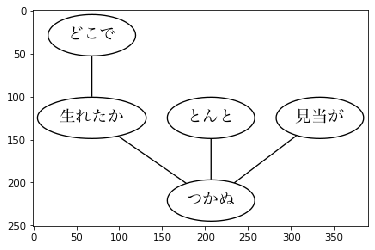

In [11]:
sentence = sentences[5]
graph = create_graph(sentence)

graph.write_png('44.png')
img = Image.open('44.png')
plt.imshow(np.array(img))

45

In [12]:
sentences = []
sentence = []
with open('./neko.txt.cabocha') as f:
    for line in f:
        line = line.replace("\n", "")
        if line == "EOS":
            for index, chunk in enumerate(sentence):
                if chunk.dst != -1:
                    sentence[chunk.dst].srcs.append(index)
            sentences.append(sentence)
            sentence = []
        elif line[0] == '*':
            chunk = Chunk(line)
            sentence.append(chunk)
        else:
            chunk.morphs.append(Morph(line))


In [13]:
outputs = []
for sentence in sentences:
    for chunk in sentence:
        verb  = next((m for m in chunk.morphs if m.pos == '動詞'), None)
        if verb is None:
            continue
        
        verb_base = verb.base
        
        cases = []
        for child_chunk_id in chunk.srcs:
            chuil_chunk = sentence[child_chunk_id]
            
            particles = []
            for morph in reversed(chuil_chunk.morphs):
                if morph.pos == '助詞':
                    particles.append(morph.surface)
                elif morph.pos == '名詞' and len(particles) > 0:
                    cases.append(''.join(reversed(particles)))
                    break
                else:
                    break
            
        if len(cases) > 0:
            output = verb_base + ' ' + ' '.join(cases)
            print(output)
            outputs.append(output)


with open('45.txt', 'w') as f:
    for line in outputs:
        f.writelines(line+"\n")


生れる で
つく が
泣く で
する だけは
始める で
見る は を
聞く で
捕える を
載せる に
持ち上げる と
ある が
落ちつく で
見る を
見る の
残る が でも
する をもって
する が
逢う にも
出会う も
する が
吹く から を
飲む の
知る は
坐る で に
する で
動く が
動く か だけが
分る か
廻る が
なる が
する が
出る から が
する までは
分る は やら
付く が
いる は
見える が も
隠す さえ を
違う とは
明く を
棄てる は から に へ
這い出す で を
ある に が
坐る に
見る は
出る も
来る に
やる に
来る も
渡る を が
かかる が
減る が に
出る が
ある の
ある まで
する を
廻る でも を
する を
這う に
出る で へ
這入る へ
崩れる の
もぐり込む に
破れる が
する は に
云う とは
至る に
する が を
なる は に
忍び込む へは
なる に
減る は
降る が
出来る で が
あるく へ へと
考える から
這入る に
おる は
見る を
する で は に
逢う に
見る より で を
つかむ を
抛り出す は へ
ねぶる を
任せる を に
出来る には が
見る を
這う は へ
這う は
繰り返す でも を
する を
云う に と
なる は
する んで を
下りる が
つまみ出す が に
出る が
ぶら下げる を
向ける へ
出す が
上る へ
困る は
撚る を
眺める を
おる は
置く へ
這入る へ
聞く を
見える は と
抛り出す は に を へ
極める を と
する は に
合せる に と を
帰る から
這入る に
いう が
覗く に を
見る は
する を
ある は が
たらす に を
帯びる で が を
あらわす は を
食う に を
食う を
飲む で を
ひろげる で を
垂らす を へ
繰り返す が
考える ながら
ある は が
生れる と
なる と
出来る にでも
云う に
来る が
鳴らす は に を
住み込む が へ
行く へ
する に
至る に
つける さえ
入れる を
いる に
つとめる を
読む が を
乗る は に
する が を
乗る は に
やむを得る は
寝る へ
する は は は と
入

聞く が に
見る を
買う に が に
挿す は
ねじ伏せる は を に
いう と
する に は を
廻る が を の
見捨てる を に
つく は を
聞く を
する と
伺う から を
願う を
ある が
待つ から に
食う を
読む で を
来る へ から が
いる だけに
思う を に
する を
焚く を
する を かに
引く を
ある が
いく では
する も だけは に
つける に
する か
揚げる を
生きる の
する に を
知る に
なる に
始まる が
する を
いる は に
遊ぶ でも に に
思う の
遊ぶ は でも に
来る へ
出る で に
する が
読む を
なる が
つまる には も
起る が
取る しも
候う に
祝う を
書く が
する が
来る が
なる に
書く へ でも
ある は も
出来る には は
蒙る でも で
ある に
来る が
なる に
入れる を
出掛ける に
向く が
出る へは へ
曇る は
向う が の
鳴る から が と
通り過ぎる を
する が
云う などと
廻る が を け
云う が を
誘う に
なる に
上げる を
見る を
来る に
投げ入れる が を
縮める は を
ひろげる が を
付く が
来る で でも へ
なる が
ある に は
ぶら下がる へ
返る に
なる では に
出る に が へ に
する に
下げる へ を
来る か
見渡す を
来る も
下がる で
下がる が
する で を
添える は を
登る が へ
入れる へ を
蹴返す に が を
入れる を
引く を
ゆるめる を
飛び下りる は
懸ける へ を
見る も
撓る に
かかる が
する を
する に
来る が
逢う に
なる に
帰る へ
聞く が
する が
帰る へ
来る は
ある が
期す を
ある は が
縊れる が
引く を
引き返す で へ
見る を
焦れる は
入る に
ひねくる は を
来る か
ぶら下がる へ
する を
取る は に
云う などに
する と が
する が によって
ある が
すます は
やる は
云う も
頬張る を
云う を
掻く を に
笑う は
開く を
思う で にも
似る で
する を
なる に
なる を
起る くらいに
思う も に
頬張る も を
ある は で が
携え

答える は に
なる と
ある が
云う を
生やす に って に なんか
生やす を
云う とか
分る が
受ける を
する を
出る には は も
忍ぶ の
ある は も
隔てる を
する で が
ある にも か が
向ける へ を
話す が で か で
似る が と
もつ を
する が を
せしめる を
拝する で を
出来る が
祭る に を
する から などを
惹く を
思う とも
いる は って
聞える が
きく に
取る を
取る を
おひゃらかす に を
分る なんぞ が
云う に へ って
弁じる でも
存じる へへへへへ
あずかる に
聞く なんか
する を
切る を
切る から
起す を
廻す は を
いる で が
吠える に
出来る は に
飛び下りる に
もぐり込む へ
する を が
開ける を
する が
来る か
聞く に
呼ぶ が
する が
食わせる は を
ある が
呼ぶ を
食わせる は を
ある で が
利かす を
直す は を
知る でも
する が を
する を
する に
結う に
する は を
食わす を から
掛ける を
いただく から
しまう へ
汚れる までのが
上げる を
ある が
いらっしゃる へ
染め出す へ を
上げる に
だまる を
分る が
黙る に
する は
する は
呼ぶ で で が を
出る は を
引く より が に を
する を
出る で から へ
帰る は に
移る へ
入り込む から へ
する が
奪う に を
留る などには も
なる が
思う に
思う も
立てる に を
ある から が
這入る へ
帰る は
突き立てる を へ
話す で か
来る さえ
する を
洩る の
眺める は
言う を にまで
かい出す がから
なる の
する に を
する を
ひねくる は を
ある に
寝る が
付く に の
着る でも
する が を
結う を に
用いる は が に
する に へでも
する で を
致す に
似合う が
ある も
云う を
打つ を
出す は を
呼ぶ から を
着る を
極め込む を
飛び出す は が から
呼ぶ へへへへ から
する は を
押しかける が
驚く は
飲む は を
聞く を
来る が
する が に
窺う を
貰う を
ひねくる で を
言う が
考える は 

云う を
もつ を
行く へ
買う を
ある が
離れる が を
始める で
逢う に
出る から へ
する が
なる は が
云う を
おく を
話す と
遇う に
ある が
する は で
立つ が
いく も
行く に
なる は
行く まで に
する で に
携える を
帰る も は
洩れる を
する を
する でも は と
価する に
する を
する を に
いう は
帰る と の
吹く は の
籠る は へ
ならべる へ を
寝る は
隔てる を
なる には が に
する と
なる に
急ぐ に を
通る を
取る さえ に
響く は に へ
吹く で を
続く が
与える に を
する に で をからに
承る に
称する とか
ある には が
ある も
云う は
する に
鳴く に
至る に
窶す にかけて を
出す を
話す は も
思う も に
ある も
する さえ に
廻る を も に が
する と
出る が
欲する は を
出来る も
廻る へ
開く を
来る から へ
延べる に
潜り込む は に
寝る として
携える は を から
なる に
続ける を と
置く へ
触れる を
ある は さえ
読む も
笑う が で が
運ぶ を にも まで
抱える は も
抱える さえ
鳴る で が に
聞く を
寝つく は
置く も を に
取る に
読む は
誘う を
有る も か
つかえる が に
開く に
挟まる が に
推す から
並ぶ と
似合う が に
放つ を
放り出す を ばかり へ
開く を
かく を
外す は を
開ける を
かく を
出す を
する を
行く へ
なる が
あく を
する を
使う で を
ある も
する を
弁じる ばかりで を
見る よりも
落ちる から でも
見る はと
劣る に
寝そべる も で
とぶ の
延ばす を
のせる は へ
する の
あげる に を
反り返る は に
する より は
する を
云う とも も
極まる ながら
惜しむ に を
やく に
見廻す を
聞える として
する で を
する から を
する でも を
至る に
する を
張る を
する は は は
ある が
困る は
する には を
考える までも
ある は が
する は
困る の
する でも
行く は には
属する は に
更ける

見せる は を
なる も に
する へは を
引き受ける が
読む を
する が を
云う を
見せる で んで
承る を
する は
いける が
始まる が
聞く は に
開く を
する を
云う が と
言う を
やめる で
する で
する に
云う だって
する を に
見る に は
持つ を
来る などと
出る へ
なる も に
出る に より に へ
する で は
する に と を
やる を
出合う で
出来る は
下げる などは が を
する が
云う は と
ある が
ある が
覚える も
入れる を に へ
担ぐ で
おる は は
出す を
聞く が で
付ける が を
ある が
出る に から へ に
する から を
来る が へ
云う と
出る で に
云う と
ある が で が
残る でも
云う が と
亡くなる でも が に
する を
控える へ
隣る の
坐る が
する に
通す だけで
する を
隣る の
焚く で
する で は に を
する を
する は を
ある についても が
する は
する は
やめる に
なる が について に
くる で が まで
売る の
見る を
おろす を
拭く を
入れる には に に とも が
向う に
買う は
なる は に
好く でも
持つ を で
出す に へ
叩く を
云う は
始まる が
見る は
担う に
入る が
引く に を
する は を
云う に と
なる の
する を
売る を
放す を
担ぐ へ
聞く は も
する で も
する を
する は に を
述べる を
売る を
あるく で
雇う を
やる を
する に が
なる に
はいる なんぞ
する を
表す に を
敲く を
聞く かなんて
いる だって は は も
する を
ある が
なる に
なる に
持つ を
行く も に
出来る も
ある だけ
する に を
ふう を
吹き付ける は へ
する くらいで
出来る から も まで
負ける でも に
来る などと
穿く を
ぶら下がる へ
する から を
する は に を
する が
云う に
する の
発す は から を
離れる とは
する が に を
する を
思い出す は でも を
しゃべる に
出る が
する は
する は
する で が を
禁じる を
感ずる だって を


分かる が
分かる が
する でも に
引く へ
話す から
ある に の
する に
決する を
陣取る に
する には を かに
称する に と
云う などと
云う と
なる の
なる の
こなす で
見える と
称する と
する を が に に
する に を
思う ばかりかと
なる が に
下りる に の
いる に が
号する とか
ある に の
知る を
云う が
わかる は が
わかる が
来る ばかり へ に
這入る に
する を
食う を
寝転ぶ は に
やる を
つく の
棄てる からは を へ
構える に
申し込む も
打つ は
分る か
くる で を
見える と
向ける から へ
てる を
来る は
云う と
追う を
変ずる を
去る を
進む は に
ある の
取れる は
加える を
なる は と
いる ほど
なる は に
うたう において を
忘れる か
入る に
する に
傾ける を
云う と
云う と
ある は が
合す が
なる と
考える から
飛び出す から
這入る の
追い出す は
ある の
聞く で
うたう を
する に を
云う と
属す は は に
なる に
学ぶ の
せる から
ある が
飛び出す から
まえる に を
這入る へ
忘れる を
思う かと
答える は で
戒める を
放す は
捉える を
する は
思う は
違う から と
する から を
抜ける から
あける を
思う かと
笑う で
する は が
なる は
合う は は に
立てる へ
奉る を に
する をと
送る も を に
する を
来る が
出来上がる に が
こむ は
する で の
からかう に
からかう に
利く の
からかう に
する を
ある が
いる が
いく が において において
帰る が から
ある が
見る を
する が を
つく は も
こしらえる へ を
する に
つかす も を
来る でも が と
する が
過ぎる に が
なる に
する に
むき出す を
怒る は
する を
出来る も
ある の
ある は
適す に
する さえ
見る には
投ずる に
重ねる に を
くらす を
ある は が
出来る に ほど の
する か を
つまる も
作る を
怒る を
ならぶ に
耽る に
知る を
なぐさむ の
窮する に
限る

丸める に
抛る は へ
立つ にも
かかる に
放つ は を
認める ん に で に
出る から が
律する を以て を
する に
吸う を
律する を以て を
ある と か
食う を
敬する は に て
喫する を
重んずる は に て
食える を
する は に
喫する を
知る を
食う を
見る を
売る も を
ある も に
たかる は が
する に
失う は
する に
生える には が
する を と
たのむ に を
せる に
せる の
する を
向う として に
遺す をか
上がる でも
思う を と
思う と
思う を と
憤る を
思う を と
思う と
する を に て として を
する に を
思う を と
思う を と
降る は に
名づける を
いう と
ある は に
好む が
構える ほど に
出す へ
なる に
ある は
もつ の
引き裂く は に
ある に が
究める を
わかる に
ある は
つける を
する でも
出来る に の
通る が で が でも
つける でも さえ
とれる は
知る に
くる を に
つける は を
問う に
云う と
云う は で と
する を
食う を
起す を
湧き出る に
呑み込む に を
する でも を
分る でも は
ある も
寄る に
ありがたがる を
有す は を
限る に
出来る に
する が
起る が
わかる は
わかる を
係る に
わかる は を
する に
わかる でも
する を
知れる は
する が に
存する が に
出る に が
出る が
する が を
する で を
する で を
する で を
分る で
すむ が
つける を
する だけは
わかる を
する で
巻く を
置く を に
する を
沈む は に
頼む へ
乞う から で を
ある が
似合う に
頼む を
聞く は から で を
出る に
する から を
買う を
出る は
出る に
なる は だけに
出る だって
飛び上がる から へ
開け放つ を
上る は
行く へ
する を たり
やってくる は へ
する を
いる に
ある が
力む から を
する を
出来る が
連れる を
連れる を
逢う に
担ぐ を
出る へ
つく も
這入る は へ
する を に が と
出す から を
片づける は へ を
指す 

恐れ入る は には
する を
動く は
いる で
怒る は
脱ぐ を
抛る を へ
する を
来たす は
云う で
する を
する を
する も
云う も
ふかす を
なる が に
捲く を に
捲く に
する も
化ける は に
ある にも が
おっしゃる は
化ける に
出来る は も
する を
やる に に
揉む は を
開く でも を
引き受ける も
雇う を
騒ぐ を
いじめる を
騒ぐ で
聞く が に
見える が
なる が
なる でも に
する が を
云う と
もらう を
貰う を
する で から を
云う に と
知る も
する も に
いる が
見る が を
騒ぐ は
出来る が
云う の
聞く が を
やらす に
頼む から に
引き受ける は
する を
する に
引き込む を
出る へ
放つ が で を
笑う は
云う と
云う と
知る を
くれる を
来る で が へ
する を
動く に
云う は
致す が を
ある は が
する を
通る から を
とる から を
ある は が
限る に
いう は
受ける を
費やす を
やる の
する に
在る に
なる を に
する には で を
なる が に
起る に
ある が
祟る が
なす を
ある は が
なる に
なる に
なる に
怒る なんぞは だって
行く も へ
来る に
云う だって
する を
見える は
する に を
なる じゃ なんぞは くらい
つくる は
ある が
ある の
ある が
なる に
云う も
捧げる が を
する に
捧げる が
する を
思う が
ある が
ある から が
送る へ を
ある が
する を
書く は
ある ばかりも
かく が
いる が を って
あこがれる が に
供える に
なる と
ちる の
立つ に が
見る で を
ある が
見せびらかす を
行く は へ に
知れる が へ
来る が
行く へ
磨く は ばかり
なる を に
ある が
なる に
する は
行く じゃ へ に
する と は について か を
開く が を
行く も に
満ちる に
する に を
抜く も を
構える に
行く へ
見る は ながら
行く へ に
渡る を
得る を
問い返す に
する の
向う が に
持ちかける は を
すく も が
行く に へ に


来る へ
ともる には が
張る は が を
及ぶ には
すかす に
する に を
帯びる に を
映る だけが に
ほめる が
する に が
する が
笑う が で
出す から を
出す から を
きく が
する を
思う で
引っ張る で を
ある が
通る で が
通う が
する は
構う でも
する が を
持つ を
出せる に を
する などと
溜まる までも に
ある には が
限る に
出来る に などに は
逢う に
弾く を
押す が を
つける を
思う の
あく に が
つける を
ふかす は
なる は
這入る へ
持ち出す を
なる に
する へ
並べる で を
とる は を
かかる も
減る が
する に
なる に のみと
ふう を
吹き出す へ
もつ を
つづける を
思う は
来る に
寝る は
帰る でも が から
寝る が
見計らう を
する が に
見積る は を と
暮す まで かで
帰る へ
話す へ
咎める は が
くる が
する を
する に
経つ は
限る に
たつ の
云う とは を
する を
向く を
待つ を
云う に と
ある が
待つ より
吊る に
まごつく に
する に
ある は でも
きく を
読む を
する が
堪える は に
する に
掛ける に
する を
する は
つづける は を
通る から を
出る から へ
する で を
する で を
ふかす で を
見る を
なる に
なる に
渡る を
上る に へ
ある に
吠える が
きく に で を
云う と
する か
買う に を
認める が
する を
する を
なる に ほど に
生れる も に
買う で を
負ける じゃ
する と
なる に
弱る には
する を
足りる で
する を
食う を も
聞く までも
なる に
笑う は
越す を
ある は
する じゃ に に
なる に
来る へ
絶える も が
くる から
たてる を
する だけを に
ける に
あける を
はずす から を
買う を
聞く は
答える が
云う に
読み出す を
埋める は で を
被る を
くれる を
かたまる に が
する を
驚く が
見る に を
挙げる を
引く は を に
くれる を
云う に
いる に
覗く を
する がへ を
吊るす に
卸す を に

In [14]:
!sort < 45.txt | uniq -c | sort -k 1 -r

 694 する を
 279 ある が
 278 なる に
 249 する に
 243 云う と
 180 する が
 135 する は
 130 見る を
  83 出来る が
  78 する は を
  77 云う を
  74 する を に
  66 する が を
  66 行く へ
  61 もつ を
  60 する に を
  60 する と
  60 ある は
  59 食う を
  59 する も
  59 ある の
  58 云う は
  58 ある も
  56 聞く を
  54 出す を
  51 出る が
  50 ある に
  48 する は に
  47 云う が
  47 する の
  45 なる が
  45 する で
  43 見える と
  43 来る が
  42 なる が に
  41 ある は が
  41 知る を
  41 やる を
  39 する で を
  38 する から
  37 持つ を
  36 ある に が
  36 至る に
  35 なる は に
  35 出る へ
  30 這入る へ
  30 出来る は
  30 よる に
  30 なる と
  30 とる を
  29 読む を
  29 なる は
  28 つける を
  28 見る は
  28 思う と
  27 出来る も
  27 いる に
  26 逢う に
  25 行く に
  24 入る に
  23 する が に
  22 笑う は
  22 向う に
  22 分る が
  21 受ける を
  21 見る から
  21 云う から
  21 得る を
  20 出来る に
  20 ある には が
  19 思う かと
  19 聞く に
  19 聞く が
  19 つく が
  18 立てる を
  18 する でも
  18 来る へ
  18 引く を
  17 云う に と
  17 来る に
  17 いる が
  16 答える は
  16 入れる を
  16 起る が
  16 笑う が
  16 出る に
  16 云う に
  16 やる に
  16 なる の
  16 する へ
  15 云う は を
  15 飲む を
  15 聞く は
  15 有す を
  15 取る を
  15 

In [15]:
!cat 45.txt | egrep ^する | sort| uniq -c | sort -k 1 -r

 694 する を
 249 する に
 180 する が
 135 する は
  78 する は を
  74 する を に
  66 する が を
  60 する に を
  60 する と
  59 する も
  48 する は に
  47 する の
  45 する で
  39 する で を
  38 する から
  23 する が に
  18 する でも
  16 する へ
  14 する から を
  13 する も を
  13 する は と
  12 する には
  12 する は に を
  11 する に に
  10 する だけは
  10 する も に
  10 する と を
   9 する は も
   9 する は が
   9 する に が
   8 する まで
   8 する さえ
   8 する で が
   8 する か
   7 する でも を
   7 する を と
   6 する なんか
   6 する を が
   6 する は で
   6 する が で
   5 する をもって
   5 する は を に
   5 する が を に
   5 する で に
   5 する や
   4 する ばかり
   4 する として
   4 する から に
   4 する にも
   4 する とを
   4 する を から
   4 する は から
   4 する が から
   4 する は で を
   4 する に を に
   4 する で に を
   4 する で が を
   4 する が で を
   4 する へ を
   4 する は は
   4 する が と
   3 する において
   3 する くらいに
   3 する ばかり に
   3 する などを に
   3 する などと
   3 する だって
   3 する にも を
   3 する じゃ
   3 する に について
   3 する が として
   3 する も を に
   3 する に は を
   3 する が に を
   3 する も が
   3 する に と
   3 する で も
   3 する が へ
   3 する が が
   3 する か を
   2 する としては
   2 する として に
  

In [16]:
!cat 45.txt | egrep ^見る | sort| uniq -c | sort -k 1 -r

 130 見る を
  28 見る は
  21 見る から
  13 見る に
  13 見る が
  11 見る と
   9 見る は を
   8 見る も
   7 見る が を
   6 見る を に
   5 見る に を
   5 見る で
   3 見る ばかり
   3 見る から を
   3 見る でも
   3 見る は で を
   2 見る まで
   2 見る は でも
   2 見る で を
   2 見る の
   2 見る て
   1 見る については
   1 見る に従って
   1 見る よりも
   1 見る なんか
   1 見る には なんぞに を
   1 見る には をも
   1 見る より で を
   1 見る まで を
   1 見る には を
   1 見る んで
   1 見る より
   1 見る べて
   1 見る へも
   1 見る はに
   1 見る はと
   1 見る には
   1 見る とは
   1 見る じゃ
   1 見る さえ
   1 見る は ながら
   1 見る に って を
   1 見る を から
   1 見る も だけ
   1 見る は に を
   1 見る が を に
   1 見る は は
   1 見る は が
   1 見る は か
   1 見る に は
   1 見る に が
   1 見る で が
   1 見る か で
   1 見る か が
   1 見る へ
   1 見る か


In [17]:
cat 45.txt | egrep ^与える | sort| uniq -c | sort -k 1 -r

   4 与える に を
   4 与える を
   2 与える は に を
   2 与える は を
   1 与える として をか
   1 与える だけに を
   1 与える には に対してのみは も
   1 与える には を
   1 与える に けを
   1 与える は に を に


46

In [18]:
outputs = []
for sentence in sentences:
    for chunk in sentence:
        verb  = next((m for m in chunk.morphs if m.pos == '動詞'), None)
        if verb is None:
            continue
        
        verb_base = verb.base
        
        cases = []
        term = []
        for child_chunk_id in chunk.srcs:
            child_chunk = sentence[child_chunk_id]
            
            particles = []
            for morph in reversed(child_chunk.morphs):
                if morph.pos == '助詞':
                    particles.append(morph.surface)
                    term.append(str(child_chunk))
                elif morph.pos == '名詞' and len(particles) > 0:
                    cases.append(''.join(reversed(particles)))
                    break
                else:
                    break
            
        if len(cases) > 0:
            output = verb_base + '\t' + " ".join(cases) + '\t' + ' '.join(sorted(term))
            print(output)
            outputs.append(output)


with open('46.txt', 'w') as f:
    for line in outputs:
        f.writelines(line+"\n")



生れる	で	どこで
つく	が	生れたか 見当が
泣く	で	所で
する	だけは	いた事だけは いた事だけは 泣いて
始める	で	ここで
見る	は を	ものを 吾輩は
聞く	で	あとで
捕える	を	我々を
載せる	に	掌に
持ち上げる	と	スーと 載せられて
ある	が	感じが
落ちつく	で	上で
見る	を	落ちついて 顔を
見る	の	ものの
残る	が でも	今でも 感じが
する	をもって	第一毛をもって
する	が	顔が
逢う	にも	猫にも 猫にも
出会う	も	一度も
する	が	真中が
吹く	から を	ぷうぷうと煙を 中から
飲む	の	人間の
知る	は	事は
坐る	で に	心持に 裏で
する	で	すると 速力で
動く	が	書生が
動く	か だけが	動くのか 自分だけが 自分だけが
分る	か	動くのか
廻る	が	分らないが 眼が
なる	が	胸が
する	が	どさりと 音が
出る	から が	して 火が 眼から
する	までは	それまでは それまでは
分る	は やら	あとは 事やら 考え出そうとしても 考え出そうとしても 記憶しているが
付く	が	気が
いる	は	書生は 見ると
見える	が も	一疋も 兄弟が
隠す	さえ を	姿を 母親さえ
違う	とは	所とは 所とは
明く	を	眼を
棄てる	は から に へ	上から 中へ 吾輩は 急に
這い出す	で を	思いで 笹原を
ある	に が	向うに 池が 這い出すと
坐る	に	前に
見る	は	吾輩は 考えて
出る	も	分別も
来る	に	迎に
やる	に	試みに
来る	も	見たが 誰も
渡る	を が	さらさらと 上を 風が
かかる	が	日が 渡って
減る	が に	腹が 非常に
出る	が	声が 泣きたくても 泣きたくても
ある	の	食物の
ある	まで	所まで
する	を	こうと 決心を
廻る	でも を	何でも 何でも 左りに 池を
する	を	そこを
這う	に	我慢して 無理やりに
出る	で へ	事で 所へ 這って行くと
這入る	へ	ここへ
崩れる	の	竹垣の
もぐり込む	に	思って 邸内に
破れる	が	竹垣が
する	は に	吾輩は 路傍に
云う	とは	蔭とは 蔭とは
至る	に	今日に
する	が を	三毛を 吾輩が 至るまで
なる	は に	穴は 通路に
忍び込む	へは	邸へは 邸へは
なる	に	うちに
減る	は	腹は
降る	が	雨が
出来る	で が

持つ	に を	吾輩のように 牡蠣的主人を
出る	では は	ものだが 気は 身の上では 身の上では
いう	でも	何でも
なる	に	気に
しかる	の	境遇の
食う	が	今雑煮が
食える	でも	何でも
食う	に	時に
食う	の	主人の
残る	が に	台所に 雑煮が
廻る	へ	台所へ
する	で に	底に 色で
入れる	まで も に	一辺も 今まで 口に
ある	にも	うまそうにも うまそうにも 見ると
ある	が	少しは 気味が
かかる	で に	上に 前足で
掻く	を	菜っ葉を
見る	を	爪を
引く	が	上皮が
移す	を へ	御櫃へ 飯を
する	が	見ると 香が
見廻す	を	あたりを やめようかなと
いる	か も	不幸か 誰も
する	も を	春も 顔を
つく	は を	して 御三は 羽根を
歌う	は で	兎さんを 奥座敷で 小供は
はずす	を	機を
知る	を	味を
する	は に ながら を	刹那に 吾輩は 猫ながら 真理を
する	を	動物を
する	は をも て	事をも 事をも 敢て 機会は
云う	を	実を
食う	は を	云うと 吾輩は 雑煮を
する	を	様子を
なる	が	食うのが
開ける	でも を	勝手口を 御三でも
近付く	が へ	こちらへ 足音が
聞く	を	近付くのを
見棄てる	を	椀を
浮ぶ	は は まで に	事は 吾輩は 念頭に 来年まで
来る	も	誰も
来る	も	いくら躇していても いくら躇していても 誰も
する	が	心持が
覗く	を	中を
来る	か	誰か
念じる	は	吾輩は 来てくれればいいと
来る	も	誰も
食う	は を	吾輩は 雑煮を
落す	を へ	底へ 重量を
食い込む	を ばかり	一寸ばかり 角を
込める	を	力を
引く	を	思って 歯を
とれる	が	動きが 噛み直そうとすると
落ちる	へでも	沼へでも 沼へでも 沼へでも
抜く	が を	人が 足を
沈む	に	たびに 抜こうと
なる	が	ほど 口が
動く	が	歯が
ある	は	歯答えは
ある	が	歯答えが
つける	を	あるだけで あるだけで 始末を
出来る	が	事が
評す	が を	主人を 美学者迷亭先生が
ある	は が	事が 君は 評して
いう	を	事を
割り切れる	も に	同じように 餅も
割る	で を	三で 十を
つく	の	尽未来際方の
する	は に	吾輩は 真理に
する	は に を	動物は 直覚的に 適不適

来る	が	くさくさしてしまって 東風が
なる	に	晩飯に
書く	へ でも	母へ 返事でも 返事でも
ある	は も	六尺以上も 手紙は
出来る	には は	あるのだが 僕には 僕には 芸は
蒙る	でも で	いつでも 十行内外で
ある	に	事に
来る	が	東風が
なる	に	気に
入れる	を	郵便を
出掛ける	に	入れながら 散歩に
向く	が	足が
出る	へは へ	向かないで 方へ 方へは 方へは
曇る	は	晩は
向う	が の	御濠の 曇ってから 風が
鳴る	から が と	ヒューと 方から 汽車が
通り過ぎる	を	土手下を 鳴って
する	が	感じが
云う	などと	無常迅速などと 無常迅速などと
廻る	が を け	中を 奴が 馳け
云う	が を	人が 縊ると 首を
誘う	に	時に
なる	に	云うが 気に
上げる	を	ちょいと 首を
見る	を	上げて 上を
来る	に	真下に
投げ入れる	が を	主人が 何だいと 断句を
縮める	は を	松さと 迷亭は 領を
ひろげる	が を	台でしょう寒月が 波紋を
付く	が	名が
来る	で でも へ	下へ 言い伝えで 誰でも
なる	が	来ると 首が
ある	に は	上に 松は
ぶら下がる	へ	松へ 見ると
返る	に	年に
なる	では に	松では 松では 気に
出る	に が へ に	具合に 方へ 枝が 横に
する	に	ままに
下げる	へ を	人間を 所へ
来る	か	誰か
見渡す	を	四辺を
来る	も	見渡すと 誰も
下がる	で	自分で
下がる	が	自分が
する	で を	席で 真似を
添える	は を	して 余興を 希臘人は
登る	が へ	一人が 上へ
入れる	へ を	登って 結び目へ 首を
蹴返す	に が を	ものが 台を 途端に
入れる	を	首を
引く	を	台を
ゆるめる	を	縄を
飛び下りる	は	ゆるめて 当人は
懸ける	へ を	手を 枝へ
見る	も	僕も 懸けて 試みようと
撓る	に	具合に 見ると
かかる	が	首が
する	を	ところを
する	に	事に
来る	が	東風が
逢う	に	東風に
なる	に	気に
帰る	へ	うちへ なって
聞く	が	かいと 主人が
する	が	寒月が 面白いですなと
帰る	へ	うちへ
来る	は	東風は 見ると
ある	が	無拠処差支えが
期す	を	永日御面晤を
ある	は が	今日は 端書が
縊れる	が	首が
引く	を	下駄

聴く	に	やるから 僕に
聞かす	にも	苦沙弥にも 苦沙弥にも
呼ぶ	へ	家へ
する	に	事に
ある	なんぞ	いいやね——差支えなんぞ
呑み込む	は で	いいさと 独りで 迷亭は
分る	なんか にゃ	僕にゃ 演説なんか
憤る	を	専断を
云う	は	もののごとくに 主人は 分らんと
付ける	が	問題が
云う	についてなどと	ノッズルについてなどと ノッズルについてなどと ノッズルについてなどと
云う	と	力学と
ある	が	価値が 演題なのだから
する	は	君は 男だから
する	で が	悪寒が 歌舞伎座で
叩く	を	ないぜと 軽口を
笑う	と	ホホと
顧みる	を	主人を
退く	は へ	妻君は 次の間へ 笑って 顧みながら
撫でる	は を	主人は 頭を
撫でる	のみは	時のみは 時のみは
来る	が	寒月君が 約七分くらいすると
する	は に を	今日は 晩に 演舌を
着る	を	フロックを
聳やかす	を	白襟を
上げる	を	男振りを
する	を	いうので 挨拶を
待つ	から で に	さっきから 二人で 大待ちに
見る	を	主人を 願おうなあ君と
する	も を	うむと 主人も 生返事を
いそぐ	は	寒月君は
する	へ を	コップへ 水を
やる	に	いよー 本式に
なさる	か には	やるのか 次には 次には
騒ぎ立てる	は で	なさるだろうと 独りで 迷亭は
取り出す	から を	内隠しから 草稿を
願う	を	御遠慮なく御批評を
する	に を	前置を 取り出して 徐ろに 願いますと
浚う	の	演舌の
始める	は	寒月君は 御浚いを
絞る	を	罪人を
処する	に	刑に
行う	に に	アングロサクソン民族間に 重に
溯る	より に	それより 古代に
行う	に として	方法として 重に
在る	に	太人中に
抛る	を を	石を 罪人を
する	を	旧約全書を
釣る	を	死体を
する	と	釣るして 餌食と
認める	は と	意義と 見ますと 語は
見る	に従って	説に従って
去る	を	エジプトを
曝す	から を	以前から 夜中死骸を
忌み嫌う	を	ことを
思う	は に	太人は 忌み嫌ったように 見ますと
斬る	を	首を
する	だけを に に	十字架に 斬って 胴だけを 胴だけを 釘付けに
する	は に	して エジプト人は 曝し物に
なる	が	縁が
入れる	が を	口を 大丈夫かいと 迷亭が
這入

来る	か	誰か
聞く	に	一生懸命に 来たなと 来たなと
呼ぶ	が	奥様が
する	が	呼んでいらっしゃいますと 声が 聞いていると
食わせる	は を	令嬢は 剣突を 知らないよと
ある	が	ちょっと用が
呼ぶ	を	あるから 嬢を
食わせる	は を	令嬢は 剣突を 知らないてばと
ある	で が	事で 御用が
利かす	を	気を
直す	は を	あるんだそうでございますと 利かして 小間使は 機嫌を
知る	でも	水月でも 水月でも
する	が を	戸迷いを 糸瓜が
する	を	顔を
する	に	留守中に
結う	に	束髪に
する	は を	一息ついて 今日と 挨拶を 結ったの小間使は
食わす	を から	別方面から 剣突を 癖にと
掛ける	を	して 半襟を
いただく	から	せんだって御嬢様から
しまう	へ	中へ 思って
汚れる	までのが	今までのが 今までのが 今までのが
上げる	を	ものを
ある	が	事が
いらっしゃる	へ	白木屋へ
染め出す	へ を	番附を 鶯茶へ
上げる	に	いやだから 御前に
だまる	を	ものを
分る	が	似あうのが
黙る	に	癖に
する	は	剣突は
する	は	事局は
呼ぶ	で で が を	令嬢を 声で 富子やと 座敷で 金田君が
出る	は を	はいと 令嬢は 電話室を
引く	より が に を	中心に 口を 吾輩より 狆が
する	を	面を
出る	で から へ	勝手から 往来へ 忍び足で
帰る	は に	吾輩は 家に 急いで
移る	へ	所へ
入り込む	から へ	中へ 山の上から
する	が	心持ちが
奪う	に を	事に 気を
留る	などには も	具合などには 具合などには 具合などには 眼も
なる	が	月並が
思う	に	えらいように
思う	も	吾輩も 変だと
立てる	に を	伺いを 尻尾に
ある	から が	先から 御託宣が
這入る	へ	座敷へ
帰る	は	驚いたのは
突き立てる	を へ	中へ 吸い殻を
話す	で か	何か 大胡坐で
来る	さえ	寒月君さえ
する	を	手枕を
洩る	の	天井の
眺める	は	して 主人は 雨洩を
言う	を にまで	事を 譫語にまで 譫語にまで
かい出す	がから	善かろうと 迷亭がから 迷亭がから
なる	の	先方の
する	に を	それに博士夫人に 約束を
する	を	他言を
ひねくる	は を	ええと 寒月君は 紐を
ある	に	売品に
寝る	が	主

来る	は へ	娘は 所へ
構う	は	どうでも 鼻は
聞く	だけ	事だけ
する	さえ	復命さえ 聞いて
確かめる	までは	意向までは 意向までは
見える	も に	気味に 鈴木君も
よる	は に	主人は 何事に 言葉だと
すむ	が	どやし付けないと 気が
云う	の	僕の
ある	が	意が 方でも
云う	が に	——細君が 僕に
云う	を	悪口を
ある	でも も	事も 何でも 時々は
云う	を	悪口を
いる	の	自分の
ある	などは も	事も 悪口などは 悪口などは
いる	が に	国に 奴が
立ち入る	に	機微に
云う	を	事を
ある	が にゃ	世の中にゃ 奴が
する	も	妻君も
する	を	戸惑いを
云う	を	悪口を
ある	では	中では 中では 思ってるに
聞く	を	解釈を
する	を	眼を
する	も	返答も
見つめる	に と	大道易者のように 眤と
出来る	にも の	主人にも 主人にも 判断の
移す	は へと を	方面へと 方面へと 話頭を 鈴木君は
ある	が	財産が
やれる	へだって へ	どこへだって どこへだって 家へ
知れる	だって	寒月だって
云う	から と	——いや身分と 身分から
云う	と	——財産と
見る	が	だれが
釣り合う	から	点から 見たって
する	を が	それを 僕が
揉む	が を	両親が 出張するくらい 気を
ある	に が	寒月君に 意が
つける	を	理窟を
与える	は を	つけて 事じゃあないかと 説明を 鈴木君は
出来る	は にも が	主人にも 主人にも 今度は 納得が
する	に	ところに
喰う	を	吶喊を
ある	が	危険が
進める	を	歩を
する	を	使命を
心付く	が と	完うする方が 策と
云う	で	先方で
いる	も は	云うには 云うには 何も 財産は
する	に	代り当人に
云う	と	欲しい——資格と
なる	に	——博士に
来る	の	細君の
いる	が	迷亭君が
云う	ばかり	いて 事ばかり
いる	も を	事を 方だと 細君も
なる	が にでも	それでさ本人が 博士にでも 博士にでも
対す	でも へ	世間へ 先方でも 先方でも
ある	が	面目が
する	でも	博士論文でも 博士論文でも
受ける	を	学位を
行く	は には	内水島君は 運びには 運びには
いる	も	学士も
云う	と	世間と
ある	が	者が
行く	にも	手軽にも 手軽にも
する

来る	の	今頃人の
極める	に	事に
あばれる	に	勝手に 極めているから
中る	と	トントンと
出る	の	主人の
破る	を	夢を
心得る	を	驚破するのを
する	にまで	寝室にまで 寝室にまで
奏す	を	凱歌を
引き上げる	んで	囓んで 奏して
する	に	鼠に
すぎる	などは	しては しては せんだってなどは せんだってなどは
持ち上げる	を から へ	上へ 下から 雨戸を
する	が	音が
出来る	を	腰障子を
添う	に	溝に
滑る	は	今度は 出来るだけ 添うて
乞う	に が も	人間が 案内も 深夜に
なる	を て に	外ずして 御光来に 戸締を
知る	だけは	御高名だけは 御高名だけは 泥棒陰士ではないか
する	と	陰士と
する	を	すれば 尊顔を
上げる	に を	上に 泥足を
進む	ばかり	上げて 二足ばかり
思う	と	三足目と
蹶る	に	揚板に
響く	に	夜に
立てる	を	音を
擦る	が で に	毛が 逆に 靴刷毛で
する	が	心持が
する	も	しばらくは 足音も
見る	を	細君を
あく	を	口を
する	を に	あいて 夢中に 空気を 見ると
挟む	に を	拇指を 本に
見る	は でも	主人は 夢でも 夢でも
擦る	で を	マチを 台所で
聞える	が	音が
利く	でも ほど に は	吾輩ほど 夜陰に 眼は 陰士でも 陰士でも
考える	は ながら	吾輩は 蹲踞まりながら
向ける	から へ	勝手から 方面へ
折れる	へ	左へ
する	を	玄関を
抜ける	は へと	書斎へと 書斎へと 通過して 陰士は
出る	は と共に へ	——足音は 椽側へ 音と共に
這入る	は へ	書斎へ 陰士は
起す	に を	この間に 主人夫婦を
付く	が	ものだと 気が
得る	を	要領を
する	のみが に で	中に 勢で 考のみが 考のみが
出る	も	分別も
見る	を	えて振って 裾を
擦り付ける	を に	頬に 鼻を
持つ	へ	先へ
眠る	は	主人は
延ばす	を	手を
云う	と	否やと 鼻づらを
返る	と	にゃーにゃーと
思う	に が	咽喉に 物が
出る	か ばかりは が	ものか 声が 時ばかりは 時ばかりは
渋る	で	思いで
出す	を	奴を
する	が	ないのに 足音が
伝う	を	椽側を
忍ぶ	に を	間に 間身を
来る	へ	前へ
凝らす	を	息を
する	を	何を
なる	は は に	する

取り出す	から を	中から 鋏を
見せる	は は に	今度は 取り出して 細君に 迷亭君は
なさる	は を	して 帽子は 鋏を
使える	で に	これで 十四通りに
出る	が	鋏が
なる	に に	ために パナマ責めに
持つ	に が として	女として 幸に 細君が
かれる	を	厄運を
云う	と	機転と
する	は は	かれたのは 云わんより 仕合せだと 吾輩は
使える	が に	十四通りに 鋏が
聞く	は で	今一説明しますから 調子で 迷亭君は
ある	に が	ここに 欠け目が
入れる	へ を	ここへ 葉巻を
切る	を	ぷつりと口を 入れて
ある	に が	根に 細工が
やる	で を	これで 針金を
置く	へ に	上へ 平たくして 横に
する	を	用を 置くと
する	には が	盛が 裏には 裏には
出来る	も	してあるから 代用も
付く	が	ヤスリが
磨る	で を	これで 爪を
刺す	へ	先きを 頭へ
使える	にも	廻すと 金槌にも 金槌にも
とれる	が	こじ開けると 蓋が
出来る	は に	先は 錐に
削る	を	字を
離す	に	ばらばらに
なる	と	ナイフと
ある	に が	ここに 球が
なさる	に	馬鹿に
渡す	を に	いいからと 細君に 鋏を
取りあげる	を	覚束なげに 鋏を
付ける	へ を	所へ 眼玉を
つける	は を	付けて 細君は 覘を
向く	へ	も 方へ
寝かす	を	鋏を
張り付ける	を	写真を
する	は を	さあと 問答を 迷亭は
黙る	から	最前から
見る	に が	写真が 急に
見える	と	ものと
せる	にも	俺にも 俺にも
押し付ける	を へ	鋏を 顔へ
離す	は	云うと 云って 細君は
ある	まで	腰まで
する	に	大抵に
急き込む	に	大に
食う	に	急き込んで 細君に
掛る	は	主人は 見せるがいいと 食って
渡す	が を に	主人に 細君が 遊ばせと 鋏を
参る	から が が	勝手から 御三が 御誂が
持つ	を へ	座敷へ 笊蕎麦を
ぱくつく	で	ここで
致す	に	事に
する	に を	叮嚀に 御辞儀を 致しますからと
する	も に	動作だから 応対に 細君も
する	を	さあどうぞと 見えて 返事を
放す	から を	写真から 眼を
云う	は	主人は 放して 毒だぜと
中る	に	滅多に
とる	を	もんじゃないと 蓋を
延びる	の	蕎麦の
抜ける	が	間が


引き上げる	へ	奇麗さっぱりと 椽側へ
過ごす	を	度を
ある	が	感が
照り付ける	で に	取り付きで 運動中に
する	を	西日を
染む	から	毛穴から
ねばる	に に	根に 膏のように
する	が	背中が
する	で	汗で
這う	と が	むずむずするのと 蚤が
出来る	は が	するのは 区別が
届く	の	口の
出来る	も	事も
達する	の	足の
引く	は	領分は
ある	も に	事も 心得に
通う	に	縦に
来る	と	真中と
及ぶ	の	自分の
見る	を	人間を
こする	に	矢鱈に 見懸けて
行う	で を	摩擦術を 皮で
択ぶ	を	一を
出来る	には で も	不愉快で 安眠も 択ばんと 時には 時には
出す	は に対して	吾輩に対して 猫なで声で——猫なで声は
する	を に	吾輩を 目安に
寄る	で へ	傍へ 撫でられ声で
愛する	において を	場合において 彼女を
する	と	ものと
為す	が	わが
任せる	に	ままに
撫でる	さえ	任せるのみか 任せるのみか 折々は 頭さえ
号する	にのみと	毛中にのみと 毛中にのみと 毛中にのみと
する	が	寄生虫が
寄り添う	に	滅多に 繁殖したので
持つ	を	頸筋を
抛り出す	へ	向うへ 持って
入る	に	わずかに 眼に
つかす	に を	ために 愛想を
翻す	を	手を
覆す	を	手を 翻せば
出来る	で が	二千疋で 真似が
行う	を通じて	人間世界を通じて
ある	には	第一条には 第一条には
なる	に	利益に
愛す	を	人を
取る	の	——人間の
する	を	人力を 痒ゆくても 痒ゆくても
出来る	は	事は
やる	によって を	方法によって 松皮摩擦法を
降る	から	椽側から
心付く	も	これも 愚策だと
ある	には が	松には 松には 脂が
くる	へ	先へ
鳴る	が	雷が
する	が	バルチック艦隊が 鳴っても 鳴っても
こびりつく	へ	毛へ
する	に	十本に
愛する	を	淡泊を
いう	の	天下の
乗じる	から に	両眼から 北風に
択ぶ	と	目糞と
もつ	を	身分を
する	を	毛衣を
行く	へ	あたりへ
つける	を	背中を 行って
なる	に	おいでに
する	を に	相手に 頓痴奇を
係わる	に	しては しては 顔に
する	において	今において
罹る	に	一工夫しておかんと 結果病気に
折る	を	足を
ある	が	事が
もつ	を	

出す	を	声を
縺れる	と	紛々と
する	に	上に
なる	には が に	一人に 浴場全体が 瞬間には 瞬間には
答える	で	おーいと 後ろで
ある	が	ものが 見ていると
そらす	に を	おやと そちらに 眸を
出来る	として も	憺として 物色も
砕ける	の が	三介が 例の
投げ入れる	を に	中に 石炭を 砕けよと
見える	が	投げ入れるのが
くぐる	を	蓋を
なる	が	半面が 塊りが
ある	に	後ろに
飛び下りる	から	物凄くなったから 窓から
帰る	は に	吾輩は 家に 飛び下りて
脱ぐ	を	羽織を
脱ぐ	を	猿股を
脱ぐ	を	袴を
なる	に	平等に 脱いで
出る	が	豪傑が
する	を	出て来て 群小を
光らす	を	顔を
食う	は を	主人は 光らして 晩餐を
上がる	が から	吾輩が 椽側から
見る	を	上がるのを
あるく	を	どこを
見る	を	上を
ならべる	に を	二三品御菜を 癖に
焼く	に の	うちに 肴の
ある	が	焼いたのが
知る	は か	これは 肴か
やる	で	昨日あたり御台場近辺で
する	は	ものだと 肴は
焼く	でも	丈夫でも
する	に	多病に
保つ	を	して 残喘を
坐る	に	傍に 考えて
ある	が	隙が
する	か	何か
知る	を	装い方を
食える	は は	ものは 肴は
突っつく	は を	主人は 肴を
する	を	顔付を
置く	を	して 箸を
控える	に	正面に
する	に	上下に
する	は を に	具合を 妻君は 熱心に
撲る	を	頭を
する	は に	主人は 細君に 見ろと
敲く	は で を	こうですかと こうですかと 平手で 細君は 頭を
参る	で と	ぽかと 事じゃありませんかと 平手で
する	には と	ためたるやは 吾輩には 吾輩には 頓と
出来る	が	これが
困る	も	細君も
困る	も	吾輩も
ならぶ	は まで	主人は 二度まで 思い通りに
ぶつ	に	鳴くように
云う	で	焦れ気味で 見ろと
なさる	に	何に 鳴かして
問う	で	なさるんですかと 顔付で
なる	は に	おいでに ぴしゃりと 細君は
わかる	が	目的が
する	を	主人を 鳴いてさえやれば
出来る	は	事は
なる	は	主人は 愚物だから
云う	と	ためと
する	は	三返も 云えば 手数は
なる	で に	一度で 放免に
繰る	も を も	三度も 事を 吾輩も
する	を

飛び出す	から	後架から
云う	を と	いやと 横腹を
つる	を	庭下駄を
廻る	から	つっかけて 木戸から
かける	へ	方へ
する	は から に と	吾輩は 急に 猫と 虎から
ある	が	収縮したのだから 極りが
蹴る	を	横腹を
忘れる	は	事は
する	が	主人が
する	と	出馬して 敵と
する	を	痛いのを
慕う	を	後を
出る	へ	慕って 裏口へ
聞える	が	声が
つける	を	制帽を
なる	に	十八九に 見ると
乗り越える	が を へ	向うへ 四ツ目垣を 奴が
とる	を	姿勢を
逃げる	は へ	とって 制帽は 方へ
する	は に	すっとうが 主人は 大に
追いつく	に	敵に
越す	には で を	ためには ためには 垣を 方で
する	を	深入りを
なる	が に	すれば 泥棒に 自らが
乗じる	に	勢に
見える	と	つもりと
進む	まで	根元まで
入る	に	うの領分に
生やす	を	髯を
する	で は がの	今一歩で 将官がの 将官がの 彼は
する	は を に か	両人は 何か 垣を 境に
する	へ	邸内へ
飛ぶ	が	ボールが
ある	が	壮観が
もつ	を	談判を
する	は に に	もって 交渉は 無事に 迅速に
なる	ん	壮ん
返る	が から に に	吾輩が 夢から 急に 猫に
ある	が	観が
云う	と	小事件と
する	を	小事件を
話す	として を	是非大事件を 順序として
開く	を	障子を
なる	に	腹這に 開いて
する	は か	主人は 何か
講じる	に対して を	敵に対して 防禦策を
見える	は と	授業中と 落雲館は
する	を	講義を
取る	が に	しているのが 手に
聞える	に	取るように
述べる	で	音声で
聴く	を	述べ立てているのを
する	から	敵中から
当る	に	出馬して 衝に
云う	と	で 公徳と
行く	へ	あちらへ
行く	へ	どこへ
行う	の	公徳の
重んずる	を	公徳を
在る	に	日本に
する	において と	外国と 点において
出来る	が	事が
申す	と	公徳と
する	か から	何か 外国から 申すと
考える	に	輸入して来たように
ある	も	諸君も
貫く	も て を	一以て 之を 昔人も
云う	のみ と	忠恕のみ 矣と
ある	が	事が
申す	と	恕と
直す	が	取りも 申すのが
する	を	声を
うたう	など	歌など
ある	が	事が
する	

くらす	で を	一生を 不満足で
作る	の	人の
する	を	状態を
求める	は を	変化させて 文明は 満足を
違う	に	大に
云う	と	ものと
する	に は に	下に 境遇は 根本的に
する	に を	欧洲人のように 関係を
とる	を	云って 改良して 落ちつきを
動かす	で	ままで
出来る	が	事が
求む	に を	下に 安心を
講ずる	を	手段を
観る	も を	区別も 物を
ある	が	——山が
行く	へ	あって 隣国へ
崩す	を	山を
起す	を	考を
行く	に へ	代りに 隣国へ
する	を	工夫を
越す	を	山を
する	を	心持ちを 越さなくとも
つる	でも に を	儒家でも 儒家でも 問題を 根本的に
回る	を	落日を
流す	を に	加茂川を 逆に
出来る	も	事も
する	さえ	心さえ
する	を	修業を
騒ぐ	が	生徒が
構う	でも	狸でも 騒いでも 騒いでも
云う	なんか を	ぴん助なんか 愚な事を
すます	と	馬鹿野郎と
斬る	に	人に
斬る	に を	春風を 電光影裏に
云う	を	事を
つむ	が	修業が
達する	に	つんで 極に
出来る	が	作用が 達すると
分る	は	事は
誤る	は	思うのは
働く	が に	君が 積極主義に
ひやかす	を	君を
くる	が	ひやかしに 生徒が
する	を	くるのを
出来る	も	事も
する	で を	学校を 権力で
訴える	が に	先方が 警察に
やる	を	事を
出る	に	積極的に
出る	に	積極的に
なる	に	すれば 問題に
なる	に に	問題に 多勢に
下げる	が に を	君が 換言すると 金持に 頭を
なる	に	事に
恐れ入る	を に	恃む小供に 衆を
なる	に	事に
する	で に を	一人で 喧嘩を 積極的に
分る	は	主人は
帰る	が	珍客が
這入る	で へ	あとで 書斎へ
読む	も	書物も
考える	か	何か 読まずに 這入って
従う	とに	衆とに 衆とに
教える	は に	主人に 従えと 藤さんは
沈める	で を	催眠術で 神経を
する	は	沈めろと 甘木先生は
得る	で を	修養で 安心を
する	は	得ろと 珍客は
択ぶ	が を	いずれを 主人が
極まる	では	このままでは このままでは 通されないに
流行る	も	あばたも
見る	から	今日から
ある	は が	ものだそうだが 感が 顔は
する	と	増殖と
絶つ	には を	

致す	を	御高話を
致す	を	御近所を
述べる	を	口上を 宜しくと
出会う	とは	爺さんとは 爺さんとは
する	から で	最初から 気味で
浴びせかける	と	滔々と
忘れる	も ん も	朝鮮仁参も 状袋も 飴ん
する	を	忘れてしまって 返事を
上げる	を から	畳から 頭を
平伏す	は	老人は 見ると
着ける	を	ぴたりと 頭を
計る	を	呼吸を
あげる	を	計って 首を
在る	に も	こちらに 屋敷も
くらす	で	御膝元で
がする	も は で	もとは もので 私も
参る	に へ	あちらへ 折に
出る	は	あげながら 参ってから 参ってから 老人は
見る	て	今来て
分る	も	方角も 見ると
れる	にでも	——迷亭にでも ——迷亭にでも
出来る	も	用達も
申す	とは	変とは 変とは
称する	などと	赤十字などと 赤十字などと
拝む	を	御顔を
する	を	長生きを
する	も で にも	わしも 御蔭で 総会にも 総会にも
きく	も	御声も
死ぬ	で	これで
する	で を	久し振りで 東京見物を
ある	が	総会が
出る	から	あるので 静岡から
出掛ける	に へ	上野へ 今日いっしょに
する	が へ	先日僕が 白木屋へ
着る	を	それだから フロックコートを
着る	を	なるほどフロックコートを
着る	は	フロックコートは
過ぎる	が	袖が
おる	が	襟が
出来る	へ が	池が 背中へ
釣る	が	腋の下が
作る	に	不恰好に
入れる	を	こうまで 念を
崩す	を	入れて 形を
ゆく	には	訳には 訳には
なる	が に	白襟が 離れ離れに
見える	から が	仰むくと 咽喉仏が 間から
属す	が に	襟に 襟飾りが
属す	に	シャツに
する	か	属しているのか
出来る	は が	フロックは 我慢が
ける	を	どうかと どうかと 目を
引きつける	は に	けると 横に 鉄扇は
立ち返る	に	本心に
する	を に に	存分に 服装に 結果を
驚く	は	主人は 応用して
なる	が に	あばたが 材料に
ある	は が	価値が 鉄扇は
聞く	を	由来を
見る	は	どうかして 主人は 聞いて
行く	には	訳には 訳には
切らす	を	云って 話を
欠ける	も に	切らすのも 礼に
出る	が	人が
かける	を	出ましたろうと 問を
見る	が を	人が 皆わしを
なる	は が	人間が 近来は

切る	を	口を
云う	は	時は
なる	も が	人間も 返事が
ある	が	趣が
限る	に	人に
好く	に	女に 限って
云う	と	推して知るべしと
見離す	に	親兄弟に
持てる	にさえ	細君にさえ 細君にさえ
気に入る	に	淑女に
する	に を	主人を 異性間に
する	において を	本人において 考え違を
好く	で に	せいで 細君に
つける	を	好かれないのだなどと 好かれないのだなどと 理窟を
なる	にも	一助にも 一助にも
申す	から	なろうかと なろうかと 親切心から
くる	が	時刻が
する	が を に	先方が 注意を 無に
むく	を	向を
ある	に	夫に
ある	は に	妻に 曲は
担ぐ	で を	はたきを 姿勢で
行く	へ	むいて 担いで 方へ
叩く	を	ぱたぱた書斎中を
する	が	音が
始める	は によって を	するのは 例によって 掃除を
帯びる	を	役目を
する	の	吾輩の
する	を	知らん顔を
至る	に	ごときに
云う	と	ものと
する	は に を	ために 掃除を 細君は
かける	を へ	はたきを 障子へ
滑る	を へ	上へ 箒を
する	と	者と
至る	に	結果に
背負う	だに	責任だに
ある	の	ごみの
いる	って	積って
溜る	でも が	いつでも ごみが
いる	は が	ほこりが 所は 溜って
云う	と	羊と
ある	も	故事も
知れる	でも	これでも これでも やらんよりは やらんよりは
なる	には	ためには ためには やっても やっても
やる	を にも	ところを 御苦労にも 御苦労にも
かたちづくる	を	連想を
至る	の	掃除の
生れる	が	妻君が
する	が	箒が
かかわる	に	いかんに
違う	は と	主人と 吾輩は
なる	に	空腹に
向う	さえ に	ものさえ 膳に
もつ	を	身分を
有る	に	もって 朝めしに
立つ	の	煙の
立ち上る	が が に	うまそうに そこが 香が
する	に	知りながら 頼みに
描く	だけを に	中に 頼みだけを 頼みだけを
する	とも	合わぬか 是非とも
受取る	を に	上に 失望を
這出る	は へ	たまらなくなって 台所へ 吾輩は
ある	に	影に
覗く	を	中を
違う	に	案に 見ると
洩る	が を	光が 引窓を
かがやく	に	日影に
移す	に	御櫃に
かける	に	七輪に
かきまぜる	は を	中を 御三は
貼る	を	吉

なる	ずつ に	やって 一人ずつ 相対に
ある	に対して が	主人といえども 生徒に対して 重みが
思う	に	あるように
なす	って を	塵積って 山を
する	も が	一生徒も 多勢が
なる	と	団体と 聚合すると
しでかす	を	ストライキを
飲む	が を	臆病者が 酒を
頼む	を	衆を
酔っ払う	に	気に
取り落す	を	正気を
認める	と	ものと
恐れ入る	に	ばかように
押し付ける	に	云わんより 襖に
つく	と の	先生と 名の
する	にも を	主人を 苟めにも 苟めにも
出来る	に	馬鹿に
押しやる	を	座布団を
云う	は	お敷きと 主人は
動く	は	云ったが 云って 毬栗先生は
剥げる	に	先に
云う	とも	何とも 何とも
する	が	云わずに 座布団が
する	が	大頭が
乗る	は	布団は
見詰める	で	布団で
仕入れる	に が から	ために 勧工場から 細君が
する	に	布団に
せる	を	名誉を
勧める	を	これを
立つ	か が	幾分か 顔が
なる	に	事に
潰す	を	顔を
睨める	と	布団と
する	を	くらを
云う	を	実を
坐る	に	正式に
切れる	が	しびれが 先っきから
訴える	は を	先は 切れかかって 困難を
控える	が に	布団が 手持無沙汰に
云う	が	お敷きと 主人が
敷く	に	云うのに
する	で	学校で
する	で	下宿屋で
する	へ を	ところへ 気兼を
する	には	時には 時には
すう	へ を	ところへ 襖を
する	が を に	坊主に 茶を 雪江さんが
出る	が	サヴェジ・チーが
痛み入る	に対してすら	一人に対してすら 一人に対してすら
覚える	で	学校で
気取る	に	乙に
する	を	手つきを
突きつける	が を	して 女性が 茶碗を
見える	は に に	体に 坊主は 大に
しめる	を	襖を
笑う	は に から	にやにやと 後ろから 時に 雪江さんは
比する	に	坊主に
据わる	に が	度胸が 比すれば 遥かに
流す	に	はらはらと 無念に
引き込む	の	雪江さんの
する	は	間は
する	を	業を
開く	では は を	これでは これでは 主人は 口を
云う	は	君は
する	は	そうかと 主人は
つく	は に	大頭は 眼に
見る	に	夢に
する	とを	姓名とを 姓名とを
する	に	二年乙組に
出来る	は を が	ものを 主人は 事が


行く	まで	いつまで
飽き飽きする	も	私も
ある	が	くらい 根気が
する	は	あれば 事業は
する	まで が	日が 朝まで
買う	に を	ヴァイオリンを 頃に
する	も	気なんだいと 迷亭君も
する	が	日が
なる	に	晩に
出す	を	いつ頭を
する	が	日が 見ても 見ても
する	の	時の
云う	と	苦しみと
じれる	の	あなた方の
干る	の	最後の
暮れる	が	日が
見る	を	暮れないのを
泣く	は	然として 私は
泣く	は	僕は 情けなくって
する	には	事には 事には
する	を	挨拶を
暮れる	が	日が
暮れる	が	日が
困る	も	方も
する	が が	やめようと 主人が 我慢が
入る	に	これからが 佳境に
聞く	じゃ	それじゃ
暮れる	が	日が
する	に	事に
暮れる	が	日が
致す	は に	ここは 事に
澄ます	が	好都合だと 独仙君が
噴き出す	は	一同は 述べられたので
入る	に	夜に
つく	と	安心と
出る	を	一息ついて 下宿を
避ける	を	市内を
結ぶ	に を	庵を 百姓家に
申し込む	が を	主人が 大袈裟だねと 抗議を
する	くらいに	四畳半くらいに 四畳半くらいに
持ち出す	も を	苦情を 迷亭君も 面白いと
褒める	だけは	いいと 東風君だけは 東風君だけは
住む	に	所に
通う	へ	住んでいては 住んでいては 学校へ
ある	くらい	何里くらい
する	から	学校から
ある	に	して 寒村に
とる	じゃ は に を	その辺に それじゃ 学生は 宿を
する	は	とってるんでしょうと 独仙君は
いる	には は	二人は 百姓家には 百姓家には
喰う	を	人迹稀なんですかと 正面攻撃を
云う	と	で 服装と
着る	へ を	上へ 制服外套を
する	を	頭巾を
つく	に	目に
する	を	注意を 被って
出る	で から へ	南郷街道へ 宿から 時節で
する	に	ごとに
かかる	が に	するのが 気に
つける	か を	あとを 誰か
たまる	で	つけて来そうで
写る	に	中に 見ると
云う	と	東嶺寺と
ある	に	麓に
いる	とは くらいしか	一丁くらいしか 一丁くらいしか 宿とは 宿とは
横切る	が を に	天の河が 筋違に 長瀬川を
流れる	へ	方へ
云う	が	突飛だねと 迷亭君が
来る	を	南郷街道を
這入る	から に	市内に 鷹台町から
通る	

なる	に	新体詩に
出る	が	裸体が
乗り出す	は へ	出さえすれば 前へ 所ですかと 東風君は
泳ぐ	に	いっしょに
出来る	も	事も
見る	から を	云って 姿を 遠くから
許す	も	事も
思う	を に	残念に 許されないのを
する	を	いたずらを
聞く	と	いたずらと 趣向だいと
がる	は に	大に 迷亭君は
使う	に を	賄賂を 鐘つき番に
撞く	を に	合図に 日没を
鳴らす	を に	一時間前に 鐘を
鳴る	が	そら鐘が
あつまる	へ	めいめい河岸へ
飛び込む	で へ	あつまって 中へ 服装で
する	は	飛び込みは
暮れる	が	日が 違って
する	が	日が
見る	を	上を
眺める	が	男が 立って 見ると
出来る	も	事も 恥ずかしいが
する	に	大に
迷わす	は に	人間は 習慣に
忘れる	を	原理を
つける	を	気を
迷わす	に	習慣に
やる	も	僕も 御話しを
よぶ	を	雑誌を
ある	が	小説が
開く	が で を	ここで 僕が 書画骨董店を
並べる	に を	店頭に 道具類を
並べる	ばかり	上等品ばかり
きまる	に	上等品だから 高価に
来る	へ が	そこへ 御客さんが
云う	と が	僕が 六百円と
持つ	に	手元に
云う	は を	きまってるかいと 主人は 事を
構う	が は	なに代は 僕が
入る	に	お気に
行く	は	そうも 客は
いただく	じゃ で	それじゃ 月賦で
なる	に	御贔屓に
及ぶ	には	御遠慮には 御遠慮には
構う	に でも	五円でも 月に
云う	が に	きさくに 僕が 構いませんと
ある	に が	問答が 間に
売る	が を	僕が 幅を
取りかかる	に	これからが 詐偽に
なる	で に	何年で 皆済に
思う	と	かいと 思うか
ある	も	短かくも
払う	ずつ	十円ずつ
払う	では	先方では 先方では
繰り返す	も を	事を 六十回も
なる	が にも に	そこが 六十一回にも 六十一回にも 気に
払う	にも	六十二回にも 六十二回にも
なる	に	気に
重ねる	を	回を
くる	が	したがって 期日が
なる	が	払わなくては 払わなくては 気が
迷う	に	習慣に
忘れる	を	根本を
ある	が	大弱点が
乗じる	に	弱点に
する	が ずつ を	乗じて 僕が 十円ずつ 毎月得を
笑う	が	寒月君が 忘れっぽくもならないでしょうと
ある	は	事は

47

In [52]:

outputs = []
for sentence in sentences:
    for chunk in sentence:
        term = []

        for i in chunk.srcs:
            particle = next(
                (m for m in sentence[i].morphs if m.pos == '助詞'), None)
            if particle is None:
                continue
            for j in range(len(sentence[i].morphs)-1):
                if sentence[i].morphs[j].pos == "名詞" \
                        and sentence[i].morphs[j].pos1 == "サ変接続" \
                        and sentence[i].morphs[j+1].pos == "助詞" \
                        and sentence[i].morphs[j+1].surface == "を":
                    term.append(
                        ''.join([sentence[i].morphs[j].surface, sentence[i].morphs[j+1].surface]))

        if term == []:
            continue

        verb_base = []

        for morph in chunk.morphs:
            if morph.pos == "動詞":
                verb_base.append(morph.base)

        if verb_base == []:
            continue

        postpart_surface_clause = []
        for i in chunk.srcs:
            particle = next(
                (m for m in sentence[i].morphs if m.pos == '助詞'), None)
            if particle is None:
                continue

            for morph in sentence[i].morphs:
                if morph.pos == "助詞" and \
                        ''.join([m.surface for m in sentence[i].morphs]) != ''.join(term):

                    postpart_surface_clause.append((
                        morph.surface,
                        ''.join([m.surface for m in sentence[i].morphs])
                    ))
            else:
                continue

        if postpart_surface_clause != []:
            postpart_surface_clause.sort(key=lambda x: x[0])
            output = "{}\t{}\t{}".format(
                ''.join(term) + verb_base[0],
                " ".join(postpart[0]
                         for postpart in postpart_surface_clause),
                " ".join(postpart[1]
                         for postpart in postpart_surface_clause)
            )
            print(output)
            outputs.append(output)

with open('47.txt', 'w') as f:
    for line in outputs:
        f.writelines(line+"\n")

決心をする	と	こうと

返報をする	んで	偸んで

昼寝をする	が	彼が

迫害を加える	て	追い廻して

生活をする	が を を	我等猫族が 愛を 家族的生活を

投書をする	て へ	やって ほととぎすへ

話をする	に	時に

昼寝をする	て	出て

欠伸をする	から て て	なったから、 して、 押し出して

報道をする	に	耳に

御馳走を食う	と	見ると

雑談をする	ながら は	寝転びながら 黒は

呼吸を飲み込む	から て	なってから なってから

思案を定める	と は は	若くはないと 吾輩は 若くはないと

御馳走をあるく	って て	猟って なって

放蕩をする	を	大分放蕩を

放蕩をする	から が	ものだから○○が ものだから○○が

放蕩をする	も より	云うよりも 云うよりも

写生を力む	に従って	忠告に従って

写生をする	から	しから

対話を聞く	で	椽側で

降参をする	と な は を	相違ないな」と 相違ないな」と 主人は 半分降参を

苦心をする	から	さっきから

勉強をする	たり て と	開いたり 行列して 見ると

存在を認める	から まで	世間から 今まで

談話を聞く	が	牡蠣的主人が

往来を通る	と	見ると

決心をする	が で	考え込んでいたが 考え込んでいたが

間食をする	で	忍んで

我儘をする	が	他人が

返事をする	と よ	利かないのだよ」と 利かないのだよ」と

慰安を求める	に	遺書に

喧嘩をする	で	独りで

治療をうける	で は も	豪傑でも 時々は 豪傑でも

位置をする	とか ば	癒らぬとか、 揉まなければ

挨拶をする	から	際だから、

晩酌を始める	から て	今夜から 見えて、

遠征をする	に の まで	黒のように 黒のように 肴屋まで

始末をつける	だけ で	あるだけで あるだけで

話をする	たり て は	見たり、 訪問して 時は

挨拶をする	で	吾等猫属間で

返事をする	から と	しないから、 はいはいと

返事をする	と は	「はあ」と 吾輩は

降参をする	から	ないから

欠伸をする	て て と	思って して 出すとまた

合図をする	か て と	聞いたかと して、 聞いたかと

形容をなさる	て に	見て来たように 見て来たように

返事をする	て	笑って


辞儀をする	て て に は を	見えて、 向いて 鄭寧に 　主人は 御辞儀を

早合点をする	が と ので	こっちが 刑事だと いいので、

落着を告げる	で は	これで 刑事事件は

同情を表する	に	文章言辞に

乱暴を働く	て	使役して

作用を描き出す	に を	ありのままに 心的作用を

了見を起す	と ながら	むらむらと 撫で廻しながら、

注意をする	が に	先方が 無に

掃除を始める	によって は	例によって するのは

掃除をする	と に は	云うと、 ために 細君は

失望を受取る	に	上に

催促をしてやる	て	思い切って

同情を起す	て	泣き立てて

化粧を施す	て は を	あけて、 子嬢は 御化粧を

掃除をする	へ	ところへ

返事を承る	て で ながら	重ねて 進んで、 突きながら

覚悟をする	と	駄目だと

返事をする	から て で を	聞えたから、 して、 声で うんと返事を

昼寝をする	て と は	なって 見ると 今度は

宙返りをする	が と に は	大分県が 見ると 真中には 真中には

宙返りをする	から が くらい	くらいだから、 大分県が くらいだから、

変調を極める	に の	吠のように 吠のように

一段落を告げる	が	それが

掃除をはじめる	で を	畳んで、 通り掃除を

紹介をする	を	先日紹介を

留守番を頼む	を	当分留守番を

平均を保つ	か か やいなや	どうか、 こうか、 伝わるやいなや、

襲撃を受ける	に	急に

再考を煩わす	を	御再考を

活躍を試みる	が を	　坊ばが 一大活躍を

火傷をする	と	注意しないと

朝食を済ます	て に	もって、 無事に

支度をする	と よ	御休みよ」と 御休みよ」と

喧嘩をする	と	叔父さんと

話をする	って でも も	あるのって、 何でも 一時間も

談判を聞く	で	蔭で

決心をする	に	事に

演説をなする	て で ば	落ちついていれば、—— こないだ学校で 落ちついていれば、——

演説をする	けども じゃ て	先生じゃないけども、 先生じゃないけども、 招待して、

話をなさる	が	雪江さんが

仕事を片付ける	から と へ	ところだから」と ところだから」と 隅へ

話を承る	を	御話を

話を仕る	も を	坊ばもまた 御話を

苦